ct_Final Project

**Group HOMEWORK**. This final project can be collaborative. The maximum members of a group is 2. You can also work by yourself. Please respect the academic integrity. **Remember: if you get caught on cheating, you get F.**

## A Introduction to the competition

<img src="news-sexisme-EN.jpg" alt="drawing" width="380"/>

Sexism is a growing problem online. It can inflict harm on women who are targeted, make online spaces inaccessible and unwelcoming, and perpetuate social asymmetries and injustices. Automated tools are now widely deployed to find, and assess sexist content at scale but most only give classifications for generic, high-level categories, with no further explanation. Flagging what is sexist content and also explaining why it is sexist improves interpretability, trust and understanding of the decisions that automated tools use, empowering both users and moderators.

This project is based on SemEval 2023 - Task 10 - Explainable Detection of Online Sexism (EDOS). [Here](https://codalab.lisn.upsaclay.fr/competitions/7124#learn_the_details-overview) you can find a detailed introduction to this task.

You only need to complete **TASK A - Binary Sexism Detection: a two-class (or binary) classification where systems have to predict whether a post is sexist or not sexist**. To cut down training time, we only use a subset of the original dataset (5k out of 20k). The dataset can be found in the same folder. 

Different from our previous homework, this competition gives you great flexibility (and very few hints), you can determine: 
-  how to preprocess the input text (e.g., remove emoji, remove stopwords, text lemmatization and stemming, etc.);
-  which method to use to encode text features (e.g., TF-IDF, N-grams, Word2vec, GloVe, Part-of-Speech (POS), etc.);
-  which model to use.

## Requirements
-  **Input**: the text for each instance.
-  **Output**: the binary label for each instance.
-  **Feature engineering**: use at least 2 different methods to extract features and encode text into numerical values.
-  **Model selection**: implement with at least 3 different models and compare their performance.
-  **Evaluation**: create a dataframe with rows indicating feature+model and columns indicating Precision, Accuracy and F1-score (using weighted average). Your results should have at least 6 rows (2 feature engineering methods x 3 models). Report best performance with (1) your feature engineering method, and (2) the model you choose. 
- **Format**: add explainations for each step (you can add markdown cells). At the end of the report, write a summary and answer the following questions: 
    - What preprocessing steps do you follow?
    - How do you select the features from the inputs? 
    - Which model you use and what is the structure of your model?
    - How do you train your model?
    - What is the performance of your best model?
    - What other models or feature engineering methods would you like to implement in the future?
- **Two Rules**, violations will result in 0 points in the grade: 
    - Not allowed to use test set in the training: You CANNOT use any of the instances from test set in the training process. 
    - Not allowed to use code from generative AI (e.g., ChatGPT). 

## Evaluation

The performance should be only evaluated on the test set (a total of 1086 instances). Please split original dataset into train set and test set. The test set should NEVER be used in the training process. The evaluation metric is a combination of precision, recall, and f1-score (use `classification_report` in sklearn). 

The total points are 10.0. Each team will compete with other teams in the class on their best performance. Points will be deducted if not following the requirements above.

If ALL the requirements are met:
- Top 25\% teams: 10.0 points.
- Top 25\% - 50\% teams: 8.5 points.
- Top 50\% - 75\% teams: 7.0 points.
- Top 75\% - 100\% teams: 6.0 points.

## Submission
Similar as homework, submit both a PDF and .ipynb version of the report. 

The report should include: (a)code, (b)outputs, (c)explainations for each step, and (d)summary (you can add markdown cells). 

The due date is **December 8, Friday by 11:59pm.

In [1]:
# insert your code
import pandas as pd
import itertools
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import * 
import matplotlib.pyplot as plt
import numpy as np
import warnings
import nltk
import re
import string
import collections
from sklearn import metrics
nltk.download(["stopwords","punkt","averaged_perceptron_tagger","maxent_ne_chunker","words","vader_lexicon"])
warnings.filterwarnings("ignore")



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is

In [2]:
from sklearn.preprocessing import *
df_data = pd.read_csv('edos_labelled_data.csv')
df_train = df_data.loc[df_data['split'] == "train"]
df_test = df_data.loc[df_data['split'] == "test"]
le = LabelEncoder()
df_train['label'] = le.fit_transform(df_train['label'])
print(le.classes_)
df_test['label'] = le.fit_transform(df_test['label'])



X_train = list(df_train["text"])
not_resampled_Y_train = list(df_train["label"])

X_test = list(df_test["text"])
Y_test = list(df_test["label"])
# print(X_train.head(3))

['not sexist' 'sexist']


In [3]:
from nltk.stem import WordNetLemmatizer
stopwords = set(["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"])
stopwords.update(set(nltk.corpus.stopwords.words("english")))
def process_data(s):
    lemmatizer = WordNetLemmatizer()
    # listData = list(data["text"])
    sentence = s.lower().strip()
    # remove stop words and punctuation
    sentence = sentence.replace('[user]','').replace('[url]','')

    # letter cleaning
    sentence = "".join([l for l in sentence if l not in string.punctuation and not l.isdigit()])

    
    sentence = nltk.word_tokenize(sentence)
    # token cleaning
    sentence = [w for w in sentence if not w in stopwords]
    sentence = [lemmatizer.lemmatize(w) for w in sentence]
    sentence = [w for w in sentence if w.isalnum()]
    sentence = [w for w in sentence if len(w) > 2]
    sentence = " ".join(sentence)
    return sentence

In [4]:
processed_X_train = [process_data(s) for s in X_train]
processed_X_test = [process_data(s) for s in X_test]
print("done processing")

done processing


1259
2934


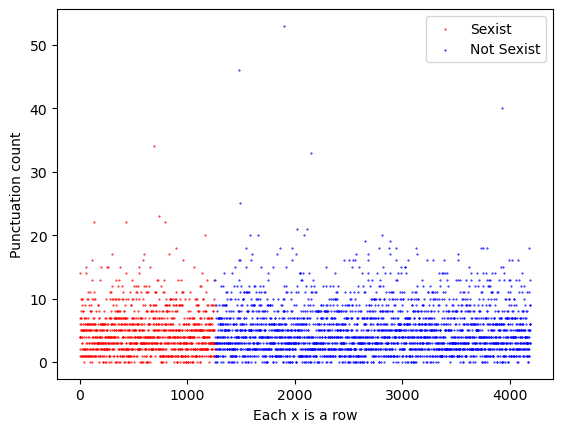

In [5]:
# check for word frequency differences
# get list of texts for sexist and not sexist
X_train_sexist = list(df_train.loc[df_train["label"] == 1]["text"])
X_train_not_sexist = list(df_train.loc[df_train["label"] == 0]["text"])
print(len(X_train_sexist))
print(len(X_train_not_sexist))
# find all words for both

sexist = ""
for s in X_train_sexist:
    sexist += ' ' + s
not_sexist = ""
for s in X_train_not_sexist:
    not_sexist += ' ' + s
sexist_counter = collections.Counter(nltk.word_tokenize(process_data(sexist)))
not_sexist_counter = collections.Counter(nltk.word_tokenize(process_data(not_sexist)))
# percentage freq of all words
sexist_dict = {k:v/sum(sexist_counter.values()) for k,v in sexist_counter.items()}
not_sexist_dict = {k:v/sum(not_sexist_counter.values()) for k,v in not_sexist_counter.items()}

diff_dict = {}
for k,v in sexist_dict.items():
    diff_dict[k] = abs(v-not_sexist_dict.get(k,0))
# 100 highest diffs
diff_counter = collections.Counter(diff_dict)
# list of high impact words
high_impact_words = [w for w,_ in diff_counter.most_common(100)]
least_impact_words = [w for w,_ in diff_counter.most_common()[-3000:]]
# high_impact_words

# sexist_length_dict = {k:len(v) for k,v in sexist_counter.items()}
# not_sexist_length_dict = {k:len(v) for k,v in not_sexist_counter.items()}
n = len(X_train_sexist)
# n = len([s for s in X_train_sexist if s in string.punctuation])
m = len(X_train_not_sexist)
# m = len([s for s in X_train_not_sexist if s in string.punctuation])
plt.scatter(range(n), [len(w) for w in [[l for l in s if l in string.punctuation] for s in X_train_sexist]], color='red', s=0.2, label='Sexist')
plt.scatter(range(n,n+m), [len(w) for w in [[l for l in s if l in string.punctuation] for s in X_train_not_sexist]], color='blue', s=0.2, label='Not Sexist')
plt.xlabel("Each x is a row")
plt.ylabel("Punctuation count")
plt.legend()


plt.show()



In [6]:
# give processed data as list
# returns dictionary of word frequency for each label
def getWordFreq(sentence, relevant_words):
    curr_words = set(relevant_words)
    res = {t:0 for t in curr_words}
    res.update(collections.Counter(nltk.word_tokenize(s)))
    return {k:v for k,v in res.items() if k in curr_words}
# returns list of (word,tag) for each label
def getPosTags(data):
    return [nltk.pos_tag(nltk.word_tokenize(s)) for s in data]
# returns dictionary of tag frequency for each label
def getPosTagFreq(sentence, relevant_pos_tags):
    curr_tags = set(relevant_pos_tags)
    tokenized = [t for w,t in nltk.pos_tag(nltk.word_tokenize(sentence))]
    counter = collections.Counter(tokenized)
    rel_pos_tag_dict = {k:0 for k in curr_tags}
    res = {k:v for k,v in counter.items() if k in curr_tags}
    rel_pos_tag_dict.update(res)
    return rel_pos_tag_dict

def getPosTagFreqPercent(sentence,relevant_pos_tags):
    curr_tags = set(relevant_pos_tags)
    tokenized = [t for w,t in nltk.pos_tag(nltk.word_tokenize(sentence))]
    # print(tokenized)
    counter = collections.Counter(tokenized)
    totalNum = sum(counter.values())
    rel_pos_tag_dict = {k:0 for k in curr_tags}
    res = {k:v/totalNum for k,v in counter.items() if k in curr_tags}
    rel_pos_tag_dict.update(res)
    return rel_pos_tag_dict
    # res = {k:len(v) for k,v in ne_dict.items() if k in rev_ne_tags}
    
    
    
    
# give raw original data as list
# returns dictionary of NE mapped to words for each label
def getNeChunksDict(s, relevant_ne_tags):
    rev_ne_tags = set(relevant_ne_tags)
    original_tree = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(s)), binary=False)
    # print(original_tree)
    if not original_tree:
        return {}
    ne_trees = [t for t in original_tree.subtrees() if t.label() != 'S']
    ne_dict = collections.defaultdict(set)
    for tr in ne_trees:
        ne_dict[tr.label()].update(tr.leaves())
    rel_ne_tag_dict = {k:0 for k in rev_ne_tags}
    res = {k:len(v) for k,v in ne_dict.items() if k in rev_ne_tags}
    rel_ne_tag_dict.update(res)
    return rel_ne_tag_dict

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import *
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
from scipy.special import softmax
# returns sentiment val as dataframe
def getSentimentVals(data, file_name):
    return pd.read_csv(file_name)[["roberta_neg","roberta_neu","roberta_pos"]]
    # sid = SentimentIntensityAnalyzer()
    task='sentiment'
    MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
    tokenizer = AutoTokenizer.from_pretrained(MODEL)
    model = AutoModelForSequenceClassification.from_pretrained(MODEL)
    # model.save_pretrained(MODEL)
    # tokenizer.save_pretrained(MODEL)
    
    res = collections.defaultdict(list)
    i = 0
    for s in data:
        encoded_input = tokenizer(s, return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        res["roberta_neg"].append(scores[0])
        res["roberta_neu"].append(scores[1])
        res["roberta_pos"].append(scores[2])
        if i % 500 == 0: print(i)
        i+=1
    scaler = MinMaxScaler()
    for k,v in res.items():
        res[k] = list(scaler.fit_transform(pd.DataFrame(v)).flatten())
    # res = scaler.fit_transform(pd.DataFrame(res))
    # res.pop("compound")
    sent_df = pd.DataFrame(dict(res))
    sent_df.to_csv(file_name)
    return sent_df



from gensim.models import Word2Vec
from gensim.models import Phrases
from gensim.models import KeyedVectors
# return dataframe of vectors for each word
def processDataIntoWord2VecFeature(train_data, test_data):
    # train_df_dis = pd.read_csv('train_sentence_vector_dis')[['sexist_dis_avg','not_sexist_dis_avg']]
    # test_df_dis = pd.read_csv('test_sentence_vector_dis')[['sexist_dis_avg','not_sexist_dis_avg']]

    train_df_dis = pd.read_csv('train_sentence_vector_dis')[['not_sexist_dis_avg']]
    test_df_dis = pd.read_csv('test_sentence_vector_dis')[['not_sexist_dis_avg']]
    return (train_df_dis,test_df_dis)
    # create a metric for testsexist and nonsexist
    X_train_sexist = list(df_train.loc[df_train["label"] == 1]["text"])
    X_train_not_sexist = list(df_train.loc[df_train["label"] == 0]["text"])
    # display(X_train_sexist)
    
    # bigram_transformer = Phrases([nltk.word_tokenized(s) for s in data])
    # modelSexist = Word2Vec([nltk.word_tokenize(s.lower()) for s in X_train_sexist], 
    #                  vector_size=50, window=5, min_count=1).wv
    # modelSexist.save('modelSexistKeyedVec.kvmodel')
    # modelNotSexist = Word2Vec([nltk.word_tokenize(s.lower()) for s in X_train_not_sexist], 
    #                  vector_size=50, window=5, min_count=1).wv
    # modelNotSexist.save('modelNotSexistKeyedVec.kvmodel')
    model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

    # modelSexist = KeyedVectors.load('modelSexistKeyedVec.kvmodel')
    # modelNotSexist = KeyedVectors.load('modelNotSexistKeyedVec.kvmodel')
    
    res_train = []
    i = 0
    for s in train_data:
        currDict = {}
        sexist_vals = []
        for compare_s in X_train_sexist:
            sexist_vals.append(model.wmdistance(s, compare_s))
                               
        currDict['sexist_dis_avg'] = np.array(sexist_vals).mean()
            
        not_sexist_vals = []
        for compare_s in X_train_not_sexist:
            not_sexist_vals.append(model.wmdistance(s, compare_s))
        meanVal = np.array(not_sexist_vals).mean()
        currDict['not_sexist_dis_avg'] = meanVal
        res_train.append(currDict)
        if i % 100 == 0:
            print(i)
        i+=1
        
    res_test = []
    i = 0
    for s in test_data:
        currDict = {}
        sexist_vals = []
        for compare_s in X_train_sexist:
            sexist_vals.append(model.wmdistance(s, compare_s))
            
        currDict['sexist_dis_avg'] = np.array(sexist_vals).mean()
        
        not_sexist_vals = []
        for compare_s in X_train_not_sexist:
            not_sexist_vals.append(model.wmdistance(s, compare_s))
        meanVal = np.array(not_sexist_vals).mean()
        currDict['not_sexist_dis_avg'] = meanVal
        res_test.append(currDict)
        if i % 100 == 0:
            print(i)
        i+=1
    train_df_dis = pd.DataFrame(res_train)
    test_df_dis = pd.DataFrame(res_test)
    train_df_dis.to_csv('train_sentence_vector_dis')
    test_df_dis.to_csv('test_sentence_vector_dis')
    return (train_df_dis, test_df_dis)


def makeFeatureVec(words, model, num_features):
    # Function to average all of the word vectors in a given paragraph
    
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((num_features,),dtype="float32")
    
    nwords = 0.
     
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, for speed 
    index_to_key_set = set(model.index_to_key)
    #
    # Loop over each word in the review and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for word in words:
        if word in index_to_key_set: 
            nwords = nwords + 1.
            #here we are adding the feature vectors of all the words that were in the review
            featureVec = np.add(featureVec,model[word])
    # Divide the result by the number of words to get the average
    # featureVec = np.divide(featureVec,nwords)
    return featureVec


def getAvgFeatureVecs(sentences, model, num_features):
    # Given a set of reviews (each one a list of words), calculate 
    # the average feature vector for each one and return a 2D numpy array 
    # 
    # Initialize a counter
    counter = 0
    # 
    # Preallocate a 2D numpy array, for speed
    sentenceFeatureVecs = np.zeros((len(sentences),num_features),dtype="float32")
    # 
    # Loop through the reviews
    for s in sentences:
        # Print a status message every 1000th review
        if counter%100 == 0:
            print("Comment %d of %d" % (counter, len(sentences)))
        # Call the function (defined above) that makes average feature vectors
        sentenceFeatureVecs[counter] = makeFeatureVec(s, model,num_features)
        # Increment the counter
        counter = counter + 1
    return sentenceFeatureVecs



def data2Vec(train_data, test_data):
    train_sents = [nltk.word_tokenize(s) for s in train_data]
    test_sents = [nltk.word_tokenize(s) for s in test_data]
    # print(train_sents)
    
    num_features = 300    # Word vector dimensionality                      
    min_word_count = 10   # Minimum word count                        
    num_workers = 4       # Number of threads to run in parallel
    context = 10          # Context window size                                                                                    
    downsampling = 1e-3   # Downsample setting for frequent words
    
    # Initialize and train the model (this will take some time)
    # from gensim.models import word2vec
    print("Training model...")
    # model = Word2Vec(train_sents, vector_size=300, window=10, min_count=10, sample = downsampling)
    model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)


    trainDataVecs = getAvgFeatureVecs(train_sents, model, num_features)
    testDataVecs = getAvgFeatureVecs(test_sents, model, num_features)

    return (pd.DataFrame(trainDataVecs), pd.DataFrame(testDataVecs))


def countSexistWords(data, sexist_words):
    res = []
    for s in data:
        sexist_count = 0
        for word in nltk.word_tokenize(s):
            if word in sexist_words:
                sexist_count+=1
        if len(nltk.word_tokenize(s)) != 0:
            res.append({"sexist_word_count":sexist_count/len(nltk.word_tokenize(s))})
        else:
            res.append({"sexist_word_count":0.})

    return pd.DataFrame(res)
    


                

In [7]:
# create features
# relevant words
rev_words = ""
rev_words = ""
for s in processed_X_train:
    rev_words += ' ' + s
rev_words = nltk.word_tokenize(rev_words)
pos_tags = nltk.pos_tag(rev_words)
freqDist = nltk.FreqDist(rev_words)
rev_words = [t for t,_ in freqDist.most_common(10)]
rev_words = [w for w,_ in diff_counter.most_common(20)]
# print(rev_words)

# relevant pos tags
pos_tags = [tag for _,tag in pos_tags]
# all ne chunk tags
ne_tags = ['GSP', 'ORGANIZATION', 'PERSON', 'GPE', 'FACILITY', 'LOCATION']

X_train_list = []
for s, sp in zip(X_train,processed_X_train):
    currDict = {}
    # currDict.update(getWordFreq(sp,rev_words))
    # currDict.update(getPosTagFreqPercent(sp,pos_tags))
    # currDict.update(getPosTagFreq(sp,pos_tags))
    # currDict.update(getNeChunksDict(s,ne_tags))
    
    X_train_list.append(currDict)
X_test_list = []
for s, sp in zip(X_test,processed_X_test):
    currDict = {}
    # currDict.update(getWordFreq(sp,rev_words))
    # currDict.update(getPosTagFreqPercent(sp,pos_tags))
    # currDict.update(getPosTagFreq(sp,pos_tags))
    # currDict.update(getNeChunksDict(s,ne_tags))
    X_test_list.append(currDict)
# print(X_train_list)

X_train_df = pd.DataFrame(X_train_list)
X_test_df = pd.DataFrame(X_test_list)


# processed_X_train_sent = getSentimentVals(processed_X_train, 'processed_X_train_sent')
# X_train_sent = getSentimentVals(X_train, 'X_train_sent')
# processed_X_test_sent = getSentimentVals(processed_X_test, 'processed_X_test_sent')
# X_test_sent = getSentimentVals(X_test, 'X_test_sent')

# X_train_df = X_train_df.join(X_train_sent)
# X_test_df = X_test_df.join(X_test_sent)
# display(X_train_df)

# w2v_X_train_df, w2v_X_test_df = processDataIntoWord2VecFeature(X_train, X_test)

# X_train_df = X_train_df.join(w2v_X_train_df)
# X_test_df = X_test_df.join(w2v_X_test_df)
# display(X_train_df)
# display(X_test_df)


# feature vectors
# feature_vec_train,feature_vec_test = data2Vec(processed_X_train, processed_X_test)

# X_train_df = X_train_df.join(feature_vec_train)
# X_test_df = X_test_df.join(feature_vec_test)
X_train_df.columns = X_train_df.columns.astype(str)
X_test_df.columns = X_test_df.columns.astype(str)



In [8]:
superXTrainData = pd.read_csv('trainData.csv')
superYTrainData = pd.read_csv('yTrainData.csv')
testXData = pd.read_csv('testData.csv')

superXTrainData.columns = superXTrainData.columns.astype(str)
testXData.columns = testXData.columns.astype(str)
for r in ["FALSE","TRUE","false","true"]:
    if r in superXTrainData.columns:
        superXTrainData.drop([r], axis=1, inplace=True)
    if r in testXData.columns:
        testXData.drop([r], axis=1, inplace=True)

print("TRUE" in superXTrainData)
print("true" in superXTrainData)
print("FALSE" in superXTrainData)
print("false" in superXTrainData)

print("TRUE" in testXData)
print("true" in testXData)
print("FALSE" in testXData)
print("false" in testXData)



False
False
False
False
False
False
False
False


In [9]:
# wf_X_train_df = pd.DataFrame(X_train_list).fillna(0)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vocab = ['women', 'bitch', 'men', 'pussy', 'woman', 'url', 'whore', 'like', 'get', 'slut', 'cunt', 'female', 'whores', 'bitches', 'girls', 'would', 'hag', 'want', 'user', 'one', 'chad', 'fuck', 'people', 'need', 'even', 'females', 'never', 'man', 'girl', 'go', 'disgusting', 'always', 'know', 'male', 'fucking', 'good', 'make', 'sex', 'back', 'cock', 'ugly', 'lol', 'guys', 'cunts', 'think', 'hate', 'shit', 'way', 'better', 'tranny', 'old hag', 'feminists', 'raped', 'many', 'got', 'feminist', 'look', 'thots', 'white', 'almost', 'buy', 'rape', 'old', 'women want', 'life', 'could', 'first', 'wife', 'goes', 'great', 'day', 'thing', 'say', 'sure', 'much', 'trying', 'yeah', 'well', 'us', 'attention', 'also', 'really', 'without', 'ass', 'ca', 'right', 'society', 'time', 'happy', 'guy', 'every', 'stop', 'lying', 'still', 'see', 'full', 'fat', 'trump', 'call', 'dykes', 'bad', 'someone', 'part', 'said', 'trust', 'real', 'become', 'reason', 'play', 'nature', 'looks', 'something', 'around', 'tell', 'lives', 'little', 'men men', 'ever', 'take', 'work', 'pretty', 'makes', 'god', 'enough', 'like woman', 'looking', 'weak', 'muslim', 'must', 'kill', 'instead', 'point', 'nice', 'let', 'hope', 'stupid', 'says', 'children', 'saying', 'hoes', 'gender', 'wish', 'easy', 'young', 'actually', 'give', 'stick', 'respect', 'feminism', 'mind', 'alpha', 'find', 'everyone', 'new', 'hot', 'needs', 'end', 'probably', 'love', 'black', 'pussies', 'wrong', 'mean', 'though', 'another', 'anything', 'dumb', 'uk', 'least', 'getting', 'use', 'going', 'prostitute', 'believe', 'lot', 'made', 'put', 'ex', 'away', 'means', 'nothing', 'attractive', 'sexual', 'guess', 'mother', 'ones', 'face', 'looks like', 'dick', 'honest', 'come', 'jews', 'strong', 'might', 'behind', 'kids', 'na', 'person', 'world', 'chicks', 'free', 'money', 'lady', 'dude', 'long', 'date', 'please', 'friends', 'cheating', 'fucked', 'years', 'send', 'maga', 'treat', 'typical', 'ask', 'thought', 'maybe', 'wants', 'prostitutes', 'literally', 'usually', 'bet', 'things', 'incel', 'marriage', 'chick', 'may', 'cant', 'crazy', 'thinks', 'yet', 'friend', 'keep', 'child', 'either', 'deserve', 'dont', 'divorce', 'everything', 'pay', 'exactly', 'yes', 'watch', 'dad', 'already', 'white women', 'women get', 'post', 'sluts', 'like women', 'lies', 'talk', 'gon na', 'single', 'feel', 'mgtow', 'care', 'killed', 'understand', 'gon', 'kind', 'waiting', 'sex girl', 'matter', 'neck', 'mom', 'game', 'hoe', 'dying', 'low', 'done', 'gets', 'men women', 'imagine', 'ways', 'wo', 'beat', 'equal', 'femoids', 'cuck', 'knows', 'alone', 'women rape', 'brain', 'hit', 'age', 'asian', 'idk', 'oh', 'simps', 'likes', 'fucks', 'attack', 'race', 'hunt', 'left', 'pull', 'wife slut', 'suck', 'cause', 'two', 'worth', 'dead', 'liberal', 'best', 'since', 'honestly', 'dating', 'women make', 'idea', 'listen', 'responsibility', 'called', 'sister', 'force', 'feminazi', 'happens', 'wear', 'exist', 'wonder', 'cucks', 'etc', 'idiot', 'push', 'count', 'greatest', 'physically', 'women children', 'truth', 'story', 'logic', 'trash', 'class', 'daughter', 'slept', 'womens', 'shame', 'real women', 'year', 'talent', 'retarded', 'nigger', 'theory', 'average', 'knew', 'reject', 'learn', 'son', 'virtue', 'kid', 'miserable', 'sense', 'west', 'show', 'human', 'name', 'femoid', 'fight', 'seem', 'knowing', 'worse', 'thank', 'less', 'women hate', 'gay', 'america', 'behaviour', 'throw', 'anyone', 'funny', 'bullshit', 'try', 'women still', 'assault', 'making', 'women go', 'seems', 'cute', 'problem', 'good looking', 'bit', 'married', 'hillary', 'hair', '90', 'especially', 'big', 'pretty much', 'home', 'special', 'year old', 'look like', 'family', 'smell', 'job', 'sorry', 'giving', 'whatever', 'turns', 'porn', 'little girl', 'every woman', 'seen', 'carousel', 'common', 'otherwise', 'die', 'rights', 'damn', 'drive', 'virginity', 'sub', 'asian women', 'raise', 'holy', 'embarrassed', 'dumbass', 'fact', 'fuck woman', 'cops', 'women think', 'next', 'sounds', 'thief', 'males', 'started', 'hell', 'finally', 'hand', 'days', 'used', 'start', 'heard', 'found', 'immediately', 'spoiled', 'kick', 'thoughts', 'claim', 'tells', 'ta', 'iraq', 'accept', 'bring', 'comes', 'get away', 'words', 'police', 'shes', 'got ta', 'definitely', '10', 'order', 'live', 'fake', 'choose', 'read', 'cut', 'wanted', 'expect', 'baby', 'many women', 'realize', 'hard', 'rest', 'country', 'sucked', 'open', 'whole', 'lmao', 'balls', 'men rape', 'set', 'rape women', 'cares', 'photos', 'sexual assault', 'smart', 'american', 'lie', 'else', 'completely', 'takes', 'avoid', 'size', 'ugly women', 'simply', 'pathetic', 'ho', 'nah', 'ok', 'thanks', 'help', 'internet', 'hotter', 'among', 'bs', 'last', 'middle', 'tits', 'remember', 'crime', 'fit', 'fire', 'poor', 'father', '60', 'news', 'penis', 'leave', 'head', 'clearly', 'hate women', 'change', 'provider', 'piece', 'course', 'pick', 'haha', 'girlfriend', 'video', 'fuck women', 'user url', 'murder', 'paid', 'half', 'clothes', 'stuff', 'train', 'standards', 'career', 'fun', 'hiv', 'talking', 'choices', 'saw', 'speak', 'commie', 'demand', 'taking', 'thankfully', 'toxic', 'public', 'gab', 'question', 'senseless', 'hypergamy', 'legs', 'rich', 'user user', 'lose', 'today', 'eat', 'hook', 'lost', 'finger', 'im', 'dress', 'type', 'thats', 'relationship', 'miss', 'husband', 'mothers', 'tho', 'soon', 'death', 'dates', '100', 'history', 'sexually', 'time female', 'follow', 'games', 'prefer', 'return', 'ur', 'media', 'marry', 'way bitch', 'given', 'women women', 'strength', 'social', 'telling', 'virgin', 'dog', 'vagina', 'vote', 'hurt', 'living', 'pants', 'women would', 'likely', 'dreams', 'proof', 'told', 'actual', 'thot', 'fine', 'victim', 'notice', 'capacity', 'beta', 'college', 'women like', '30', 'cock carousel', 'except', 'islam', 'allowed', 'problems', 'feel like', 'every girl', 'power', 'reason women', 'selling', 'muslims', 'office', 'asking', 'truly', 'dinner', 'dump', 'case', 'boy', 'night', 'sue', 'attracted', 'strike', 'pigs', 'wait', 'higher', 'evil', 'meet', 'movies', 'incels', 'streets', 'height', 'approach', 'possible', 'past', 'crap', 'turn', 'women say', 'wealthy', 'place', 'jew', 'bathroom', 'calling', 'ladies', 'good job', 'agree', 'rot', 'high', 'wan', 'voted', 'fathers', 'real woman', 'destroy', 'pimp', 'first lady', 'wanting', 'asshole', 'food', 'granted', 'central', 'boss', 'house', 'joke', 'stop bitch', 'basically', 'germany', 'shoot', 'charges', 'along', 'nobody', 'deal', 'move', 'weird', 'empathy', 'party', '18', 'loser', 'multiple', 'white woman', 'abortion', 'jail', 'raping', 'scientists', 'website', 'several', 'nope', 'laid', 'quality', 'wan na', 'sucks', 'hey', 'biggest', 'single mothers', 'sports', 'tried', 'general', 'gf', 'pictures', 'according', 'cool', 'double', 'bullet', 'neanderthal', 'dirt', 'maybe women', 'ago', 'af', 'based', 'hang', 'harassment', 'sounds like', 'daughters', 'worthless', 'accident', 'intercourse', 'chance', 'pos', 'dyke', 'join', 'thinking', 'rather', 'went', 'judge', 'rub', 'top', 'hold', 'hopefully', 'generation', 'women much', 'forget', 'plan', 'dollar', 'posting', 'gives', 'reverse', 'successful', 'workplace', 'freak', 'scared', 'shut', 'current', 'took', 'fail', '20', 'named', 'horrible', 'freaks', 'social media', 'tinder', 'automatically', 'gays', 'club', 'decent', 'enemy', 'group', 'arms', 'karma', 'mouth', 'hat', 'everybody', 'traps', 'side', 'women men', 'times', 'passed', 'posts', 'organization', 'pregnant', 'asians', 'screw', 'total', 'picture', 'straight', 'rapists', 'stormy daniels', 'three', 'moms', 'rare', 'comment', 'rapes', 'later', 'nation', 'lead', 'seriously', 'jfl', 'advice', 'together', 'pic', 'arrested', 'anglin', 'ruined', 'test', 'raised', 'independent', 'harassed', 'painting', 'lesbian', 'white men', 'second', 'walk', 'speaking', 'impossible', 'walking away', 'insane', 'dies', 'however', 'entire', 'sharia', 'block', 'proper', 'nwo', 'others', 'interested', 'week', 'jewish', 'simp', 'excuse', 'ya', 'woman would', 'clear', 'check', 'wall', 'complaining', 'training', 'phase', 'richard', 'girls like', 'treating', 'complete', 'mad', 'complain', 'refused', 'sometimes', 'sleep', 'angry', 'struggles', 'almost looks', 'unable', 'blame', 'assaulted', 'faggot', 'perfectly', 'men never', 'buying', 'issue', 'mate', 'playing', 'perfect', 'trying make', 'opportunity', 'yo', 'violence', 'changed', 'experience', 'fuckin', 'beautiful', 'stacies', 'anywhere', 'sexist', 'act', 'number', 'spot', 'small', 'intentionally', 'lips', 'eye', 'data', 'building', 'queens', 'bunch', 'christians', 'downvote', 'leftist', 'wtf', 'blonde', 'apparently', 'coming', 'speakfreely', 'showing', 'support', 'unless', 'hole', 'normie', 'gal', 'state', 'looked', 'obviously', 'different', 'ditch', 'run', 'learned', 'posted', 'technology', 'red', 'letting', 'absolutely', 'forced', 'helps', 'sjw', 'equality', 'fork', 'self', 'working', 'calls', 'speech', 'heart', 'equal rights', 'fuckable', 'addict', 'picking', 'niggers', 'youtube', 'bitchy', 'term', 'school', 'awesome', 'insecure', 'feminine', 'sentence', 'get pregnant', 'real men', 'twitter', 'fucking retard', 'none', 'obvious', 'bills', 'europe', 'marrying', 'bodies', 'jobs', 'allow', 'western', 'doesnt', 'waste', 'redpill', 'claims', 'sees', 'vile', 'asked', 'crush', 'idiots', 'unfortunately', 'surprised', 'makeup', 'step', 'tall', 'suicide', 'worry', 'movie', 'wow', 'even though', 'stone', 'wears', 'puts', 'relationships', 'haze', 'kinds', 'gang', 'entitled', 'caught', 'rates', 'ur mom', 'mention', 'badly', 'drop', 'survive', 'afraid', 'rt', 'inside', 'burn', 'thots allowed', 'beyond', 'diddle', 'prison', 'appearance', 'desperate', 'steal', 'donkey', 'tweeted', 'label', 'justice', 'legit', 'punch', 'like girl', 'women keep', 'act like', 'bitch slap', 'despise', 'lay', 'kinda', 'late', 'certain', 'uglier', 'every day', 'stand', 'get women', 'thin', 'bitching', 'offer', 'let hope', 'continue', '2nd', 'yep', 'safe', 'willing', 'grab', 'save', 'dudes', 'article', 'fantasy', 'bang', 'hitlery', 'style', 'scumbag', 'even women', 'well maybe', 'kidding', 'dna', 'keeps', 'soul', 'bc', 'confident', 'piece shit', 'abuses', 'smv', 'near', 'law', 'interesting', 'quite', 'dig', 'types', 'british', 'yup', 'little sister', 'dicks', 'became', 'hands', 'model', 'gun', 'keeper', 'filled', 'racist', 'continent', 'came', 'fashion', 'boyfriend', 'heads', 'privilege', 'want make', 'would say', 'groups', 'rejected', 'touch', 'sick', 'brother', 'guns', 'argument', 'get laid', 'nfl', 'women even', 'without knowing', 'would fuck', 'saying women', 'political', 'cope', 'non', 'market', 'kike', 'zero', 'music', 'happen', 'chads', 'defending', 'anti', 'room', 'far', 'guaranteed', 'works', 'reptilian', 'op', 'across', 'control', '12', 'accused', 'x200b', 'abuse', 'traits', 'difference', 'due', 'field', 'bill', 'behavior', 'bank', 'good enough', 'enjoy', 'whenever', 'approaching', 'happening', 'violent', 'hooker', 'ca wait', 'women feel', 'body', 'future', 'coffin', 'easier', 'glad', 'believes', 'fans', 'teach', 'conservative', 'detail', 'okay', 'whether', 'text', 'cry', 'odds', 'woman needs', 'christ', 'shoved', 'mouths', 'gone', 'advantage', 'women one', 'military', 'conversation', 'ungrateful', 'kneel', 'breathing', 'doubt', 'earn', 'example', 'finds', 'guilty', 'think women', 'daily', 'mentally', 'million', 'war', 'favour', 'shitskin', 'normal', 'fault', 'jesus', 'replace', 'effort', 'cat', 'dangerous', 'divorced', 'see much', 'generally', 'bro', 'within', 'huge', 'pass', 'pretending', 'committed', 'costs', 'instantly', 'sad', 'level', 'men like', 'wtf wrong', 'everywhere', 'destroyed', 'hitler', 'murdered', 'ruin', 'settle', 'online', 'every single', 'meeting', 'one day', 'german', 'moron', 'ltr', 'respectful', 'global', 'earth', 'attached', 'personality', 'minutes', 'pop', 'victims', 'get ass', 'door', 'handle', 'like literally', 'animals', 'blue', 'threaten', 'swallowed', 'born', 'meant', 'proud', 'hates', 'cheap', 'boobs', 'front', 'referring', 'said would', 'stage', 'ran', 'pissed', 'mutilated', 'normies', 'shit test', 'men go', 'simple', 'wearing', 'explanation', 'blacks', 'pray', 'stormy', 'health', 'knees', 'factory', 'pics', 'delusional', 'nazi', 'value', 'spaces', 'fix', 'seems like', 'wet', 'payments', 'long term', 'islamic', 'iq', 'black woman', 'shit needs', 'feels', 'ghost', 'basis', 'bigger', 'hmm', 'watching', 'belongs', 'bbc', 'man job', 'real life', 'grandmas', 'culture', 'service', 'citizens', 'hate men', 'ate', 'putting', 'like whore', 'killing', 'shot', 'would love', 'white girl', 'crack', 'boys', 'banned', 'revenge', 'amount', 'worst', 'shamed', 'nbc', 'street', 'get back', 'feeling', 'white man', 'hollywood', 'blind', 'whites', 'personally', 'shower', 'impress', 'monkey', 'notorious', 'women could', 'accepting', 'daniels', 'create', 'saudi', 'per', 'protected', 'hating', 'lesson', 'starbucks', 'sound', 'easily', 'view', 'lower', 'luck', 'able', 'form', 'close', 'despite', 'gaf', 'comfortable', 'black women', 'find woman', 'kiss', 'give shit', 'unattractive', 'car', 'women size', 'tax', 'degrade', 'ashley', 'early', 'involved', 'assholes', 'like lady', 'merkel', 'white people', 'james', 'rapist', 'perhaps', 'cant tell', 'put bullet', 'income', 'men get', 'known', 'ig', 'slow', 'hear', 'girls sex', 'russian', 'want fuck', 'recommend', 'afterwards', 'happened', 'genes', 'wives', 'fear', 'pedo', 'break', 'soy', 'drinking', 'brag', 'account', 'somebody', 'women speak', 'planet', 'weight', 'line', 'laugh', 'privileged', 'depends', 'positive', 'short', 'plus', 'slaves', 'lifetime', 'months', 'like men', 'needed', 'met', 'fly', 'would like', 'scum', 'many men', 'filthy', 'like easiest', 'single moms', 'marvel', 'cum', 'profile', 'identify', 'died', 'ignore', 'feelings', 'soy boy', 'terms', 'good women', 'evidence', 'plastic', 'assuming', 'arab', 'super', 'edit', 'ungrateful bitch', 'final', 'shitty', 'sit', 'would go', 'bed', 'congress', 'arent', 'gotten', 'would gladly', 'mother fucker', 'rejection', 'philosophy', 'would rather', 'smoke', 'oppressed', 'writing', 'considered', 'patriarchy', 'female complains', 'drunk', 'dated', 'ended', 'tomorrow', 'positions', 'sign', 'gave', 'antifa', 'greedy', 'ready', 'get hit', 'killers', 'following', 'lol women', 'leaking', 'witch', 'sort', 'un', 'affection', 'signaling', 'explain', 'younger', 'get pussy', 'flirt', 'space', 'migrants', 'mess', 'issues', 'decisions', 'towards', 'reward', 'women know', 'alot', 'twatter', 'target', 'assume', 'locked', 'cases', 'helping women', 'pound', 'photo', 'limit', 'could beat', 'dems', 'thread', 'bar', 'prior', 'rid', 'bank account', 'dogs', 'odd', 'isnt', 'bus', 'system', 'let see', 'religion', 'good men', 'checking', 'prove', 'abolish', 'better things', 'vs', 'cobra', 'bible', 'cucked', 'outside', 'values', 'didnt', 'dancing', 'innocent', 'get attention', 'youth', 'flag', 'agreed', 'inferior', 'nose', 'naked', 'reddit', 'approached', 'thousands', 'horror', 'shows', 'mine', 'cup', 'robots', 'consider', 'trained', 'bullet head', 'sure women', 'scream', 'greatest generation', 'awards', 'teacher', 'kings', 'gabfam', 'responsible', 'careful', 'manipulative', 'feminazis', 'wage', 'love women', 'get raped', 'couple', 'grave', 'pc', 'options', 'battery', 'continuing', 'israel', 'cowards', 'traitor', 'fucker', 'hit women', 'clinton', 'every man', 'even get', 'popular', 'favor', 'personal', 'period', 'response', 'fellow', 'repeatedly', 'show big', 'weeks', 'indian', 'status', 'like say', 'hahaha', 'cigar', 'study', 'never seen', 'message', 'lawyer', 'believed', 'user think', 'nothing wrong', 'creepy', 'hilarious', 'floor', 'position', 'need get', 'exists', 'url url', 'mistake', 'quick', 'sell', 'abused', 'blown', 'solar', 'trigger', 'action', 'uses', 'droning', 'retard', 'feet', 'answer', 'becoming', 'freedom', 'bruce', 'button', 'talking women', 'politics', 'awkward', 'understands', 'voting', 'closed', '50', 'strong independent', 'stare', 'fatass', 'starts', 'middle school', 'knocked', 'legal', 'little bitch', 'totally', 'effect', 'reading', 'upon', 'gladly', 'reality', 'starting', 'pill', 'prefers', 'confused', 'twice', 'bars', 'shit like', 'nasty', 'harm', 'confusion', 'smile', 'lunch', 'stacy', 'gained', 'would surprised', 'benefit', 'laughing', 'publicly', 'telling truth', 'xd', 'isis', 'collective', 'loving', 'ppl', 'hr', 'slap', 'democrats', 'wash', 'chelsea', 'doctor', 'road', 'sites', 'longer', 'rip', 'take pound', 'betas', 'hate life', 'dear', 'politically', 'robot', 'random', 'puppy', 'pay bills', 'women expect', 'draft', 'sexuality', 'tyrone', 'meaning', 'illegal', 'community', 'share', 'care got', 'reparations', 'mommy', 'bernie', 'changed mind', 'forward', 'wanted see', 'mostly', 'actions', 'meals', 'never know', 'life experience', 'injured', 'walking', 'church', 'majority', 'rule', 'muslim women', 'packing', 'created', 'girl wants', 'decency', 'blackpilled', 'stopped', 'obsessed', 'offended', 'would first', 'facebook', 'would still', 'shop', 'socialist', 'older', 'population', 'narrative', 'character', 'bluepilled', 'young girls', 'fake news', 'races', 'science', 'busy', 'jerk', 'never heard', 'italian', 'females good', 'color nothing', 'toxic masculinity', 'perfectly fine', 'good times', 'taken', 'homosexuals', 'women call', 'individuals', 'minorities', 'city', 'pain', 'statistic', 'old girls', 'sharia law', 'favors', 'students', 'bloody', 'black men', 'president', 'tough', 'guys still', '80', 'giga', 'devil', 'serial', 'complains', 'felt', 'turkey', 'acts like', 'taste', 'belong', 'version', 'fat women', 'like make', 'women look', 'hypocrisy', 'giant', 'years ago', 'addiction', 'attacking', 'deserved', 'skin', 'blue pill', 'nut', 'swedish', 'spotlight', 'beauty', 'link', 'echo', 'pedestal', 'daily basis', 'important', 'bad evil', 'sold', 'glass', 'nail', 'still get', 'key', 'preferred', 'shall', 'occasionally', 'stay', 'neither', 'england', 'minds', 'assad', 'mama', 'women making', 'filing', 'wonderful', 'provided', 'btw', 'thirsty', 'nails', 'bleeding', 'sarah', 'dr', 'younger girls', 'would believe', 'via', 'rate', 'well said', 'roll', 'controlling', 'face see', 'refuse', 'fds', 'lied', 'damaged', 'day day', 'blackpill', 'satan', 'crying', 'losers', 'still want', 'incredibly', 'either way', 'walk away', 'discovered', 'big deal', 'programming', 'highest', 'conservatives', 'court', 'hello', 'welcome', 'subs', 'satanists', 'way around', 'european', 'orbiter', 'see first', 'lock', 'exclusive', 'turned', 'logical', 'record', 'britain', 'practicing', 'liberals', 'strangers', 'would nice', 'moved', 'cult', 'whose', 'hahahahaha', 'run women', 'epitome', 'color', 'aids', 'arrest', 'really want', 'teenagers', 'excellent', 'best worlds', 'commit', 'points', 'chinese', 'aware', 'woman like', 'missed', 'babies', 'amazing', 'men fuck', 'women lol', 'sisters', 'round', 'girls laugh', 'peace', 'trouble', 'bashing', 'execute', 'cuz', 'go girl', 'private', 'grandma', 'need take', 'report', 'decide', 'hate hate', 'good go', 'lots', 'leads', 'fried', 'first time', 'criminal', 'bro hit', 'reply', 'therefore', 'want woman', 'woman ever', 'matters', 'appreciate', 'women today', 'annoying', 'seem like', 'aww', 'lose virginity', 'decided', 'messages', 'call female', 'security', 'fully', 'helping', 'girls dont', 'adult', 'whining', 'accordingly', 'stretched', 'pause', 'emotional', 'make life', 'long time', 'spits', 'american people', 'alt right', 'fuck want', 'believe women', 'abort', 'ta work', 'sit next', 'proven', 'em', 'woman family', 'upset', 'virgins', 'holding', 'crosses line', 'porn star', 'standards women', 'like retarded', 'white girls', 'falling', 'couples', 'lower standards', 'remain', 'satanic', 'already married', 'nuke', 'grooming', 'imo', 'finance', 'attraction', 'companies', 'ratings', 'constant', 'woman work', 'queen', '14', 'shiny', 'particular', 'liar', 'would happen', 'say women', 'white guys', 'admit', 'around long', 'loose', 'partner', 'numbers', 'weed', 'diverse', 'pedophile', 'ask questions', 'rude', 'spinster', 'deleted', 'star', 'ticket', 'life one', 'pushing', 'faces', 'lads', 'fall', 'caring', 'invested', 'tweet', 'seeing', 'drug', 'final nail', 'digging', 'quiet', 'similar', 'arse', 'autistic', 'lack', 'onto', 'genetic', 'hijab', 'find attractive', 'company', 'tips', 'things like', 'women used', 'oooooo', 'subreddit', 'treated like', 'class also', 'fortune', 'independent man', 'like pretty', 'book', 'doll', 'mans', 'best way', 'fucking women', 'girls raped', 'saving', 'women matter', 'considering', 'opinion', 'parents', 'places', 'short women', 'way woman', 'cuckoldry', 'transport', 'wo tell', 'source', 'draintheswamp', 'money give', 'cheat', 'insecurity', 'throwing', 'dressing', 'get day', 'stubborn', 'wish could', 'wants marry', 'want kids', 'guys like', 'till', 'fell', 'language', 'right people', 'worlds', 'annual', 'material', 'crimes', 'laws', 'first female', 'treats', 'situation', 'decades', 'woman find', 'risk', 'fantasies', 'elected', 'circle', 'got one', 'ford', 'discuss', 'dc', 'comparison', 'mankind', 'women dont', 'gold', 'buddy', 'rape young', 'elaborate', 'questions', 'possibly', 'covering', 'heroes', 'summer', 'basement', 'physical', 'get girls', 'think girls', 'vaginas', 'maga hat', 'woman totally', 'genetically', 'subtle', 'helped', '25', 'talked', 'someone said', 'negro', 'lena', 'one else', 'users', 'advances', 'domestic', 'redhead', 'proves', 'treated', 'daddy', 'masculinity', 'camp', 'major', 'mean would', 'says rape', 'platform', 'videos', 'smile face', 'human life', 'dont want', 'broke', 'somewhere', 'girls get', 'churches', 'visible', 'dictatorship', 'intellectual', 'trap', 'ton', 'slavic', 'mistakes', 'nowadays', 'protest', 'border', 'shocked', 'easiest', 'selfish', 'minute', 'wars', 'inherit', 'clothing', 'like crack', 'birds', 'kiss girls', 'accusations', 'twat', 'nsfw', 'women trash', 'madonna', 'cash', 'orbiters', 'way would', 'like know', 'bigoted', 'note', 'hiding', 'virtue signaling', 'anywhere near', 'driving', 'nature women', 'sleeping', 'drug addict', 'code', 'extremely', 'worship', 'invading', 'experiment', 'focus', 'deport', 'threat', 'whats', 'cope women', 'white trash', 'treason', 'grade', 'bought', 'site', 'started talking', 'throughout', 'student', 'exception', 'accomplished', 'dropped', 'members', 'ball', 'swamp', 'men still', 'pork', 'credit', 'breaking', 'refer', 'puas', 'democracy', 'stacey', 'red pill', 'african', 'lamp', 'warned', 'kept', 'walmart', 'covered', 'lucky', 'old son', '80 men', 'want see', 'attitude', 'exercise', 'cancel', 'underwear', 'even one', 'magic', 'warming', 'shape', 'encourage', 'tactics', 'sun', '2016', 'rt user', 'fraud', 'greater', 'candy', 'like shit', 'claiming', 'actually believe', 'female population', 'studies', 'vast', 'sex robots', 'kill every', 'attractive women', 'comics', 'teenage girls', 'polyamory', 'would agree', 'useful', 'backwards', 'worked', 'tiny', 'fucking stupid', 'reasonable', 'officers', 'lol ugly', 'hatred', 'raped murdered', 'nothing stop', 'bad thing', 'make great', 'pension', 'swing', 'dumb cunt', 'irrational', 'women privileged', 'slavery', 'looked like', 'like female', 'get free', 'oppression', 'tired', 'teenage', 'honor', 'liars', 'birth control', 'hookup', 'murderers', 'dating pool', 'fakenews', 'web', 'old woman', 'trade', 'owner', 'large', 'talk girls', 'statement', 'oh see', 'plenty', 'chad lite', 'like already', 'birth', 'comes women', 'girlfriends', 'auspol', 'absolute', 'true lol', 'listed', 'like little', 'women problems', 'male friends', 'take back', 'old girl', 'hairy', 'runs', 'incels would', 'whining women', 'get along', 'good time', 'first place', 'zone', '2018', 'miles', 'canada', 'experienced', 'extra', 'knocking', 'humor', 'self respect', 'hours', 'town', 'much looks', 'national', 'saudis', 'judgement', 'oh fucking', 'kings queens', 'objects', 'soft', 'decade', 'get shit', 'minority', 'women tinder', 'incel fuck', 'niggers would', 'adopt', 'owned', 'notion', 'tats', 'deep', 'pity', 'would get', 'ice', 'way get', 'tattoos', 'dirty', 'like hate', 'heck', 'friends around', 'could fuck', 'tip', 'get girl', 'crippling', 'sex life', 'disabled', 'progressives', 'false rape', 'solution', 'bad things', 'potential', 'andrew', 'jackass', 'crosses', 'looking like', 'ignoring', 'ass back', 'hate people', 'dealt', 'women really', 'role', 'hitting', 'wild', 'goal', 'know likes', 'want get', 'anything women', 'drink', 'fyi', 'skinny', 'many girls', 'followers', 'cheater', 'genital', 'forgot', 'plans', 'brave', 'india', 'repulsive', 'access', 'grip', 'msm', '20 years', 'pizzagate', 'gym', 'youre', 'lovely', 'entirely', 'except one', 'ladder', 'fast', 'ability', 'pool', 'propaganda', 'skills', 'italy', 'anybody', 'sad thing', 'similar goals', 'shy', 'surely', 'getting married', 'ftfy', 'phone', 'address', 'dont get', 'nigga', 'contact', 'ironically', 'store', 'ideas', 'plant', 'trying get', 'written', 'meat', 'gentleman', 'new pussy', 'high school', 'someone else', 'tragedy', 'away like', 'stock', 'men make', 'obama', 'government', 'going way', 'throat', 'professional', 'elite', 'fuck shit', 'simplify', 'beard', 'aged', 'troop', 'symbol', 'fat woman', 'hair color', 'women find', 'noticed', 'write', 'day one', 'banging', 'next time', 'women easy', 'average guy', 'metoo', 'partners', 'man men', 'via user', 'wo get', '11', 'press charges', 'partying', 'mangina', 'running', 'mah', 'art', 'fucked anything', 'tool', 'clubs', 'tend', 'ride', 'females want', 'fat girls', 'directly', 'without even', 'sugar', 'sentencing', 'pretty damn', 'typically', 'shameful', 'sissy', 'damn good', 'refusing', 'kick ass', 'existed', 'investment', 'oppressive', 'tries', 'man woman', 'racists', 'watched', '1914', 'revolution', 'girl would', 'user make', 'attention whore', 'deception', 'election', 'ahead', 'spent', 'cardinal', 'unlike', 'lamp post', 'things listed', 'free speech', 'women weak', 'comrades', 'restaurant', 'opposed', 'awful', 'abusers', 'lived', 'cnn', 'main', 'associated', 'indirectly', 'attempt', 'fbi', 'good thing', 'global warming', 'beliefs', 'think got', 'deep state', 'jump', 'commits', 'like fucking', 'maga trump', 'fucking ass', 'like us', 'including', 'vast majority', 'blood', 'fool', 'pays', 'pal', 'men happy', 'hygiene', 'came across', 'goats', 'lol nice', 'stones', 'cat lady', 'real equality', 'women problem', 'views', 'karma bitch', 'guys seen', 'usa', 'fish', 'sex also', 'ive', 'woman fucking', 'stated', 'ivanka', 'released', 'gossip', 'anything like', 'cuffed', 'tossed', 'pro', 'aclu', 'like think', 'stuff like', 'filed', 'like girls', 'think men', 'texting', 'boring', 'seemed', 'asian men', 'purposely', 'absorb', 'everyone else', 'syndrome', 'sorts', 'north', 'purge', 'walked', 'low iq', 'texas', 'golf', 'fired', 'rate much', 'feminists male', 'length', 'melt', 'christine ford', 'mayor', 'hi', '2a', 'blackmail', 'degenerate', 'flocking', 'theyll', 'nearly', 'getting better', 'rarely', 'touching', 'christine', 'creep', 'board', 'lust', 'next week', 'women least', 'conspiracy', 'less likely', 'giving women', 'mercy', 'get house', 'much anyone', 'mean fuck', 'presidenttrump', 'feminists like', 'subvert', 'hate sub', 'enforce', 'roman', 'list', 'demands', 'ruling', 'women live', 'research', 'hit girls', 'url ausfam', 'url via', 'women day', 'gynocentric', 'trump maga', 'like rest', 'sheep', 'kavanaugh', 'wrong woman', 'keep talking', 'indeed', 'years later', 'catch', 'free money', 'ugly guy', 'google', 'want keep', 'sick women', '2000', 'mass', 'gorgeous', 'want relationship', 'disgust', 'yesterday', 'uncle', 'cave', 'insulting', 'reproductive', 'shit go', 'eve', 'season', 'nonsense', 'doubts', 'mock', 'terrified', 'wake', 'women typically', 'pump', 'location', 'seat', 'somehow', 'star wars', 'one said', 'wife kids', 'michelle', 'much like', 'prosecuted', 'mentality', 'directed', 'joe', 'come forward', 'correct', 'eventually', 'influence', 'alt', 'say men', 'gods', 'bully', 'literally every', 'man get', 'really good', 'accusing', 'common sense', 'things getting', 'muslim men', 'murderer', 'better one', 'hired', 'woman wants', 'grabbed', 'bio', 'models', 'biological', 'would turn', 'female friends', 'sweden', 'love see', 'minimum', 'benefits', 'get white', 'dehydrated', 'rock', 'cancer', 'nazis', 'arranged marriage', 'needs make', 'escalation', 'need work', 'convinced', 'women scared', 'recently', 'freaking', 'tinder even', 'tucked', 'class citizens', 'bigot', 'even try', 'convincing', 'one biggest', 'fucking lol', 'women said', 'pedophilia', 'woman talk', 'withdraw', 'becomes', 'jeremy', 'beat women', 'rational', 'destroys', 'pleasure', 'shove', 'old guy', 'soldiers', 'pieces', 'anything else', 'carry', 'percentage', 'poc', 'women take', 'two daughters', 'oh god', 'irl', 'empty', 'tell fuck', 'deranged', 'people want', 'fairly', 'normal women', 'insults', 'wonder would', 'blew', 'single mother', 'whatever want', 'progressive', 'women shallow', 'get know', 'bottom', 'indian women', 'give fuck', 'fucking black', 'play games', 'power women', 'vote democrats', 'anxiety', 'trolling', 'coming back', 'extreme', 'instinct', 'escort', 'girls look', 'way feminist', 'make feel', 'back may', 'serena', 'anyone disagrees', 'soros', 'lee', 'woman man', 'troll', 'good point', 'bastards', 'hobbies', 'like hot', 'women got', 'women cause', 'fancy', 'stfu', 'examples', 'third', 'even fat', 'would start', 'though lol', 'like said', 'like get', 'moslems', 'terrorists', 'picked', 'leaves', 'communism', 'jfk', 'eyebrows', 'ugh', 'right women', 'al', 'raped got', 'saturday', 'breaks', 'role model', 'get around', 'expecting', 'meh', '15', 'bucks', '16', 'leadership', 'twerk', 'cousin', 'showed', 'girls pick', 'used make', 'man got', '40s', 'nypd', 'eating', 'dance', 'woman look', 'ausfam auspol', 'like dog', 'century', 'proved', 'mollie', 'seek', 'vicious', 'auspol australia', 'blowing', 'goyim', 'eastern', 'know guys', 'condom', 'threatening', 'women everywhere', 'played', 'take advantage', 'black guy', 'min', 'wikileaks', 'communist', 'single mom', 'keep looking', 'biased', 'rising', 'know would', 'ban', 'depressed', 'point men', 'emotionally', 'articles', 'facial', 'leaving', 'pills', 'sanders', 'sex woman', 'frequently', 'masculine', 'dominant', 'fixed', 'chasing', 'triple', 'really believe', 'everyone says', 'bride', 'sound like', 'woman slut', 'ancient', 'published', 'one absolute', 'romans', 'labeled', 'paul', 'shoot shot', 'every person', 'hearing', 'cared', 'stripper', 'rights women', 'women well', 'call bullshit', 'like really', 'police report', 'dance floor', 'er', 'aggressive', 'hats', 'follows', 'crazed', 'friendship', 'women run', 'man even', 'observation', 'cold', 'brutally', 'total bitch', 'many options', 'whenever want', 'men without', 'much free', 'getting laid', 'match', 'options want', 'involving', 'dont like', 'perspective', 'black lives', 'jesus christ', 'cutting', 'auspol ausfam', 'would able', 'women understand', 'sensitive', 'chief', 'tiger', 'getting much', 'series', 'murdering', 'frame', 'pua', 'female sex', 'sex drive', 'screeching', 'dual', 'jungle', 'attention women', 'likely get', 'adam', 'hillary clinton', 'need permission', 'relevant', 'countless', 'lawsuit', 'teachers', 'pursue', 'people think', 'girl url', 'get upset', 'men take', 'talking girl', 'least amount', 'problem women', 'search', 'acts', 'spoken', 'ploy', 'ashamed', 'australia', 'convert', 'would make', 'testosterone', 'instead making', 'bin', 'gang rape', 'judgment', 'showers', 'jack', 'immigration', 'americans', 'stop talking', 'monster', 'doxxing', 'knight', 'penises', 'sexually harassed', 'lot women', 'say could', 'leave us', 'general would', 'method', 'setting', 'moslem', 'epic', 'founder', 'people would', 'silence', 'user hey', 'know women', 'make exception', 'one way', 'shopping', 'energy', 'need stop', 'long hair', 'oil', 'pedophiles', 'big black', 'must great', 'debt', 'grocery', 'surgery', 'feel good', 'eggs', 'appearances', 'multiple girls', 'thru', 'smaller', 'kaine', 'leading', 'revolt', 'complicit', 'guys start', 'joy', 'robinson', 'pay attention', 'really fucking', 'get worse', 'parent', 'know guy', 'women seen', 'sniff', 'sauce', 'falls', 'healthy', 'reaction', 'man needs', 'bother', 'stands', 'alpha women', 'acting', 'men feminism', 'pres', 'visited', 'ears', 'horrible thing', 'accepted', 'vid', 'censored', 'sleeps', 'plane', 'people fuck', 'proving', 'teen', 'goys', 'bias', 'wait see', 'jihad', 'sex even', 'charity', 'meth', 'start fight', 'lesbians', 'like many', 'audience', 'sober', 'direction', 'work even', 'adults', 'sink', 'atleast', 'among women', 'wealth', 'goals', 'keep female', 'master', 'away crimes', 'cabal', 'ive never', 'taller', 'god wo', 'subjugate', 'jeremy meeks', 'sucking', 'times better', 'go get', 'french', 'regards', 'park', 'cover', 'ha', 'grocery store', 'deplorable', 'books', 'men used', 'bullying', 'like call', 'sex assault', 'much sex', 'contempt', 'talk like', 'therapy', 'viewed', 'go talk', 'catches', '13', 'approach girls', 'pack', 'image', 'ego', 'europeans', 'strategies', 'gain', 'shit right', 'lefty', 'roseanne', 'tells women', 'meanwhile', 'chad tyrone', 'scumbags', 'bluepill', 'mission', 'try get', 'maxine', 'til', 'back soon', 'people wanting', 'rogan', 'cuckold', 'molest', 'needy', 'monsters', 'woman url', 'sex url', 'bored', 'stds', 'wishes', 'alone sex', 'laughed', 'woods', 'black person', 'things women', 'jeans', 'biology', 'early age', 'press', 'pure', 'kill men', 'currently', 'team', 'lite', 'time woman', 'destroyers', 'supply', 'get sex', 'migrant', 'inspired', 'give women', 'senate', 'ever met', 'women prefer', 'mo', 'hate black', 'lot men', 'intel', 'sikh', 'would end', 'one glad', 'love life', 'manage', 'workers', 'benghazi', 'meaningless', 'episode', 'going take', 'type women', 'supporter', 'segment', 'chance trump', 'want girls', 'advocate', 'chip', 'ways woman', 'else would', 'need help', 'amplify', 'property', 'new one', 'parts', 'required', '2017', 'man sex', 'good luck', 'insurance', 'wipe', 'folks', 'full swing', 'content', 'recall', 'go women', 'know going', 'sympathize', 'dresses', 'dumb fuck', 'user want', 'one going', 'house savings', 'one us', 'like gay', 'misogynistic', 'gay men', 'ring', 'deaths', 'chances', 'vox', 'donald', 'trump still', 'catholic', 'begin', 'guessing', 'embrace', 'faggots', 'right side', 'tommy', 'mansion', 'weev', 'fiddle', 'enter', 'ole', 'slowly', 'qualified', 'lots women', 'said want', 'ever read', 'answers', 'would impossible', 'nuts', 'go full', 'volcel', 'already fucked', 'unpopular', 'sadly', '2001', 'permission', 'pulls', 'failings', 'meeks', 'social anxiety', 'good good', 'daughters need', 'mexico', 'even saw', 'silly', 'cries', 'stronger', 'never anything', 'answer question', 'strippers', 'jackson', 'reproduce', 'suspect', 'never even', 'never women', 'gender female', 'madam', 'girl seems', 'years old', 'norm', 'wife girlfriend', 'investigation', 'crew', 'fact women', 'biases', 'dope', 'wrote article', 'tryst', 'one woman', 'clearance', 'eager', 'fuck incel', 'explicitly', 'officials', 'men spaces', 'trump news', 'towards women', 'sex would', 'hearts', 'flee', 'pregnant women', 'tree', 'sheriff', 'def', 'junk', 'big dick', 'two things', 'perry', 'couldnt', 'go date', 'undercover', 'white knight', 'facts', 'harmful', 'expose', 'white males', 'terrible', 'world would', 'constitutional', 'supporters', 'understand people', 'aliens', 'jacket', 'kill url', 'treats women', 'whitey', 'since women', 'one want', 'knock', 'vulnerable', 'interaction', 'campaign', 'get another', 'get girlfriends', 'disagrees', 'testimony', 'heh', 'cooks', 'white one', 'cuckolding', 'model women', 'female lead', 'cc user', 'yall', 'challenge', 'libel', 'pictures like', 'sex marriage', 'havent', 'area', 'sale', 'days ago', 'around dick', 'warped', 'never see', 'muslim migrant', 'fb', 'russians', 'threatens', 'nah let', 'much common', 'disturbing', 'discussion', 'essentially', 'voice', 'never forget', 'women sex', 'ben', 'guys dont', 'failing', 'humans', 'tag', 'free stuff', 'guys need', 'url maga', 'cancelled', '88', 'closer', 'men know', 'nyc', 'arranged', 'psycho', 'jews german', 'wants fuck', 'expectations', 'question actually', '5th', 'losing', 'dominated', 'libtards', 'dumber', 'married woman', 'outraged', 'fuck wife', 'bf', 'guys keep', 'quote', 'water', 'get little', 'make choices', 'owns', 'abortion clinics', 'women wo', 'look face', 'protection', 'sexualization', 'good least', 'one man', 'becky', 'expressing', 'really hate', 'watch man', 'fuel', 'ten', 'women rest', 'beta males', 'clean', 'huh', 'omg', 'everyday', 'described', 'ah', 'conversations', 'vote women', 'third world', 'sir', 'armed', 'yr old', 'creatures', 'savings', 'mutilation', 'unlikely', 'put good', 'investigated', 'tendies', 'allegedly', 'rejecting', 'women shut', 'swear', 'moment', 'sister would', 'butthurt', 'even care', 'illegal aliens', 'boston', 'fight back', 'good god', 'unborn', 'witch hunt', 'ever girlfriend', 'robber', 'beginning', 'bargain', 'women kids', 'nice try', 'continues', 'largest', 'baseball', 'time women', 'life ever', 'respond', 'pelosi', 'dont even', 'people could', 'counseling', 'extremely taboo', 'google image', 'bold', 'widow', 'forever', 'choosing', 'bastard', '10 minutes', 'ausfam', 'one time', 'different story', 'url hope', 'votes', 'felt woman', 'willfully', 'dont know', 'clone', 'world cup', 'women going', 'forum', 'fed', 'like even', 'remains', 'boy girl', 'invade', 'powers', 'podesta', 'different men', 'would eventually', 'wrong women', 'nun', 'christmas', 'used get', 'would help', 'child support', 'booze', 'sexually attractive', 'poorly', 'many others', 'empower women', 'info', 'tommy robinson', 'unwashed', 'gifs', 'camgirl', 'jesus man', 'one bitch', 'female would', 'threats', 'vehicle', 'guard', 'canadian', 'last time', 'also believe', 'prepared', 'spree', 'race war', 'dwell', 'asks', 'best get', 'grid girls', 'skirts', 'batman', 'spin plates', 'sin', 'details', 'herd', 'cough', 'afford', 'conditions', 'birthday', 'cc', 'pieces shit', 'shallow', 'explode', 'scenario', 'women never', 'phone number', 'humanity', 'fuck dude', 'stranger', 'sane', 'get face', 'get wet', 'well done', 'ha ha', 'harsh', 'violate', 'rape abuse', 'paid sex', 'women fight', 'puff', 'plates', 'kissing', 'assure', 'make fun', 'domestic violence', 'everything need', 'mob', 'contribute', 'end day', 'individual', 'place man', 'debate', 'get hired', 'got fed', 'gave good', 'cable', 'country women', 'smear', 'cherry', 'burkas', 'brazil', 'please dont', 'hateful', 'fucking cunt', 'direct', 'toward', 'jaw', 'girl punched', 'girl start', 'go shopping', 'every fucking', 'back car', 'even look', 'fucking around', 'even know', 'protecting', 'lol know', 'get approached', 'assaulting', 'women sluts', 'hurt others', 'male models', 'gifts', 'see perfect', 'demanding', 'job done', 'like cuck', 'actually started', 'na tell', 'film', 'deported', 'niglet', 'ca afford', 'fall line', 'sexually assaulted', 'didnt even', 'motto', 'yr', 'mras', 'reason exist', 'sentenced', 'essential', 'opinions', 'enslaved', 'kisses', '2nd date', 'like go', 'conclusion', 'mary', '1000', 'saying play', 'bow', 'accuse', 'mins', 'sexual misconduct', 'kike jew', 'dude really', 'restore', 'way man', 'banning', 'human rights', 'url problem', 'ca stand', 'better next', 'people started', 'johnson', 'replied', 'immigrants', 'castle', 'stay away', 'bug', 'really gon', 'ties', 'heard url', 'educated', 'michael', 'dolphin', 'mentally retarded', 'mothers would', 'sickos', 'someone wants', 'full hate', 'luke', 'clue', 'apps', 'please tell', 'come think', 'wonder many', 'naturally', 'cherish', 'girls since', 'horse shit', 'first date', 'woman going', 'faster', 'dude keep', 'joel', 'keep eye', 'selfie', 'navy', 'surprising', 'girl never', 'fellas', 'accomplishment', 'fetish', 'york', 'shadows', 'looking women', 'women user', 'care looks', 'implemented', 'fact male', 'class go', 'give money', 'jk', 'damage', 'shoulder', 'behaviors', 'email', 'top men', 'women fall', 'trump url', 'else need', 'sexism', 'clown', 'bones', 'sis', 'see woman', 'child rapist', 'minded', 'introducing', 'tell female', 'trudeau', 'know fuck', 'women bodies', 'muppet', 'new york', 'stay classy', 'subhuman', 'bragging', 'commitment', 'prices', 'anus', 'sea', 'reflect', 'embarrassing', 'drain swamp', 'waste money', 'acting like', 'consequences', 'inner', 'deserves', 'fuck game', 'trial', 'bat', 'deformed face', 'threatened', 'women literally', 'time place', 'universities', 'bombs', 'bitch want', 'ugly fuck', 'lately', 'portland', 'housewife', 'lib', 'memes', 'troops', 'build', 'one girl', 'concerts', 'depicted', 'irrelevant', 'artist', 'take money', 'would someone', 'japan', 'future female', 'hillary needs', 'could kill', 'beach', 'knee', 'think needs', 'fuck fuck', 'insure', 'pedogate', 'look bad', 'sympathy', 'right mean', 'dark', 'ad', 'one looks', 'inch', 'keep good', 'pressed', 'cultural', 'demeanor', 'tell gf', 'think could', 'dindu', 'years life', 'supreme court', 'suspended', 'areas', 'exactly want', 'regret', 'education', 'happens lot', 'dick find', 'us even', 'israeli', 'help could', 'clintons', 'adopted', 'legally', 'gene', 'roads', 'universe', 'day even', 'koran', 'plz', 'fuckable women', 'supreme', 'see happens', 'still hate', 'balance', 'deformed', 'placed', 'women life', 'damned', 'wtf mean', 'immature', 'weapon', 'minus', 'gtfo', 'get better', 'much going', 'make seem', 'decent looking', 'well good', 'old man', 'thing say', 'assets', 'guy make', 'london', 'drown', 'joe rogan', 'see one', 'laser', 'leave alone', 'shekels', 'wrote', 'huma', 'place like', 'smoking', 'wo fuck', 'xx', 'grid', 'username', 'true liberal', 'people hate', 'also like', 'hate group', 'literally went', 'surrounded', 'pundit', 'educate', 'user thought', 'kinda got', 'falsely', 'serial killers', 'god damn', 'hours ago', 'japanese', 'would even', 'burning', 'reporter', 'said like', 'anthem', 'even anything', 'ten minutes', 'pizzagate pedogate', 'coworker', 'muscle', 'user hate', 'gay women', 'emotional tampon', 'moves', 'appear', 'would fine', 'shes got', 'pedophilia child', 'plenty men', 'misconduct', 'fatty', 'use get', 'genital mutilation', 'dick would', 'sister works', 'middle finger', 'reach', 'sexually attracted', 'corner', 'living space', 'like guy', 'columbia', 'rescuing', 'xx chromosomes', 'waking', 'rp', 'naughty', 'wmaf', 'cut ties', 'lives matter', 'fgm', 'licking', 'someone needs', 'lol fuck', 'demented', 'make mistake', 'typhoid', 'guy could', 'heads explode', 'new years', 'feel free', 'look women', 'identical', 'wisdom', 'women made', 'carpet', 'occur', 'lurker', 'school always', 'soft porn', 'operation', 'time ago', 'exposing', 'much since', 'bless', 'cant say', 'also bashing', 'pick girls', 'person know', 'well fuck', 'beater', 'classy', 'brexit', 'care girls', 'wanted say', '67', 'rape accusations', 'gun control', 'dox', 'apt', 'trashy', 'would way', 'crazy ass', 'empower', 'chat', 'would probably', 'flip', 'make pay', 'winter', 'texts', 'motherfucker', 'describe', 'medic', 'president trump', 'stupid dont', 'nice dude', 'sorry hear', 'black man', 'mainstream', 'tier', 'potus', 'listening', 'well guess', 'whore also', 'life url', 'focusing', 'bullied', 'respect fellow', 'yet another', 'cheaper', 'homo', 'men sex', 'ordered pay', 'concentration', 'entertaining', 'track', 'sorry sorry', 'hard next', 'child abuse', 'muh', 'convenient', 'let know', 'informed', 'understood', 'trend', 'plain', 'nba', 'globalism', 'even normie', 'constitution', 'dynamic', 'shit would', 'confirmed', 'creates', 'us women', 'structure', 'ancestors', 'industry', 'make attractive', 'hit wall', 'planets', 'mccabe', 'agree amplify', 'amounts', 'older woman', 'expense', 'also fuck', 'nailed', 'way keep', 'f1', 'suicidal', 'suspects', 'supports', 'part reason', 'convicted', 'tied', 'pen', 'years older', '75', 'minions', 'shorter', 'brotha', 'cracker', 'solve', 'think going', 'trafficking', 'may make', 'takedown', 'frantic', 'ca keep', 'threesome', 'judges', 'sold soul', 'includes', 'salary', 'clinics', 'tumor', 'way much', 'girl actually', 'girl face', 'volunteer', 'sam', 'actresses', 'casting', 'ass fucking', 'something wrong', 'spit', 'de', 'tyranny', 'wimps', 'bodies literally', 'investigate', 'poisoning', 'sons', 'refugee', 'many fat', 'yank', 'reported', 'fucking retarded', 'ok dont', 'racial', 'lots people', 'alcohol', 'tiger woods', 'jailed', 'canned', 'girlfriend leave', 'got pussy', 'long gone', 'blessed', 'lurk', 'fuckislam', 'ironic', 'saying white', 'lol also', 'get real', 'persons', 'attractive feminine', 'mccain', 'globalist', 'scary', 'flakes', 'like obama', 'gift', 'murder daughter', 'niece', 'like 12', 'spin', 'good hiding', 'leaders', 'interactions', 'toy', 'ivanka trump', 'allowing', 'mom sorry', 'little girls', 'hit gym', 'think even', 'significantly', 'starting get', 'coughs', 'present', 'like big', 'dread', 'would let', 'one one', 'obviously women', 'shit get', 'would hear', 'coordinated', 'bearing', 'toyota', 'almost every', 'without fear', 'ready go', 'dis', 'female president', 'forgotten', 'got hit', 'voter', 'hillary said', 'pocket', 'rape girl', 'rescue', 'invited', 'like put', 'one dies', 'oh man', 'death penalty', 'tampon', 'varying', 'poison', 'pope', 'islam satanic', 'morons', 'memories', 'meme', 'moral', 'presidentialdebates', 'really get', 'know difference', 'disney', 'foul', 'would lie', 'retirement', 'woman let', '31', '10 years', 'gives shit', 'tea', 'yeah right', 'unknown', 'user yes', 'pub', 'much time', 'im talking', 'weeb', 'pedowood', 'killer', 'go hell', 'lot people', 'horse', 'back place', 'encounters', 'broken', 'grammar', 'going fuck', 'wife beater', 'wife ca', 'chromosomes', 'ghosted', 'prolly', 'circle jerk', 'visiting', 'fleeing', 'sanctuary', 'four', 'hold conversation', 'bare', 'harassing', 'overthinking', 'pump dump', 'gabfam maga', 'tell girl', 'symptoms', 'coddle', 'proceeded', 'justice system', 'taxes', 'never happened', 'began', 'fuck man', 'could find', 'hate crime', 'dust', 'censorship', 'man girls', 'desperation', 'kids maybe', 'kill go', 'typically wear', 'cried', 'women time', 'even ask', 'people walk', 'aka', 'drain', 'civil', 'rounds', 'shitting street', 'gabfam news', 'side note', 'reports', 'girl getting', 'network', 'really bad', 'enslave', 'fuck tell', 'taboo', 'outta', 'old boys', 'take right', 'ww2', 'dozens', 'send message', 'woman user', 'freedom speech', 'law says', 'gene pool', 'creepy hell', 'good advice', 'ugly one', 'happy ending', 'ferrari', 'afghan', 'try stop', 'getting ready', 'live like', 'nasty shit', 'raging', 'friendly', 'cold approaching', 'worthy', 'developers', 'battle', 'banislam', 'every black', 'women seem', 'virulent', 'touched', 'try making', 'daughter needs', 'eye contact', 'somebody said', 'barely', 'like ok', 'linking', 'fuck niggers', 'dick mouth', 'agent', 'roger', 'involving women', 'got number', 'people rape', 'like damn', 'elections', 'consistent', 'real american', 'somewhere else', 'presidential', 'nurse', 'conquer', 'heels', 'socialism', 'horseface', 'event', 'brain dead', 'old still', 'print', 'clap', 'washington', 'kneeling', 'good way', 'protests', 'blamed', 'fucking love', 'words written', 'planned', 'beta provider', 'liberals would', 'biden', 'satire', 'people never', 'islamist', 'think good', 'ca fail', 'woman threatened', 'md', 'people get', 'hurts', 'clinton foundation', 'milo', 'bang bang', 'comfort', 'white mother', 'maga presidenttrump', 'tens thousands', 'overthrow', 'scam', 'delay', 'process', 'academia', 'nra', 'cares nothing', 'sean', 'girl sex', 'cherokee', 'hanged', 'denounce', 'unfortunately think', 'trump supporters', 'christopher', 'girls young', 'praising', 'gay marriage', 'make new', 'bust', 'pie', 'accusation', 'angel', 'inflated', 'dammit', 'anger', 'breast', 'turn around', 'made woman', 'bud', 'scandal', 'fantastic', 'transphobic', 'nowhere', 'reminder', 'whilst', 'hospital', 'particularly', 'police say', 'get turned', 'prop', 'speeches', 'venezuela', 'white house', 'louder', 'iron', 'barrel', 'assholes want', 'hordes', 'shitting', 'ritual', 'seems also', 'gave fucking', 'price', 'total fucking', 'people color', 'lunatic', 'haircut', 'rape victims', 'suicides', 'tens', 'sheila jackson', 'user video', 'good work', 'stairs', 'skin color', 'enough enough', 'missouri', 'approach girl', 'identification', 'deliberately', 'treasonous', 'ask next', 'gave birth', 'lawsuit url', 'miley', 'eu', 'ca say', 'help much', 'people dumb', 'animal', 'fakenews url', '2012', 'going give', 'like wtf', 'women feminists', 'say nothing', 'us look', 'penalty', 'computer', 'goodbye', 'security clearance', 'ordered', 'big bad', 'calm', 'receptive', 'went well', 'gateway', 'heavy', 'disrespectful', 'amog', 'shes basically', 'figuratively', 'represent', 'go straight', 'peaceful', '37', 'pr', 'serves', 'belongs jail', 'tribe', 'boys girls', 'doors', 'labs', 'foundation', 'ends', 'killing muslim', 'going help', 'think long', '0f806a', '0f806a 15', '10 100x', '10 choose', '10 considered', '10 girls', '100 88', '100 ca', '100 contact', '100 female', '100 men', '100 miles', '100 self', '100 times', '1000 guys', '1000 year', '1000000', '1000000 cuts', '100k', '100k jews', '100x', '100x insults', '11 jeremy', '11 url', '110', '110 million', '12 th', '12 yo', '12 yr', '13 beach', '13 yr', '13th', '13th birthday', '14 100', '14 days', '14 years', '15 british', '15 jaw', '15 made', '15 uglier', '15 world', '16 years', '16yo', '16yo entire', '18 cuckolding', '20 maybe', '20 spoiled', '20 times', '20 vs', '2000 years', '2001 toyota', '2012 sexual', '2016 saw', '23', '2a 2ndamendment', '2ashallnotbeinfringed', '2ashallnotbeinfringed nra', '2ndamendment', '2ndamendment ccw', '30 decent', '30 minutes', '30yo', '30yo woman', '31 girls', '37 year', '400', '400 weds', '4000', '4000 years', '40s halfway', '49', '49 men', '4nd', '4nd developers', '4re', '4re giving', '4re looking', '4sd4sd4sd4sd', '4w', '4w user', '50 even', '50 times', '50 tip', '50 women', '51', '51 population', '52', '52 year', '5th 6th', '60 hr', '60 womwn', '62', '62 week', '67 certain', '6th', '6th date', '6th street', '75 act', '80 demand', '80 women', '80 years', '85', '85 done', '88 fuck', '8h8', '8h8 hours', '90 time', '90 years', '96', '96 years', 'aaaaahhh', 'aaaaahhh passed', 'abc', 'abc cnn', 'abdolutely', 'abdolutely sinema', 'abdomen', 'abdomen multicultural', 'abe', 'abe lies', 'ability determine', 'able bang', 'able build', 'able sex', 'able walk', 'able years', 'abloo', 'abloo bloo', 'abolish standards', 'abort babies', 'abortion laws', 'abs', 'abs best', 'absolute chad', 'absolute cuck', 'absolute fuck', 'absolute statement', 'absolutely fucking', 'absolutely incels', 'absolutely list', 'absolutely rinos', 'absolutely sucks', 'absorb nothing', 'absurd', 'absurd af', 'abuse matter', 'abuse nothing', 'abuse occur', 'abuse quinn', 'abused feminist', 'abusers force', 'abuses invading', 'abysmal', 'abysmal eyebrows', 'academic', 'academic research', 'accept fucked', 'accept girls', 'accepted also', 'accepted interracial', 'accepted muslim', 'accepting notion', 'access gym', 'accident anus', 'accomplished demonstrating', 'according feminazis', 'accordingly supply', 'account bs', 'account getting', 'account posed', 'account pretending', 'account showed', 'account twittersucks', 'accusation inappropriately', 'accusations woman', 'accuse sexual', 'accuse stealing', 'accused attacking', 'accusing al', 'accusing new', 'aclu event', 'acosta', 'acosta knee', 'across globe', 'across posted', 'across suave', 'act avail', 'act ca', 'act confident', 'act tough', 'act without', 'action rape', 'actions see', 'actions url', 'activism', 'activism justquebecstuff', 'actor', 'actor like', 'actresses speaking', 'acts unborn', 'actual beta', 'actual group', 'actual proof', 'actual retard', 'actually bully', 'actually enjoy', 'actually good', 'actually horror', 'actually matters', 'actually need', 'actually noticed', 'actually one', 'actually terrible', 'actually though', 'actually url', 'actually warned', 'actually work', 'ad woman', 'admit dual', 'admit slut', 'admit women', 'adobes', 'adobes statement', 'adopt dindus', 'adopt give', 'adopt period', 'adopted like', 'adoptiontaxcredit', 'adoptiontaxcredit want', 'adrenochrome', 'adult criminal', 'adulthood', 'adulting', 'adulting skills', 'adults years', 'advanced', 'advanced version', 'advances racist', 'advantage firecrackers', 'advice applied', 'advice men', 'advocate really', 'af dating', 'affects', 'affects attraction', 'afford wives', 'affordable', 'affordable prices', 'afghan teen', 'afraid speakfreely', 'african tranny', 'african witch', 'age 20', 'age know', 'age pkg', 'age trying', 'aged 13', 'agencies', 'agencies day', 'agent blackmail', 'agent killed', 'aggressive dominant', 'ago agreed', 'ago boomers', 'ago infamous', 'ago nothing', 'ago something', 'ago talking', 'agree building', 'agree clear', 'agree fuck', 'agree fucking', 'agree sex', 'agree url', 'agree way', 'agreed much', 'agreed mutually', 'agreements', 'agreements waitresses', 'ah actresses', 'ah good', 'ah whatever', 'ahead life', 'ahead sped', 'aids think', 'aipac', 'aipac since', 'aka pro', 'aka twitter', 'al partners', 'alcohol poisoning', 'alcohol political', 'alcohol syndrome', 'aliens jackass', 'allegedly blessing', 'allergic', 'allergic adrenochrome', 'allow female', 'allow keep', 'allowed adopt', 'allowed assume', 'allowed drink', 'allowed fuck', 'allowed hate', 'allowed opinion', 'allowed reproduce', 'allowing men', 'almost 90', 'almost always', 'alone another', 'alone choose', 'alone mercy', 'alone url', 'along incels', 'along obama', 'along people', 'along women', 'alot change', 'alot never', 'alpha widow', 'already asian', 'already fucking', 'already going', 'already happening', 'already hit', 'already husband', 'already implemented', 'already match', 'already orbiters', 'already ruined', 'already wants', 'also applies', 'also area', 'also ask', 'also charli', 'also claims', 'also contributing', 'also determine', 'also extreme', 'also happens', 'also know', 'also making', 'also marry', 'also nd', 'also pretty', 'also putting', 'also sinking', 'also spinning', 'also vagina', 'alt account', 'always digging', 'always feminist', 'always follow', 'always girl', 'always got', 'always guaranteed', 'always happens', 'always hate', 'always identical', 'always indigenous', 'always know', 'always picked', 'always sore', 'always wanted', 'amalgamation', 'amalgamation women', 'amazing personality', 'amazing sacred', 'amazing wo', 'america according', 'america across', 'america could', 'america merkel', 'america racist', 'american men', 'american shitposters', 'americans turn', 'amog attempt', 'amount heterosexual', 'amount posts', 'amount wives', 'amounts baby', 'amplify let', 'amuck', 'amuck throughout', 'analogous', 'analogous comparison', 'analysis', 'analysis blonde', 'ancestors claims', 'ancestors ever', 'ancestors furthermore', 'ancient sacred', 'andrew anglin', 'androgynous', 'androgynous woman', 'andy', 'andy dick', 'angel lol', 'anger phase', 'anglin stated', 'angry hiv', 'angry marrying', 'angry sooo', 'angry user', 'animal gets', 'animal shelters', 'animals need', 'animals rescued', 'ann', 'ann coulter', 'announcer', 'announcer trying', 'annoying feminists', 'annoying jew', 'annoying pinkoid', 'annual dinner', 'another beta', 'another case', 'another chad', 'another cookie', 'another crybaby', 'another culture', 'another dude', 'another explanation', 'another islamist', 'another job', 'another kdrama', 'another nasty', 'another opportunity', 'another post', 'another stop', 'another western', 'another woman', 'another yong', 'answer hillary', 'answer women', 'answer yes', 'answering', 'answers fb', 'answers friendly', 'anthem like', 'anthropology', 'anti commie', 'anti gay', 'anti gayagenda', 'anti women', 'antiabortion', 'antiabortion ati', 'antifa girl', 'antifa protester', 'antifa terrorist', 'antifa woman', 'anus ended', 'anxiety try', 'anybody spouts', 'anyone buddy', 'anyone creepy', 'anyone fence', 'anyone hole', 'anyone know', 'anyone looked', 'anyone man', 'anyone rightfully', 'anyone tried', 'anyone voted', 'anyone white', 'anything breast', 'anything comes', 'anything depressed', 'anything happened', 'anything huggable', 'anything pleased', 'anything pussy', 'anything run', 'anything special', 'apparent', 'apparent women', 'apparently also', 'apparently believe', 'apparently im', 'apparently jumped', 'apparently live', 'apparently stupid', 'appearance bottom', 'appearances evidence', 'appearances others', 'applied', 'applied men', 'applies', 'applies men', 'appreciates', 'appreciates hatsune', 'appreciates man', 'appriciate', 'appriciate offer', 'approach close', 'approach im', 'approach woman', 'approachable', 'approachable earth', 'approached grocery', 'approached like', 'approached might', 'approaching women', 'apps particular', 'apps ugly', 'apt said', 'arab chad', 'archer', 'archer bitch', 'area guys', 'areas partying', 'arent convincing', 'arent feminists', 'argument change', 'argument feel', 'armed would', 'armeddefense', 'armeddefense selfdefense', 'arms bigger', 'around anyone', 'around blacks', 'around guys', 'around like', 'around penises', 'around pimp', 'around social', 'around throat', 'around youth', 'arrest guy', 'arrest one', 'arrested involved', 'arrested overtaking', 'arrested perjury', 'arresting', 'arresting nignogs', 'arse different', 'art gender', 'article attacking', 'article excerpts', 'article see', 'article tweet', 'articles next', 'artist like', 'arts', 'arts character', 'asexual', 'asexual fucking', 'ashamed small', 'ashkenazi', 'ashkenazi jaw', 'ashley graham', 'asian fetish', 'asian girlfriends', 'asian man', 'asian pussy', 'asian traps', 'asians asian', 'ask ex', 'ask free', 'ask gender', 'ask goes', 'ask mom', 'ask one', 'ask picture', 'ask return', 'ask see', 'ask show', 'asked profile', 'asking hang', 'asking thing', 'asks take', 'ass chicks', 'ass cracker', 'ass curb', 'ass first', 'ass fucked', 'ass gab', 'ass getting', 'ass heart', 'ass parents', 'ass reason', 'ass shit', 'ass spectacular', 'ass tore', 'assad url', 'assault lawsuit', 'assault men', 'assault parents', 'assault rape', 'assault suspect', 'assault ya', 'assaulted belongs', 'assaulted live', 'assaulted lots', 'assaulting indian', 'assclown', 'assclown fakeelection', 'assets new', 'asshole assaulted', 'asshole married', 'asshole way', 'assholes zero', 'associated draft', 'associated soros', 'assume female', 'assume new', 'assuming 96', 'assuming hookup', 'assuming lying', 'assuming women', 'assure happens', 'assured', 'assured including', 'assures', 'assures indiscretion', 'astounding', 'ate every', 'athletic', 'athletic body', 'ati', 'ati isis', 'atleast dont', 'atmosphere', 'atmosphere turns', 'atmosphere video', 'attached mouth', 'attack unknown', 'attack us', 'attack vagina', 'attacking girl', 'attacking mgtow', 'attempt agree', 'attempt looking', 'attempt rape', 'attention 1000', 'attention get', 'attention wants', 'attitude look', 'attorney', 'attorney relevant', 'attracted aggressive', 'attracted called', 'attracted dude', 'attracted roles', 'attracted sex', 'attraction biases', 'attraction fantastic', 'attraction tell', 'attraction therefore', 'attraction weird', 'attractive begin', 'attractive get', 'attractive go', 'attractive influence', 'attractive time', 'attractive world', 'audience cc', 'audiobooks', 'audiobooks spree', 'ausfam ausfam', 'auspol auspol', 'australia msm', 'australia probably', 'australia url', 'austrian', 'austrian academic', 'authentic', 'authentic tragedy', 'autistic time', 'automatically behavior', 'automatically fall', 'avail', 'avail bunch', 'average better', 'average height', 'average jewish', 'average looking', 'avoid issue', 'avoiding', 'avoiding answering', 'awards man', 'aware bro', 'away boy', 'away boycotts', 'away far', 'away form', 'away hard', 'away internet', 'away maga', 'away right', 'away sanctuary', 'away spin', 'away tool', 'away would', 'awesome manliness', 'awesome tried', 'awesome women', 'awful lot', 'awkward know', 'aww kidding', 'aww look', 'axe', 'axe fall', 'aye', 'aye set', 'babies killed', 'babies per', 'babies really', 'babies sickos', 'babies url', 'babies white', 'baboon', 'baboon troop', 'baby already', 'baby daddies', 'baby girl', 'baby momma', 'back 52', 'back alcohol', 'back daddy', 'back due', 'back f1', 'back life', 'back line', 'back narrative', 'back sex', 'back tossing', 'back video', 'backwards mentality', 'bad anxiety', 'bad ass', 'bad bosses', 'bad decisions', 'bad defending', 'bad doxxer', 'bad girls', 'bad hombres', 'bad infection', 'bad lol', 'bad mouth', 'bad name', 'bad one', 'bad scociety', 'bad track', 'bad url', 'bad user', 'badly talk', 'bae', 'bae trippin', 'bailouts', 'bailouts opposed', 'bailouts regulation', 'bake', 'bake really', 'baked', 'baked macaroni', 'balance life', 'balance think', 'bald', 'bald fat', 'bald forceps', 'ball caught', 'ball drain', 'ball heels', 'balls moons', 'balls smaller', 'ban female', 'banana', 'banana bitch', 'bang greg', 'bang literally', 'bang neighbors', 'bang shot', 'banging chicks', 'bankrupted', 'bankrupted find', 'banks', 'banks enemy', 'banned instantly', 'banned love', 'banned yet', 'bannend', 'bannend czech', 'banning clothes', 'bansharia', 'bar benched', 'bar brawl', 'bar together', 'barack', 'barbaric', 'barbaric wackos', 'bare minimum', 'barely get', 'bargain attraction', 'bargaining', 'bargaining chip', 'baring', 'baring none', 'barrel fall', 'baseball bat', 'based bible', 'based infographic', 'based logic', 'based minorities', 'based reason', 'basement gay', 'bases', 'bases away', 'bashing men', 'bashing white', 'basically looks', 'basically presenting', 'basically ruined', 'basically super', 'basis women', 'bask', 'bask glory', 'basket', 'basket deplorables', 'bastard colonialism', 'bastard lol', 'bastard really', 'bastard traitor', 'bastards kill', 'bat badly', 'bathroom url', 'batman confusion', 'battering', 'battering ram', 'battery charges', 'battle equality', 'bayareaseddit', 'bayareaseddit guys', 'bb', 'bb team', 'bbc announcer', 'bbc bunch', 'bbc itv', 'bc focused', 'bc said', 'bc unlike', 'beach cute', 'beach saw', 'beach url', 'beard hijab', 'bearing platters', 'beast', 'beast boobies', 'beast wife', 'beat boyfriend', 'beat country', 'beat fucking', 'beat get', 'beat men', 'beat old', 'beat punch', 'beater stop', 'beautiful decent', 'beautiful loving', 'beauty essential', 'beauty maxine', 'became whore', 'becky bucks', 'become legal', 'become sale', 'become turn', 'becomes irrelevant', 'becomes raging', 'becoming authentic', 'becoming catches', 'becoming first', 'bed boyfriend', 'beeing', 'beeing 23', 'befitting', 'befitting woman', 'beg', 'beg fuck', 'began running', 'begin think', 'beginning realize', 'behavior like', 'behavior meanwhile', 'behavior neanderthal', 'behavior really', 'behaviour even', 'behaviour textbook', 'behind bars', 'behind evil', 'beliefs makes', 'believe actually', 'believe anything', 'believe civil', 'believe college', 'believe exterminating', 'believe get', 'believe intention', 'believe need', 'believe pope', 'believe speak', 'believed america', 'believes things', 'belittle', 'belittle men', 'belong jail', 'belong scotus', 'ben carson', 'benched', 'benched bar', 'bending', 'bending backwards', 'benedictine', 'benedictine nun', 'benefit iranian', 'benefit kind', 'benefits baring', 'benefits metoo', 'benefits women', 'benghazi maga', 'best fucks', 'best hardest', 'bet better', 'bet cents', 'bet else', 'bet feels', 'bet future', 'bet watched', 'bet would', 'beta cuck', 'beta days', 'beta hook', 'beta two', 'beta vagina', 'betas like', 'better apt', 'better asian', 'better black', 'better careful', 'better caring', 'better defending', 'better fine', 'better getting', 'better humans', 'better keep', 'better like', 'better prospect', 'better thing', 'better world', 'beware', 'beware liars', 'beyond words', 'bf changed', 'bf guy', 'bias long', 'bible matthew', 'biden deplorables', 'biden dumber', 'biden used', 'big fucking', 'big pimp', 'big sisterhood', 'big talents', 'big think', 'bigger bitch', 'bigger men', 'bigger problem', 'biggest cherry', 'biggest insecurity', 'biggest lover', 'biggest whore', 'biggest whores', 'bigot bet', 'bigoted care', 'biliogy', 'biliogy says', 'bill assure', 'bill clinton', 'bill dates', 'bill fucked', 'bills even', 'bills time', 'bin somehow', 'bingen', 'bingen woman', 'bio venmo', 'biological girl', 'biological parent', 'biology men', 'birth every', 'birthday cousin', 'bit closer', 'bit dating', 'bit hyperbolic', 'bitch also', 'bitch bigger', 'bitch blew', 'bitch boys', 'bitch cardi', 'bitch care', 'bitch coordinated', 'bitch daughter', 'bitch de', 'bitch done', 'bitch fattphreys', 'bitch gives', 'bitch literally', 'bitch looks', 'bitch oh', 'bitch old', 'bitch plz', 'bitch rest', 'bitch scary', 'bitch sex', 'bitch shit', 'bitch since', 'bitch start', 'bitch still', 'bitch terrible', 'bitch today', 'bitch weak', 'bitch whine', 'bitchcraft', 'bitchcraft lesson', 'bitches neck', 'bitches user', 'bitching others', 'bitchy controlling', 'bitcoin', 'bitcoin stormydaniels', 'bitvch', 'black areas', 'black beauty', 'black cock', 'black conservatives', 'black dude', 'black eye', 'black nurse', 'black pill', 'black want', 'blackmaield', 'blackmaield overlords', 'blackmail pro', 'blackpill along', 'blackpilled incel', 'blacks complete', 'blacks fact', 'blacks visiting', 'blame constitutional', 'blame everyone', 'blame romans', 'blamed anything', 'blamed honest', 'bleeding vagina', 'bleeding yet', 'bless heart', 'blessed pussy', 'blessing', 'blessing total', 'blessing women', 'blew hitler', 'blew recently', 'blind due', 'blinded', 'blinded ideaolgy', 'bliss', 'bliss vs', 'blizzard', 'blizzard winter', 'block communication', 'bloo', 'bloo bloo', 'bloo somebody', 'blood mom', 'bloody summer', 'blowing everything', 'blown censored', 'blown hungarian', 'blowtorch', 'blowtorch faster', 'bluepilled still', 'blueprints', 'board child', 'bob', 'bob oh', 'bodies general', 'bodies hurt', 'body beg', 'body fat', 'body fix', 'body homeopath', 'body sex', 'body taking', 'body yikerinos', 'boggling', 'boggling much', 'boiling', 'boiling oil', 'bold plant', 'bolsonaro', 'bolsonaro aka', 'bolt', 'bolt damn', 'bolted', 'bombs made', 'bones may', 'boobies', 'boobies teach', 'boobs drooping', 'boobs forget', 'boobs makes', 'boogy', 'boogy dangling', 'book sainsbury', 'books lately', 'boomers', 'boomers getting', 'boomers much', 'booze url', 'boredom', 'boredom decided', 'boring woman', 'born chad', 'boss female', 'bosses', 'bosses men', 'boston million', 'bother come', 'bother lol', 'bottom article', 'bottom line', 'bottom tree', 'bought paid', 'bought sold', 'boundaries', 'boundaries exactly', 'boundaries fuck', 'boundaries important', 'bow act', 'bow african', 'boy get', 'boy looks', 'boy practically', 'boy pranks', 'boy share', 'boy women', 'boycotthollywood', 'boycotthollywood pedowood', 'boycotts', 'boycotts diminished', 'boyfriend dealt', 'boyfriend decided', 'boyfriend etched', 'boyfriend gtfo', 'boyfriend made', 'boyfriend would', 'boys 4sd4sd4sd4sd', 'boys aged', 'boys angry', 'boys club', 'boys family', 'boys nut', 'boys pms', 'boys tough', 'boys tradcons', 'brace', 'brace somalian', 'bragging girlfriend', 'bragging girls', 'bragging jobs', 'brave strong', 'brawl', 'brawl least', 'brawl spilled', 'braying', 'braying quiet', 'brazil defeat', 'break glass', 'break laugh', 'break law', 'break ploy', 'break year', 'breaking hearts', 'breaking washington', 'breaks except', 'breast implant', 'breathing might', 'brett', 'brett kavanaugh', 'brewed', 'brewed fucking', 'brexit purposely', 'bribe', 'bribe money', 'bridges', 'bridges recently', 'bring home', 'bring ladder', 'bring muslim', 'bring special', 'bring us', 'britain lie', 'british columbia', 'british girls', 'bro denmark', 'bro expose', 'bro looking', 'bro means', 'bro ricels', 'bro think', 'bro try', 'broadcast', 'broke bitches', 'broken nail', 'broken three', 'broken url', 'brotha work', 'brother follow', 'brother told', 'brushing', 'brushing carpet', 'brutally assaulting', 'brute', 'brute force', 'bs hope', 'bs move', 'bs must', 'bs would', 'btw give', 'bucks means', 'bud guy', 'buddy helped', 'buddy think', 'budget', 'budget need', 'bueno', 'bug cared', 'build muscle', 'building less', 'building protest', 'bullied girl', 'bullshit based', 'bullshit hire', 'bullshit news', 'bullshit seen', 'bullshit story', 'bullshit throats', 'bully found', 'bullying kid', 'bunch creeps', 'bunch hoes', 'bunch sissy', 'bunch third', 'bunch truth', 'burkas please', 'burning face', 'bus today', 'businesses', 'businesses government', 'bust started', 'butch', 'butch kiddie', 'buthurt', 'butterflies', 'butthurt democrats', 'butthurt dna', 'button fucking', 'butttt', 'butttt hate', 'buy mitsubishi', 'buy pocket', 'buy today', 'buy url', 'buying hooker', 'ca act', 'ca bargain', 'ca cope', 'ca decide', 'ca fuckislam', 'ca hit', 'ca hold', 'ca live', 'ca pussy', 'ca shit', 'ca write', 'cabal lawyers', 'cable see', 'cain', 'cain presidential', 'call attention', 'call guy', 'call horseface', 'call male', 'call racist', 'call someone', 'call whatever', 'called greatest', 'called hypocrisy', 'called likes', 'called political', 'called upon', 'called weirdos', 'called wife', 'calling adulting', 'calling either', 'calling milo', 'calling piece', 'calling police', 'calls basket', 'calls ben', 'calm demeanor', 'came anyone', 'came contact', 'came especially', 'came forward', 'came full', 'camel', 'camgirl short', 'camp unfortunately', 'campaign 2012', 'campaign annual', 'campaign coffin', 'campaign country', 'campaign hillary', 'campaign odds', 'camps', 'camps bought', 'camry', 'camry budget', 'canada url', 'canadaland', 'canadaland url', 'canadian guy', 'canadian judges', 'canadians', 'canadians order', 'cancel internet', 'cancelled coddle', 'cancer destroys', 'cancer sister', 'cancer tumor', 'candy prepubecent', 'cannibal', 'cannibal club', 'canon', 'canon foul', 'cant beat', 'cant catch', 'cant cope', 'cant reptilian', 'capacity first', 'captured', 'captured perfectly', 'captured population', 'car coming', 'car even', 'car insurance', 'car tall', 'car url', 'cardi', 'cardinal left', 'cardio', 'cardio recommend', 'care bitch', 'care bullshit', 'care direction', 'care even', 'care hygene', 'care much', 'care online', 'care routine', 'care significantly', 'care ur', 'care work', 'cared commitment', 'cared reducing', 'career criminal', 'careful madam', 'cares shoot', 'cares think', 'caring communicating', 'carousel hit', 'carousel hygiene', 'carousel period', 'carpet bombs', 'carpet please', 'carry dogs', 'carson', 'carson disturbingly', 'case female', 'case point', 'case prove', 'case shorter', 'case spotlight', 'case total', 'case upstairs', 'cases boy', 'cases like', 'cases url', 'cash recount2016', 'castes', 'castes india', 'casting vote', 'castle 2017', 'castrate', 'castrate dirty', 'cat boobs', 'catch us', 'catches settle', 'catches work', 'category', 'category leftist', 'category people', 'cathoilcism', 'cathoilcism christmas', 'catholic priest', 'caught acting', 'caught first', 'caught manipulate', 'caught sti', 'cause get', 'cave could', 'cavern', 'cavern filled', 'ccw', 'ccw armeddefense', 'cebu', 'cebu said', 'ceilings', 'ceilings draintheswamp', 'celebrate', 'celebrities', 'celebrities general', 'celebrities message', 'censored lied', 'central america', 'cents', 'cents goes', 'century url', 'ceos', 'ceos 50', 'certain noticed', 'certain shit', 'chad account', 'chad babies', 'chad dick', 'chad fucking', 'chad maybe', 'chad rape', 'chad status', 'chad steals', 'chads destroy', 'chads one', 'chalenge', 'chalenge women', 'challenge energy', 'chamber', 'chamber debate', 'chance flakes', 'chance reflect', 'chances among', 'chances goodbye', 'change everything', 'change fix', 'change height', 'change stay', 'changed gender', 'character face', 'characters', 'characters comics', 'characters good', 'charater', 'charater lol', 'charges dropped', 'charges instead', 'charges knocking', 'charity fraud', 'charity violated', 'charli', 'charli kid', 'chasing girls', 'chat turkey', 'cheap booze', 'cheaper bills', 'cheat 11', 'cheat devorce', 'cheat knows', 'cheat partner', 'cheater forced', 'cheating bf', 'check dicarlo', 'check women', 'checking trade', 'cheeky', 'cheeky monkey', 'cheered', 'cheered message', 'cheerleader', 'cheerleader helps', 'cheesesteak', 'cheesesteak could', 'cheeto', 'cheeto hitler', 'chelsea clintons', 'chelsea hubble', 'chelsea one', 'chemo', 'chemo worse', 'cherish dad', 'cherokee ancestors', 'cherry picking', 'chick like', 'chicks maybe', 'chicks party', 'chicks work', 'chief time', 'chiefs', 'chiefs run', 'child bastard', 'child gender', 'child hosanna', 'child life', 'child rapes', 'child safety', 'child sex', 'child sleeping', 'child wanting', 'child woman', 'children beat', 'children ca', 'children churches', 'children dogs', 'children hate', 'children real', 'children squarely', 'children stare', 'chimney', 'chimney middle', 'chimpanzees', 'chimpanzees little', 'chinese factory', 'chip hurts', 'choices made', 'choose accordingly', 'choose classicals', 'choose go', 'choose tall', 'choosing shut', 'chrislam', 'chrislam pope', 'christ soft', 'christians least', 'christians like', 'christmas europe', 'christmas every', 'christopher michael', 'chromosomes get', 'chromosomes xx', 'church got', 'church ppl', 'churches businesses', 'churches squat', 'citadel', 'citadel accepted', 'cities', 'cities maybe', 'cities treat', 'citizens convicted', 'citizens get', 'citizens like', 'citizens need', 'citizens people', 'citizens property', 'citizenship', 'citizenship remember', 'city got', 'civil society', 'civil war', 'ckaims', 'ckaims male', 'claim dont', 'claiming blackpilled', 'claims america', 'claims liberals', 'claims never', 'claims sure', 'claire', 'claire mccaskill', 'clamydia', 'clamydia twerk', 'clap half', 'class economic', 'classicals', 'classicals alt', 'classify', 'classify humanity', 'classy adam', 'clean heh', 'clear sign', 'clear stuff', 'clear without', 'clearance also', 'cleared', 'cleared roads', 'clearly female', 'clearly love', 'clearly orbit', 'clearly research', 'clearly shows', 'clearly similar', 'cleric', 'cleric probably', 'cliff', 'cliff richard', 'clinics making', 'clinton absolutely', 'clinton lawyers', 'clinton rapes', 'clinton working', 'clintons fat', 'clintons probably', 'clone incels', 'close come', 'close emotional', 'close though', 'closed accept', 'closed mouths', 'closer read', 'closure', 'closure fuck', 'clothes hanger', 'clothes keeps', 'clothing paid', 'cloud', 'cloud playing', 'clown world', 'club girls', 'club never', 'club witch', 'club would', 'clubs sober', 'clue rape', 'cnn said', 'coalition', 'cobra mod', 'cobras', 'cobras place', 'cock fuck', 'cock make', 'cock slut', 'cockhead', 'cockhead talking', 'cocks', 'cocks shoved', 'cocky', 'cocky frame', 'cocky piece', 'cocoa', 'cocoa moaned', 'coddle thugs', 'code beauty', 'coed', 'coed sports', 'coffin iron', 'coffin kind', 'coined', 'coined term', 'cold every', 'cold food', 'cold killer', 'cold shoulder', 'cold water', 'collection', 'collective memories', 'collective minds', 'collective responsibility', 'collectively', 'collectively sue', 'college bf', 'college educated', 'college education', 'college getting', 'collusion', 'collusion part', 'colonialism', 'color giga', 'color photo', 'columbia tribe', 'come across', 'come child', 'come dance', 'come hiding', 'come invited', 'come laugh', 'come mistakes', 'come onto', 'come outliers', 'come saying', 'comedy', 'comedy shtick', 'comes approaching', 'comes female', 'comes kid', 'comes rape', 'comes zero', 'comfort control', 'comfort zone', 'comfortable bodies', 'comfortable either', 'comfortable home', 'comfortable sex', 'comics film', 'coming anyone', 'coming chimney', 'coming guy', 'coming move', 'coming year', 'comment responding', 'commerce', 'commerce disrupted', 'commie url', 'commit greater', 'commit mass', 'commitment obviously', 'commits rape', 'common female', 'common thing', 'communicating', 'communicating simply', 'communication', 'communication obviously', 'communism name', 'communist twat', 'community like', 'community organizer', 'community raping', 'companies make', 'company start', 'company tax', 'comparable', 'comparable hear', 'comparison whitecel', 'compelled', 'compelled invade', 'compensation', 'compensation told', 'competing', 'competing never', 'complain broken', 'complain shitty', 'complaining able', 'complaining struggles', 'complains single', 'complete idiot', 'complete niggers', 'completely nuts', 'completely whether', 'complimented', 'complimented another', 'composer', 'composer ever', 'compton', 'compton forgot', 'computer like', 'concentration camps', 'concerns', 'concerns beast', 'concerts cancelled', 'conclusion still', 'conditional', 'conditional statement', 'conditions testifying', 'condom bin', 'confident girls', 'confirmed present', 'confrence', 'confrence express', 'confused scandal', 'congress could', 'consenting', 'consenting adults', 'consequences muslim', 'conservative women', 'conservatives especially', 'conservatives prone', 'conservatives still', 'conservatives tea', 'consider blessed', 'consider prettier', 'considered extremely', 'considered great', 'considered incel', 'considered truly', 'considering yougogirl', 'consistent face', 'constant feminists', 'constitution pro', 'constitution url', 'constitutional conservatives', 'constructive', 'constructive criticism', 'consume', 'consume lives', 'contact bad', 'contact block', 'contact female', 'contact lots', 'contempt working', 'content charater', 'content nuke', 'content url', 'continue believe', 'continue line', 'continue make', 'continue support', 'continues blame', 'continuing gossip', 'contraceptives', 'contraceptives carpet', 'contracts', 'contracts agreements', 'contribute incel', 'contributing', 'contributing acts', 'contributing global', 'control anything', 'control freaks', 'control kind', 'control pills', 'control plethora', 'control take', 'control wedge', 'controlling single', 'convenient video', 'conveniently', 'conveniently appear', 'conversation men', 'conversation stranger', 'conversations robot', 'conversion', 'conversion therapy', 'convert islam', 'convicted child', 'convicted muslim', 'convicted raping', 'conviction', 'conviction road', 'convinced sign', 'convincing anyone', 'convincing judge', 'cookie', 'cookie cutter', 'cooks three', 'cool asshole', 'cool banning', 'cool watchman', 'cooperating', 'cooperating satanists', 'coordinated enough', 'cope continue', 'cope harsh', 'cops falsely', 'cops injured', 'cops left', 'cops stds', 'corner man', 'correct feminist', 'correction', 'correction conservatives', 'correctly', 'correctly horrible', 'corrupted', 'corrupted disney', 'cos', 'cos magic', 'costello', 'costello 6th', 'costs 80', 'cough cash', 'coughs blood', 'could amog', 'could arrest', 'could came', 'could creep', 'could got', 'could happen', 'could hillary', 'could like', 'could make', 'could martha', 'could meme', 'could pause', 'could pictures', 'could poor', 'could run', 'could trade', 'could try', 'could turn', 'could vary', 'could wrong', 'couldnt agree', 'coulter', 'coulter understands', 'counterparts', 'counterparts reason', 'countless times', 'country fried', 'country never', 'country truth', 'couple fellas', 'couple weeks', 'couple women', 'couple years', 'couples sorry', 'couples stupid', 'course enough', 'course im', 'course second', 'course would', 'court democrats', 'court justice', 'court tainted', 'court worth', 'courtesy', 'courtesy hill', 'courtroom', 'courtroom appearance', 'cousin friend', 'cover ears', 'cover whole', 'coverage', 'coverage police', 'covered shit', 'covering womens', 'cowards like', 'cowards rape', 'coworker 10', 'coxcon', 'coxcon whether', 'craaaaaavvvvvvinnnnnggggg', 'crack baby', 'cracker nsfw', 'crap whore', 'crave', 'crave much', 'crazed mass', 'crazy censorship', 'crazy pr', 'crazy trying', 'crazy witch', 'create attraction', 'create living', 'created family', 'creates monsters', 'credit trust', 'creep dis', 'creep one', 'creeps', 'creeps guys', 'creepy older', 'creepy porn', 'creepy turns', 'creepy women', 'crew cuts', 'cried mah', 'cries dead', 'crime end', 'crime gets', 'crime law', 'crimes humanity', 'crimes instead', 'crimes minorities', 'crimes url', 'criminal charges', 'criminal investigation', 'criminal justice', 'criminal returns', 'criminally', 'criminally fake', 'criminally filing', 'crippling debt', 'criticise', 'criticise hit', 'criticism', 'criticism attack', 'crossdressing', 'crossdressing jew', 'cruising', 'cruising kids', 'crutch', 'crutch easiest', 'cry hilarious', 'cry incel', 'crybaby', 'crybaby mindless', 'crying oven', 'cryptocurrency', 'cryptocurrency payments', 'cuck baby', 'cuck bet', 'cuck mangina', 'cuck move', 'cuck raise', 'cuck thots', 'cuck wife', 'cucked cowards', 'cucked fathers', 'cucked wet', 'cuckold fetish', 'cuckoldry stop', 'cucks currently', 'cucks leaders', 'cucks literally', 'cucks seriously', 'cucks wrote', 'cuckstians', 'cuckstians obsessed', 'cuffed immediatly', 'cult lizards', 'cultural communism', 'cultural marxists', 'culture 2000', 'culture north', 'culture parts', 'culture probably', 'culture really', 'culture run', 'culture shop', 'cum lol', 'cum soon', 'cunt anybody', 'cunt crossdressing', 'cunt die', 'cunt investigate', 'cunt know', 'cunt people', 'cunt picture', 'cunt right', 'cunt soon', 'cunt vote', 'cuntpit', 'cunts behavior', 'cunts exterminated', 'cup reporter', 'curb', 'current wife', 'currently pushing', 'currently real', 'curtis', 'curtis 1914', 'curves', 'curves women', 'customer', 'customer service', 'cut 100', 'cut australia', 'cut damn', 'cut long', 'cute ones', 'cute sister', 'cuts', 'cuts abdomen', 'cuts method', 'cutter', 'cutter liberal', 'cutting food', 'cutting period', 'cuz white', 'cuz woman', 'czech', 'czech republic', 'dad coughs', 'dad left', 'dad man', 'dad must', 'dad saw', 'dad thank', 'daddies', 'daddies imo', 'daddy belong', 'daddy whenever', 'daily bitchcraft', 'daily reminder', 'damage chances', 'damaged commerce', 'damaged men', 'dammit proved', 'damn fiddle', 'damn hair', 'damn hard', 'damn idea', 'damn james', 'damn methodists', 'damn pitty', 'damn right', 'damn sounds', 'damn still', 'damn stupid', 'damn thing', 'damned damned', 'dana', 'dana loesch', 'dance stripper', 'dancer', 'dancer nfl', 'dancing many', 'dangerous around', 'dangerousfaggot', 'dangerousfaggot refer', 'dangling', 'dangling nose', 'daniels facilitate', 'danish', 'danish immigration', 'danker', 'danker ones', 'dark hair', 'darkies', 'darkies rape', 'darkies raping', 'data shows', 'date also', 'date average', 'date competing', 'date damaged', 'date days', 'date ftfy', 'date move', 'date night', 'date rule', 'date since', 'date takes', 'dated someone', 'dates even', 'dates like', 'dating apps', 'dating single', 'dating sites', 'daughter boiling', 'daughter devil', 'daughter ivanka', 'daughter named', 'daughter qlarp', 'daughter socializing', 'daughter still', 'daughter went', 'daughters jfl', 'daughters sisters', 'day comes', 'day dude', 'day hit', 'day michelle', 'day nothing', 'day pay', 'day really', 'day sounds', 'day splits', 'day thank', 'days get', 'days know', 'days like', 'days long', 'days show', 'days stay', 'days woods', 'daytime', 'daytime couple', 'dc mansion', 'de ball', 'dead babies', 'dead goes', 'dead informed', 'dead witch', 'dealt came', 'dear wife', 'death 1000000', 'death boy', 'death cult', 'death decay', 'death even', 'death front', 'death italian', 'death threats', 'death worthy', 'deaths yes', 'debate lefty', 'debt wants', 'decade new', 'decade two', 'decay', 'decay discovered', 'decency balance', 'decent amount', 'decent attractive', 'deception vague', 'decide cheat', 'decide wan', 'decide whether', 'decided get', 'decided read', 'decided say', 'decisions involving', 'decisions stupid', 'decorating', 'decorating skills', 'decriminalizing', 'decriminalizing pedophilia', 'deep deep', 'deep stater', 'deer', 'deer steaks', 'deets', 'def hit', 'defeat', 'defeat cultural', 'defeat toxic', 'defenders', 'defenders troop', 'defending action', 'defending cases', 'defending sanders', 'defined', 'defined majority', 'defined terms', 'definitely bottom', 'definitely going', 'deflection', 'deflection toxic', 'degenerate kidnapped', 'degrade like', 'dehydrated bro', 'delay trying', 'deleted texts', 'deliberately visited', 'deliberately withholds', 'delicate', 'delicate feelings', 'delusional idiots', 'demand money', 'demanding arrested', 'demands seat', 'demented bitch', 'demise', 'demise underestimate', 'democracy along', 'democracy bitch', 'democrats continue', 'democrats found', 'democrats hate', 'democrats including', 'democrats never', 'democrats vote', 'democrats would', 'demoneyes', 'demoneyes showing', 'demonstrably', 'demonstrably past', 'demonstrating', 'demonstrating little', 'dems vowed', 'dems wanted', 'denim', 'denim jackets', 'denmark', 'denmark biggest', 'denounce doxxing', 'deodorant', 'deodorant welcome', 'dependent', 'dependent girl', 'depends generally', 'deplorable url', 'deplorables', 'deplorables mock', 'deplorables moment', 'deployed', 'deployed security', 'deport enslave', 'deported 20', 'depressed women', 'deranged pos', 'describe detail', 'describe female', 'describe masculine', 'described type', 'deserve better', 'deserve leadership', 'deserved anyone', 'deserved get', 'deserves hang', 'deserves someone', 'desexualization', 'desexualization asian', 'desperate buthurt', 'desperation etc', 'despicable', 'despicable deranged', 'despise betas', 'despite protests', 'despite virtually', 'destroy democracy', 'destroy edens', 'destroy family', 'destroy mankind', 'destroy proud', 'destroy tell', 'destroy without', 'destroyers launched', 'destroys body', 'destroys innocent', 'detail best', 'details url', 'detect', 'detect woman', 'determine', 'determine got', 'determine much', 'determine said', 'deterred', 'deterred chasing', 'devaluation', 'devaluation sex', 'developers homeowners', 'develops', 'develops case', 'devil advocate', 'devorce', 'devorce rape', 'dey', 'dey juz', 'dicarlo', 'dicarlo escalation', 'dichotomy', 'dichotomy apparently', 'dick fetal', 'dick get', 'dick tense', 'dick wife', 'dicks circle', 'dicks speekfreely', 'dicks vaginas', 'dictatorship understandeble', 'diddle toy', 'didnt imply', 'didnt let', 'didnt sexually', 'didnt shit', 'die already', 'die behind', 'die generation', 'die race', 'died camps', 'died since', 'died years', 'difference man', 'difference old', 'difference words', 'different 16', 'different generations', 'different right', 'different since', 'different sure', 'dig elbow', 'dig videos', 'digested', 'digested horse', 'digging shit', 'digital', 'digital technology', 'diligence', 'diligence comes', 'diller', 'diller said', 'diminished', 'diminished income', 'dimms', 'dimms made', 'dindu assclown', 'dindu nuffin', 'dindus', 'dindus instead', 'dinner rip', 'dire', 'dire need', 'direct insults', 'direction start', 'directly encourage', 'directly help', 'directly proportional', 'dirt along', 'dirty old', 'dis iz', 'disable', 'disable reproductive', 'disabled physically', 'disagrees opinions', 'disaster', 'disaster problems', 'discovered actually', 'discs', 'discs could', 'discuss hard', 'discussion orgasms', 'disdainful', 'disdainful individuals', 'disgust wanting', 'disgusting black', 'disgusting misogynistic', 'disgusting repulsive', 'disgustingly', 'disgustingly ugly', 'disliked', 'dismembering', 'dismembering woman', 'disney already', 'disney fuck', 'disrespectful bs', 'disrupted', 'disrupted concerts', 'distinction', 'distinction important', 'disturbingly', 'disturbingly unqualified', 'ditch effort', 'divided', 'divided races', 'divine', 'divine spouses', 'divorce rate', 'divorcee', 'divorcee cruising', 'dmca', 'dmca takedown', 'dna clinton', 'dna done', 'dna fubar', 'dna merkel', 'dna theoretical', 'dna url', 'doctor british', 'doctor pure', 'dodger', 'dodging', 'dodging part', 'doesnt identify', 'doesnt smell', 'dog better', 'dog boomers', 'dog judge', 'dog needs', 'dog service', 'dogs see', 'dogs supermarket', 'dogs women', 'doll never', 'dollar year', 'dolphin like', 'domestic abusers', 'dominance', 'dominant men', 'dominated social', 'donald put', 'donation', 'donation clinton', 'done far', 'done impress', 'done lier', 'done shit', 'done things', 'done time', 'done wrong', 'donkey braying', 'donkey meat', 'dont believe', 'dont cut', 'dont focus', 'dont go', 'dont good', 'dont recall', 'dont say', 'dont sell', 'dont survive', 'dont usually', 'door closed', 'door lizzy', 'doors would', 'dope go', 'doping', 'doping arms', 'dortmund', 'dortmund officers', 'double agent', 'doubled', 'doubled vital', 'doubt decades', 'doubt female', 'doubts trash', 'dox many', 'doxxer', 'doxxer harassing', 'doxxing continue', 'dozens women', 'dr field', 'dr unclear', 'draft dodging', 'dragon', 'dragon lady', 'drain bank', 'draintheswamp maga', 'dread game', 'dreams unless', 'dreams wife', 'dregs', 'dregs society', 'dress coming', 'dress like', 'dress wig', 'dresses inch', 'dresses like', 'dresses passes', 'dressing biological', 'dressing skirts', 'drink brewed', 'drink stairs', 'drinking alcohol', 'drinking crutch', 'drive golf', 'drive point', 'drive trucks', 'driving west', 'droning boys', 'drooping', 'drooping prison', 'drop conditions', 'drop like', 'drop narrative', 'dropped illegal', 'drown pigs', 'drown water', 'drphill', 'drphill today', 'drumpfffff', 'drunk drunk', 'drunk otherwise', 'dsughter', 'dsughter wanted', 'dual tattoos', 'dubious', 'dubious sex', 'duck', 'duck chad', 'dude banging', 'dude beat', 'dude dress', 'dude dresses', 'dude enjoy', 'dude far', 'dude found', 'dude fucked', 'dude harassed', 'dude heart', 'dude hope', 'dude looks', 'dude lying', 'dude neighbors', 'dude pick', 'dude shes', 'dude smashing', 'dude sooo', 'dude ugly', 'dude women', 'dudes day', 'due date', 'due diligence', 'due girl', 'due guided', 'due potential', 'due social', 'dumb attention', 'dumb old', 'dumb shit', 'dumb something', 'dumb thinks', 'dumb whore', 'dumbass see', 'dumber fly', 'dump defenders', 'dump possible', 'dust dreams', 'duterte', 'duterte troops', 'dwell bottom', 'dying cool', 'dyke annoying', 'dykes faggots', 'dynamic west', 'e4st', 'e4st 4nd', 'eager cuck', 'early middle', 'earn good', 'earn less', 'ears pain', 'earth europeans', 'earth gaia', 'earth guy', 'easier game', 'easiest way', 'easily cut', 'easily right', 'eastern europe', 'easy cardio', 'easy lay', 'easy pick', 'easy shine', 'eat someone', 'eating healthy', 'eating meatball', 'eating white', 'echo chamber', 'economic', 'economic ladder', 'edens', 'edens 4000', 'edit grammar', 'edit like', 'edit sorry', 'educate minister', 'educated woman', 'education cant', 'education got', 'education still', 'edward', 'edward curtis', 'ee4m', 'ee4m downvote', 'eexcellent', 'eexcellent analysis', 'effect coming', 'effect control', 'effin', 'effin cry', 'effort abolish', 'effort appearances', 'effort fact', 'effort fully', 'effort required', 'eggs girls', 'ego fucking', 'egos', 'egos get', 'either could', 'either disabled', 'either goes', 'either hard', 'either learned', 'elaborate ask', 'elbow', 'elbow side', 'elected content', 'elected fear', 'election lose', 'election said', 'elections underestimate', 'electoral', 'electoral college', 'elephant', 'elephant castle', 'elevator', 'elevator alone', 'elite bitch', 'elite creepy', 'elite kike', 'elliot', 'elliot roger', 'else missouri', 'else picture', 'else usually', 'em jail', 'em jim', 'email hillary', 'embarrassed woman', 'embrace would', 'eminent', 'eminent threat', 'emotional animal', 'emotional woman', 'emotionally abused', 'emotionally invested', 'emotionally physically', 'emotionally pursue', 'empathy better', 'empathy volunteers', 'employee', 'employee know', 'employees', 'employees expect', 'employers', 'employers job', 'empressmichelle', 'empressmichelle needs', 'empty head', 'empty prolly', 'enactdealthpenalty', 'enactdealthpenalty man', 'enamored', 'enamored objects', 'encounters mean', 'encourage short', 'encouraging', 'encouraging foreigners', 'end accusing', 'end discussion', 'end jail', 'end need', 'end pitty', 'end soldiers', 'end women', 'ended fucking', 'ended mutilated', 'ended pussy', 'ending', 'ending movie', 'endless', 'endless crimes', 'ends daughter', 'enemies', 'enemies democracy', 'enemy demise', 'enemy italy', 'enemy many', 'energies', 'energies entertaining', 'energy masculine', 'energy worth', 'enforce death', 'enforced', 'england renounced', 'engulfed', 'engulfed pussy', 'enjoy ban', 'enjoy life', 'enjoy physical', 'enough go', 'enough high', 'enough kill', 'enough looking', 'enough pull', 'enough reason', 'enslave slavic', 'enslave us', 'enslaved captured', 'enter store', 'entertaining fickle', 'entertainment', 'entertainment banks', 'entire female', 'entire muslim', 'entire unz', 'entirely start', 'entitled body', 'entitled legally', 'epic burn', 'epic gilgamesh', 'episode probably', 'epitome trash', 'equality even', 'equality get', 'equality suck', 'equality women', 'equity', 'equity ironic', 'er gim', 'errrrr', 'errrrr damn', 'escalation method', 'escort stop', 'especially non', 'especially since', 'essential programming', 'essentially entire', 'etc ask', 'etc common', 'etc destroy', 'etc either', 'etc fall', 'etc fucking', 'etc haircut', 'etc pelosi', 'etched', 'etched collective', 'eu deep', 'europe coined', 'europe create', 'european men', 'europeans venerated', 'evaluation', 'evaluation actual', 'even begin', 'even call', 'even called', 'even collusion', 'even crime', 'even enter', 'even fingered', 'even friendship', 'even fucking', 'even girlfriend', 'even go', 'even grandmas', 'even islamic', 'even kid', 'even kno', 'even legal', 'even listen', 'even married', 'even military', 'even plasma', 'even prison', 'even putting', 'even qualified', 'even question', 'even realize', 'even relationships', 'even risk', 'even said', 'even struggling', 'even subbed', 'even touched', 'even vegetarian', 'even vocaloid', 'even wanted', 'even wife', 'even yacht', 'event youtube', 'eventually end', 'eventually show', 'eventually walking', 'eventually want', 'ever become', 'ever calm', 'ever considered', 'ever date', 'ever give', 'ever happens', 'ever like', 'ever need', 'ever possible', 'ever puts', 'ever worked', 'every enslaved', 'every female', 'every gal', 'every gvt', 'every helps', 'every moment', 'every mooslime', 'every philly', 'every rapist', 'every sentencing', 'every year', 'everybody sure', 'everybody vile', 'everyday already', 'everyday problem', 'everyone gay', 'everyone maga', 'everyone man', 'everyone sub', 'everything forget', 'everything manliest', 'everything says', 'everywhere even', 'everywhere including', 'everywhere investigated', 'everywhere women', 'eves', 'eves destroy', 'evidence care', 'evidence never', 'evidence wo', 'evil behaviors', 'evil bitch', 'evil cheeto', 'evil good', 'evil muslim', 'evil satan', 'evil witch', 'evil woe', 'evilest', 'evilest woman', 'ex actually', 'ex back', 'ex boyfriend', 'ex didnt', 'ex getting', 'ex kids', 'ex nice', 'ex pats', 'ex pretty', 'exactly even', 'exactly fucking', 'exactly say', 'exactly sex', 'examples seems', 'excellent looking', 'excellent way', 'except hate', 'except merkel', 'except rp', 'except say', 'exception diller', 'exception male', 'excerpts', 'excerpts lmao', 'exclusive wo', 'excrement', 'excuse hate', 'execute complicit', 'exercise god', 'exercise motherfucker', 'exist first', 'exist income', 'existed bring', 'existed today', 'exists 2018', 'exists various', 'expect ferrari', 'expect healthy', 'expect least', 'expect shit', 'expecting slow', 'expense money', 'experience attractive', 'experience awful', 'experience easier', 'experience girls', 'experience quite', 'experience ymmv', 'experienced racist', 'experiment scientists', 'explain based', 'explain moid', 'explanation ratings', 'explanation women', 'explicitly conditional', 'explicitly sexual', 'explode major', 'explode shieeeet', 'exploited', 'exploited gain', 'expose contempt', 'expose words', 'exposing type', 'express', 'express kill', 'expressing love', 'exscuses', 'exscuses rejects', 'exterminated', 'exterminating', 'exterminating muslims', 'extortionist', 'extortionist stormy', 'extra funny', 'extreme education', 'extremely sensitive', 'extremely smart', 'extremely unlucky', 'extremely wrong', 'eye least', 'eye little', 'eye opener', 'eyebrows actually', 'eyed', 'eyed freak', 'face anyone', 'face ass', 'face call', 'face camel', 'face dumb', 'face either', 'face god', 'face knowing', 'face matters', 'face miloatcal', 'face much', 'face really', 'face says', 'face simple', 'face splash', 'face url', 'face used', 'face wash', 'facebook trials', 'faceless', 'faceless women', 'faces turned', 'facial structure', 'facilitate', 'facilitate cryptocurrency', 'facing', 'facing battery', 'fact female', 'fact gun', 'fact shows', 'factchallenged', 'factchallenged pelosi', 'factory ivanka', 'facts argument', 'facts really', 'facts regret', 'facts somehow', 'fade', 'fade away', 'faggot cowards', 'faggot stand', 'faggots allowed', 'fail lol', 'failing lying', 'failings meat', 'fairly easily', 'fairy', 'fairy forgot', 'fake actor', 'fake chad', 'fake christians', 'fake even', 'fake fantasy', 'fake hand', 'fakeelection', 'fall back', 'fall category', 'fall like', 'fall stairs', 'falling bridges', 'falling falling', 'falling little', 'falls death', 'false dichotomy', 'false police', 'false sexual', 'falsely arresting', 'family anti', 'family early', 'family sexuality', 'family sued', 'family support', 'family tree', 'family whole', 'fanclub', 'fanclub jesus', 'fancy dress', 'fans epitome', 'fantasies terrified', 'fantasise', 'fantasise chad', 'fantastic advice', 'fantasy facts', 'far different', 'far frequent', 'far guess', 'far harmless', 'far reaching', 'fascinating', 'fascinating behavior', 'fashion trend', 'fast chief', 'fast go', 'faster go', 'fat already', 'fat dehydrated', 'fat even', 'fat four', 'fat fuck', 'fat fucker', 'fat get', 'fat girl', 'fat hmu', 'fat knows', 'fat misshapen', 'fat round', 'fat way', 'fathers rape', 'fattphreys', 'fattphreys dumb', 'fatty used', 'fault news', 'fault wet', 'favor female', 'favors decriminalizing', 'favour xx', 'fb messages', 'fbi assholes', 'fbi investigation', 'fbi must', 'fds females', 'fear allowing', 'fear getting', 'fear nation', 'fears', 'fears women', 'fed boys', 'feeds', 'feeds hatred', 'feel anything', 'feel around', 'feel embarrassed', 'feel guilty', 'feel horrible', 'feel wanted', 'feel way', 'feeling take', 'feelings attraction', 'feelings hurt', 'feels better', 'feels boobs', 'feels helpless', 'feels pretty', 'feels reals', 'feen', 'feen white', 'feet disgusting', 'feet wants', 'fell love', 'fellas decide', 'fellow citizens', 'fellow student', 'female 37', 'female bb', 'female behaviour', 'female creep', 'female cucks', 'female dis', 'female employees', 'female feminists', 'female fvcked', 'female genital', 'female hate', 'female hypergamy', 'female issue', 'female lawmaker', 'female leads', 'female list', 'female lurker', 'female members', 'female mouth', 'female otherwise', 'female parent', 'female pedophiles', 'female pilots', 'female please', 'female potus', 'female puts', 'female readily', 'female reporter', 'female singing', 'female soldiers', 'female team', 'female victims', 'female virgins', 'female warchief', 'females allowed', 'females come', 'females long', 'females love', 'females must', 'females politics', 'females taken', 'females toxic', 'feminazi pretty', 'feminazis islam', 'feminazis like', 'feminine mother', 'feminine roles', 'feminine traits', 'feminine way', 'feminism black', 'feminism defeat', 'feminism divine', 'feminism equal', 'feminism feminism', 'feminism men', 'feminism weak', 'feminist believes', 'feminist cunt', 'feminist ignore', 'feminist looks', 'feminist mother', 'feminist ones', 'feminist repairing', 'feminist troll', 'feminists also', 'feminists bitch', 'feminists country', 'feminists fake', 'feminists giving', 'feminists nearly', 'feminists particular', 'feminists playing', 'feminists way', 'feminists worldview', 'femlet', 'femlet fat', 'femoid know', 'femoids good', 'fence', 'fence religion', 'ferrari 2001', 'fetal', 'fetal alcohol', 'fetish guess', 'fetish right', 'fgm child', 'fgm victims', 'fickle', 'fickle thots', 'field goal', 'field liberal', 'fiery', 'fiery un', 'fight even', 'fight guys', 'fight make', 'fight next', 'fight real', 'figuratively literally', 'figures', 'figures running', 'figures sppech', 'filed dmca', 'files', 'files police', 'filing false', 'filled mucous', 'film political', 'films', 'films every', 'filthy elite', 'filthy fbi', 'filthy jew', 'final solution', 'finally crosses', 'finally get', 'finally moved', 'finally offended', 'finally thing', 'finance bitcoin', 'find another', 'find date', 'find disgusting', 'find guy', 'find need', 'find philly', 'find science', 'find shelter', 'find tradwife', 'find turn', 'find unattractive', 'find unwatchable', 'find ways', 'find wet', 'finds fairy', 'fine fbi', 'fine guy', 'fine hillary', 'fine one', 'fine seriously', 'fine slept', 'fine women', 'finger like', 'finger nails', 'finger still', 'fingered', 'fingered junkie', 'finishing', 'finishing sentence', 'fire url', 'firecrackers', 'firecrackers put', 'fired back', 'first 14', 'first class', 'first could', 'first ever', 'first instinct', 'first line', 'first mom', 'first reaction', 'first support', 'first thinking', 'fit dont', 'fit guys', 'fix lots', 'fix still', 'fix things', 'fix vast', 'fixed election', 'flag poles', 'flakes forget', 'flaming', 'flaming retard', 'flashed', 'flashed privates', 'flee gets', 'fleeing refugee', 'fleshlight', 'fleshlight costs', 'flex', 'flex abs', 'flick', 'flick muslim', 'flip democrats', 'flirt expect', 'flocking buy', 'floor girl', 'flour', 'flour first', 'flower', 'flower girl', 'fly shit', 'flying', 'flying fuck', 'focus honing', 'focus much', 'focused', 'focused eating', 'focusing important', 'folks steals', 'follow facebook', 'follow money', 'follow strings', 'followers fake', 'followers worthless', 'following back', 'follows around', 'fomenting', 'fomenting violence', 'fone', 'food drink', 'food mate', 'food things', 'fool real', 'force adobes', 'force girls', 'force let', 'force required', 'force unfollow', 'force women', 'forced move', 'forceful', 'forceful kiss', 'forceps', 'forceps bitch', 'forcibly', 'forcibly put', 'ford lawyer', 'foreigners', 'foreigners break', 'forever always', 'forfeited', 'forget actually', 'forget audiobooks', 'forget bring', 'forget called', 'forget hardcore', 'forget mention', 'forget people', 'forget sometimes', 'forget typhoid', 'forgot bring', 'forgot crippling', 'forgot men', 'forgot women', 'forgotten american', 'fork dumb', 'form power', 'form real', 'fortune selling', 'forum talking', 'forward including', 'forward mess', 'forward tell', 'forward would', 'fotus', 'fotus say', 'foul opinion', 'found another', 'found attractive', 'found ran', 'found reparations', 'found women', 'foundation fraudulent', 'foundation labs', 'foundation others', 'foundation send', 'founder compensation', 'four eyed', 'four months', 'frag', 'frag treasonous', 'fragrances', 'fragrances love', 'frame playing', 'frame theory', 'francis', 'francis world', 'frantic search', 'frat', 'frat house', 'fraud delay', 'fraud treason', 'fraudulent', 'fraudulent behavior', 'fraudulent charity', 'freak ive', 'freakin', 'freakin citadel', 'freaks bought', 'freaks glad', 'free birth', 'free easy', 'free hate', 'free largest', 'free make', 'free person', 'free punch', 'free suck', 'freedom alot', 'freedom typical', 'freedom yep', 'freedomboner', 'freemakert', 'freemakert pro', 'freezing', 'freezing cold', 'french leadership', 'french method', 'french revolutionaries', 'frequent', 'frequent way', 'frequently almost', 'frequently feel', 'frequently mo', 'fresh', 'fresh eggs', 'fried deer', 'friend brother', 'friend trying', 'friendly vigor', 'friends hate', 'friends tranny', 'friends trouble', 'friends unlike', 'friendship setting', 'friendship towards', 'front bbc', 'front door', 'front family', 'fubar', 'fubar seeing', 'fuc', 'fuc ing', 'fuck annoying', 'fuck ass', 'fuck attitude', 'fuck call', 'fuck cheat', 'fuck claire', 'fuck clown', 'fuck except', 'fuck face', 'fuck first', 'fuck fwhr', 'fuck havent', 'fuck jid', 'fuck keep', 'fuck longlivethebutch', 'fuck meaning', 'fuck much', 'fuck need', 'fuck non', 'fuck one', 'fuck oota', 'fuck opra', 'fuck scumbags', 'fuck sexual', 'fuck sister', 'fuck smell', 'fuck sollywood', 'fuck sorry', 'fuck strippers', 'fuck suggesting', 'fuck sympathize', 'fuck waste', 'fuck whitey', 'fuck whore', 'fuck wypipo', 'fucked 31', 'fucked agree', 'fucked away', 'fucked better', 'fucked date', 'fucked jew', 'fucked keep', 'fucked many', 'fucked right', 'fucked see', 'fucked thanks', 'fucked us', 'fucker knee', 'fucker see', 'fuckin cunt', 'fucking average', 'fucking beard', 'fucking big', 'fucking blessing', 'fucking booze', 'fucking bother', 'fucking brexit', 'fucking cases', 'fucking damn', 'fucking fatass', 'fucking feet', 'fucking flaming', 'fucking gay', 'fucking god', 'fucking guys', 'fucking hang', 'fucking hate', 'fucking heart', 'fucking lie', 'fucking little', 'fucking mafia', 'fucking one', 'fucking perfect', 'fucking porn', 'fucking pussy', 'fucking slut', 'fucking teenagers', 'fucking waste', 'fucking whatever', 'fuckislam user', 'fucks whores', 'fuel know', 'fulfilled', 'fulfilled expectations', 'full elliot', 'full swinging', 'fully prepared', 'fun ever', 'fun knowing', 'function', 'function progressives', 'funny black', 'funny case', 'funny considering', 'funny responds', 'furthermore', 'furthermore based', 'future destroyed', 'future dumbass', 'future husband', 'futures', 'futures jr', 'fvcked', 'fvcked men', 'fwhr', 'fwhr abysmal', 'fyi person', 'gab handle', 'gab nowadays', 'gab pussy', 'gaf control', 'gaia', 'gaia worship', 'gain comfort', 'gain instead', 'gain status', 'gained androgynous', 'gal appreciates', 'game ask', 'game barely', 'game basically', 'game chicks', 'game ego', 'game going', 'game help', 'game hurry', 'game spit', 'gamergaters', 'gamergaters denounce', 'games get', 'gaming', 'gang jailed', 'gap', 'gap bullshit', 'gap woman', 'garages', 'garages warehouse', 'garbo', 'garbo shame', 'gateway pundit', 'gauntmaxxing', 'gauntmaxxing volcel', 'gave away', 'gave clap', 'gave info', 'gave us', 'gawd', 'gawd woman', 'gay catholic', 'gay dictatorship', 'gay least', 'gay prances', 'gay priests', 'gay refers', 'gay sucking', 'gay woman', 'gayagenda', 'gayagenda antiabortion', 'gays lesbians', 'gender becomes', 'gender equality', 'gender nothing', 'gender studies', 'gender titles', 'gender totally', 'gender war', 'general ask', 'general blue', 'general dating', 'general source', 'generally interested', 'generally military', 'generally sex', 'generally speaking', 'generation problem', 'generations', 'generations certain', 'generations wo', 'genes also', 'genetic gift', 'genetically inferior', 'gentleman must', 'gentler', 'gentler baboon', 'german benedictine', 'german girl', 'german idea', 'german settlers', 'germanic', 'germanic reptilian', 'germany afghan', 'germany planned', 'germany world', 'get 10', 'get 40s', 'get action', 'get ahead', 'get angel', 'get banned', 'get bit', 'get blown', 'get border', 'get clear', 'get counseling', 'get deception', 'get delicate', 'get deserve', 'get desperate', 'get dude', 'get em', 'get equality', 'get escort', 'get fed', 'get generations', 'get grades', 'get hatred', 'get hobbies', 'get horsie', 'get indonesian', 'get inflated', 'get islam', 'get least', 'get like', 'get look', 'get mouth', 'get nailed', 'get op', 'get packing', 'get pissed', 'get point', 'get press', 'get program', 'get promotions', 'get prostitutes', 'get rammed', 'get reality', 'get reason', 'get reply', 'get report', 'get see', 'get situation', 'get stage', 'get straight', 'get subreddit', 'get surrogate', 'get treated', 'get user', 'get voted', 'get web', 'get whooped', 'get wife', 'get write', 'gets engulfed', 'gets raped', 'gets refuse', 'gets rejected', 'gets sentence', 'gets slap', 'gets talked', 'getting beat', 'getting best', 'getting child', 'getting divorced', 'getting drown', 'getting education', 'getting gab', 'getting groovy', 'getting jillstein', 'getting knocked', 'getting multiple', 'getting older', 'getting pretty', 'getting reported', 'getting sex', 'getting shot', 'getting stretched', 'getting way', 'gf dump', 'ghazi', 'ghazi really', 'ghost ass', 'ghosted fuck', 'ghoul', 'ghoul frame', 'giant echo', 'gif', 'gifs articles', 'gift cherokee', 'gift hope', 'gifts url', 'giga stacey', 'giggling', 'giggling singing', 'gilgamesh', 'gilgamesh women', 'gim', 'gim minute', 'gineline', 'ginsburg', 'ginsburg favors', 'girl ass', 'girl attack', 'girl black', 'girl canada', 'girl cunt', 'girl different', 'girl falls', 'girl frequently', 'girl future', 'girl gay', 'girl gives', 'girl grandma', 'girl kamala', 'girl let', 'girl literally', 'girl looks', 'girl lunch', 'girl made', 'girl matters', 'girl md', 'girl nothing', 'girl noticed', 'girl nurse', 'girl pay', 'girl picture', 'girl place', 'girl planet', 'girl reading', 'girl really', 'girl reverse', 'girl situation', 'girl told', 'girl trash', 'girl wait', 'girl way', 'girl went', 'girl woman', 'girlfriend already', 'girlfriend barack', 'girlfriend deliberately', 'girlfriend dresses', 'girlfriend incels', 'girlfriend mentally', 'girlfriend says', 'girlfriend vagina', 'girlfriends ever', 'girlfriends need', 'girlfriends shoot', 'girls anything', 'girls approach', 'girls calling', 'girls cant', 'girls club', 'girls comfortable', 'girls computer', 'girls cover', 'girls currently', 'girls falling', 'girls feels', 'girls feen', 'girls finally', 'girls find', 'girls fucked', 'girls fucking', 'girls game', 'girls getting', 'girls globalist', 'girls good', 'girls halal', 'girls hallway', 'girls haze', 'girls hug', 'girls ig', 'girls immature', 'girls last', 'girls lips', 'girls meet', 'girls mostly', 'girls movies', 'girls oppressive', 'girls please', 'girls real', 'girls really', 'girls said', 'girls shall', 'girls showing', 'girls smart', 'girls sometimes', 'girls strategies', 'girls taller', 'girls though', 'girls way', 'girls went', 'git', 'git ti', 'give break', 'give brute', 'give candy', 'give decade', 'give explanation', 'give months', 'give one', 'give phone', 'give ticket', 'give web', 'given many', 'given nature', 'given protected', 'gives fat', 'gives flying', 'gives nauseating', 'gives others', 'giveth', 'giveth taketh', 'giving cold', 'giving examples', 'giving freedom', 'giving l4nd', 'gl', 'gl gineline', 'glad chad', 'glad juvenile', 'glad mine', 'glad older', 'gladly work', 'glances', 'glances get', 'glass ceilings', 'glob', 'glob plan', 'globalism great', 'globalist freaks', 'globalist goals', 'globalist refugee', 'globe', 'globe maga', 'glory', 'glory oh', 'go afterwards', 'go black', 'go boys', 'go churches', 'go effin', 'go even', 'go ladies', 'go last', 'go let', 'go little', 'go live', 'go low', 'go pull', 'go rather', 'go ringer', 'go sikh', 'go still', 'go sum', 'go twitter', 'go viral', 'go walmart', 'go work', 'goal never', 'goals destroy', 'goals earn', 'goats url', 'goblin', 'goblin voice', 'god future', 'god hope', 'god joke', 'god look', 'god lucky', 'god pathetic', 'god planets', 'god points', 'god proving', 'gods giveth', 'gods likely', 'goes like', 'goes nowhere', 'goes prison', 'goes school', 'goes ways', 'going approach', 'going attempt', 'going crazy', 'going death', 'going fucked', 'going girls', 'going health', 'going hurt', 'going leave', 'going lol', 'going lose', 'going make', 'going miss', 'going pick', 'going plans', 'going raped', 'going rapists', 'going something', 'going starbucks', 'going timeframe', 'going woman', 'going wrong', 'gold jewelry', 'goldberg', 'goldberg insinuated', 'golf ball', 'good evil', 'good exception', 'good grid', 'good knows', 'good leaders', 'good male', 'good money', 'good never', 'good old', 'good opportunity', 'good pie', 'good scenne', 'good similar', 'good smart', 'good someone', 'good spanking', 'good spot', 'good taste', 'good troll', 'good two', 'good url', 'good well', 'good years', 'goodbye get', 'gorgeous girl', 'gossip guys', 'got bad', 'got canned', 'got convinced', 'got elected', 'got face', 'got focus', 'got fucked', 'got gaming', 'got howard', 'got idea', 'got lee', 'got months', 'got pass', 'got poor', 'got problems', 'got rid', 'got sick', 'got someone', 'got suspended', 'got wimps', 'got year', 'gothic', 'gotten hit', 'gotten thousands', 'government entertainment', 'government give', 'government gon', 'government must', 'government teat', 'goyim describe', 'goyim remember', 'goys groping', 'grab balls', 'grabbed ass', 'grade bitch', 'grade eager', 'grades', 'grades support', 'graham', 'graham get', 'grammar would', 'granddad', 'granddad stroke', 'grandma great', 'grandma nightmare', 'grandmas attractive', 'granted grade', 'grapeban', 'grapeban back', 'grasp', 'grasp one', 'grave url', 'great amazing', 'great attempt', 'great baked', 'great beginning', 'great mom', 'great pic', 'great refused', 'great taken', 'great work', 'greater crimes', 'greater empathy', 'greatest enemies', 'greedy hoe', 'greens', 'greg', 'greg woman', 'grieving', 'grieving victims', 'grind', 'grind spin', 'grips', 'grips tightly', 'grooming gang', 'grooming girl', 'groovy', 'groovy stinky', 'groping', 'groping women', 'grossly', 'grossly inflated', 'group gay', 'group law', 'group trained', 'group user', 'group volunteering', 'groups would', 'gtfo believe', 'guaranteed find', 'guaranteed run', 'guard deployed', 'guess break', 'guess conservatives', 'guess extremely', 'guess make', 'guess ones', 'guessing game', 'guessing wife', 'guided', 'guided beach', 'guilty nature', 'guinean', 'guinean url', 'gun pro', 'gun purse', 'gun violence', 'guns like', 'guts', 'guts interested', 'guts make', 'gutting', 'gutting would', 'guy athletic', 'guy banging', 'guy creep', 'guy definitely', 'guy fit', 'guy fucked', 'guy get', 'guy hot', 'guy legally', 'guy listening', 'guy meet', 'guy orbiter', 'guy ownly', 'guy positive', 'guy punched', 'guy sees', 'guy standards', 'guy threatening', 'guy violent', 'guy wanted', 'guy watched', 'guy wives', 'guy women', 'guys afford', 'guys already', 'guys always', 'guys ashamed', 'guys attracted', 'guys choose', 'guys good', 'guys hit', 'guys hug', 'guys many', 'guys outside', 'guys real', 'guys rest', 'guys strong', 'guys tend', 'guys wife', 'gvt', 'gvt employee', 'gvt somehow', 'gym company', 'gym hit', 'gym people', 'gynocentric society', 'h4s', 'h4s become', 'ha target', 'hag threatening', 'hag uk', 'hagee', 'hagee followers', 'haha could', 'haha mind', 'haha rich', 'hahaha raped', 'hahahahaha got', 'hair genetic', 'hair low', 'hair many', 'hair srsly', 'haircut smile', 'hairs', 'hairs convicted', 'hairy boogy', 'halal', 'halal donkey', 'haley', 'haley joel', 'half bill', 'half boston', 'half mans', 'half trump', 'half wow', 'halfway', 'halfway divorcee', 'hall', 'hall get', 'hallway', 'hallway right', 'hamatsa', 'hamatsa cannibal', 'hamster', 'hamster tries', 'hand eminent', 'hand french', 'hand phone', 'hand shadowed', 'handle uppity', 'handle user', 'hands feet', 'hands rude', 'hands url', 'hang around', 'hang degenerate', 'hang endless', 'hang lamp', 'hang pedo', 'hang person', 'hang racket', 'hanged ram', 'hanged women', 'hanger', 'hannibal', 'hannibal lecter', 'happen laughing', 'happen unless', 'happen women', 'happened accusation', 'happened physically', 'happened right', 'happened social', 'happening western', 'happens always', 'happens final', 'happens happy', 'happens niece', 'happens rich', 'happens unlike', 'happy turned', 'happy women', 'harassed four', 'harassed woman', 'harassing torba', 'harassment cases', 'harassment claims', 'hard grasp', 'hard life', 'hard need', 'hard never', 'hard uhhh', 'hard watch', 'hard woman', 'hardcore', 'hardcore since', 'hardcore smear', 'hardest', 'hardest hate', 'harems', 'harm cutting', 'harmful substances', 'harmless', 'harmless far', 'harmless social', 'harmonious', 'harmonious peace', 'harp', 'harsh reality', 'hasan', 'hasan man', 'hat slapping', 'hate 49', 'hate beta', 'hate celebrities', 'hate chick', 'hate cold', 'hate constitution', 'hate control', 'hate cunt', 'hate fellas', 'hate feminists', 'hate freedom', 'hate hold', 'hate incels', 'hate pc', 'hate take', 'hate victims', 'hate violence', 'hate working', 'hateful piece', 'hates guys', 'hating females', 'hating women', 'hatred conservatives', 'hatred couples', 'hatred towards', 'hats rather', 'hatsune', 'hatsune miku', 'haunt', 'haunt later', 'havent banned', 'haze day', 'hc', 'hc brain', 'head emotional', 'head instead', 'head mmust', 'heads fbi', 'heads hats', 'headscarves', 'headscarves photos', 'healing', 'healing accident', 'health issues', 'health risk', 'healthy got', 'healthy human', 'hear bro', 'hear men', 'hear screeching', 'hear video', 'heard hillary', 'heard madonna', 'heard sounds', 'heard talk', 'heard young', 'heard youse', 'hearing boobs', 'hearing case', 'hearing hannibal', 'heart attack', 'heart beat', 'heart uses', 'hearts even', 'hearts skin', 'heavy private', 'heavy sea', 'heck even', 'hee', 'heels url', 'heels users', 'heh showered', 'height attraction', 'height bad', 'hell aww', 'hell says', 'hell url', 'hell woman', 'hell wrong', 'hello today', 'help attracted', 'help educate', 'help men', 'help op', 'help push', 'help short', 'help thank', 'help thought', 'help work', 'helped girl', 'helpless', 'helpless alone', 'helps body', 'helps cope', 'helps nice', 'heman', 'heman club', 'herd females', 'herding', 'herding maybe', 'herman', 'herman cain', 'heroes killed', 'heroin', 'heroin antifa', 'heros', 'heros pedophileparty', 'heterosexual', 'heterosexual course', 'heterosexual man', 'heterosexuals', 'heterosexuals gay', 'hey cuck', 'hey elite', 'hey sister', 'hey something', 'hi name', 'hiding leaking', 'hiding part', 'hiding saudi', 'hiding sex', 'high court', 'high level', 'high temps', 'high time', 'higher decade', 'highest rates', 'hijab url', 'hijab wearing', 'hilarious maga', 'hildegarde', 'hildegarde von', 'hill', 'hill url', 'hillary blamed', 'hillary continues', 'hillary lost', 'hillary many', 'hillary mention', 'hillary must', 'hillary prefers', 'hillary sizeable', 'hillary stay', 'hillary threats', 'hire', 'hire gap', 'hired 90', 'hired care', 'hires', 'hires hitman', 'history bug', 'history desexualization', 'history eating', 'history fuck', 'history shut', 'hit 13th', 'hit blizzard', 'hit fat', 'hit girl', 'hit hard', 'hit key', 'hit little', 'hit looking', 'hit married', 'hit stick', 'hit times', 'hitler daughter', 'hitler drumpfffff', 'hitler swallowed', 'hitler thot', 'hitlery evilest', 'hitman', 'hitman kill', 'hitting wall', 'hiv positive', 'hmm better', 'hmm er', 'hmu', 'hmu fat', 'hmu perfectly', 'hobbies sister', 'hoe hands', 'hoe phase', 'hoes good', 'hoes remember', 'hogwarts', 'hold credit', 'hold hearts', 'hold private', 'hold random', 'holding eye', 'holding ghoul', 'holding ring', 'hole every', 'hole point', 'hole push', 'holed', 'holed safe', 'hollyweird', 'hollyweird sex', 'hollywood cunts', 'hollywood gays', 'hollywood media', 'hollywood never', 'hollywood sad', 'holy crap', 'hombres', 'hombres mujeres', 'home m4ke', 'home raise', 'home stuff', 'home url', 'homeopath', 'homeopath years', 'homeowners', 'homeowners shore', 'homo tryst', 'homosexuals heterosexuals', 'homosexuals url', 'honest abe', 'honest transparent', 'honestly would', 'honing', 'honing processes', 'honor clearly', 'hoochie', 'hoochie mama', 'hook hamster', 'hooker going', 'hookup face', 'hope act', 'hope back', 'hope brazil', 'hope current', 'hope directed', 'hope goal', 'hope grandma', 'hope likes', 'hope losing', 'hope society', 'hope time', 'hope wonderful', 'hope would', 'hopefully deaths', 'hopped', 'hopped bar', 'horrible injured', 'horrible vindictive', 'horror deliberately', 'horror enjoy', 'horror probably', 'horse many', 'horsie', 'horsie cock', 'hosanna', 'hosanna expect', 'hospital healing', 'hot black', 'hot care', 'hot girl', 'hot heavy', 'hot new', 'hot sauce', 'hot water', 'hotter jfl', 'hotter women', 'house democrats', 'house personally', 'house position', 'house pronto', 'housewife crazy', 'howard', 'howard stern', 'however jesus', 'however know', 'however seems', 'hr weeks', 'hubble', 'hubble picture', 'huckabee', 'huckabee sanders', 'hug', 'hug continuing', 'hug could', 'hug give', 'hug one', 'huge bitch', 'huge investment', 'huge snore', 'huge think', 'huggable', 'huggable kissing', 'huh maybe', 'huma falling', 'human 37', 'human behaviour', 'human gene', 'human trollish', 'humanity divided', 'humanity hot', 'humanity trial', 'humans seems', 'humbling', 'humbling say', 'humpf', 'humpf bolt', 'hungarian', 'hungarian muslim', 'hunts', 'hunts pinning', 'hurry', 'hurt gon', 'hurt lack', 'hurt thumb', 'hurts cant', 'hurts women', 'husband bill', 'husband fuc', 'husband good', 'husband set', 'husband tired', 'husband wanted', 'husband wo', 'hv', 'hv control', 'hygene', 'hygene exercise', 'hygiene starts', 'hyperbolic', 'hyperbolic girl', 'hypergamy ugly', 'hypergamy women', 'icky', 'icky city', 'icy', 'icy elite', 'idea making', 'idea new', 'idea oh', 'idea still', 'idea ur', 'ideaolgy', 'ideaolgy feeds', 'ideas already', 'ideas head', 'identical voice', 'identification polling', 'identify feminist', 'identify would', 'identity', 'identity url', 'idiot read', 'idiot url', 'idiot voted', 'idiot went', 'idiot woman', 'idiot would', 'idiots entertaining', 'idk seeing', 'idk wanted', 'ignore race', 'ignoring going', 'ii', 'ii nazi', 'ilk', 'ilk label', 'illegal assault', 'illegal call', 'illegal immigrants', 'illegal migrants', 'illegal sued', 'illegales', 'illegales rape', 'illegalrapist', 'illegalrapist url', 'illuminati', 'illuminati death', 'im going', 'im piece', 'im understanding', 'im wiggapriveledge', 'image search', 'imagine bluepilled', 'imagine diddle', 'imagine incredibly', 'imagine kneel', 'imagine kneeling', 'imagine see', 'imagine woman', 'ime', 'ime lots', 'immature age', 'immaturity', 'immaturity women', 'immediately superseded', 'immediatly', 'immediatly url', 'immigrants accused', 'immigrants want', 'immigration laws', 'immigration minister', 'immorality', 'immorality death', 'imo black', 'imo regret', 'impaired', 'impaired sex', 'impeachment', 'impeachment trump', 'imperialism', 'imperialism would', 'implant', 'implant blew', 'implemented url', 'implied', 'implied thats', 'imply', 'imply everyone', 'important chick', 'important fucking', 'important girl', 'important things', 'importation', 'importation niggers', 'impose', 'impose sort', 'impossible prove', 'impotant', 'impotant whiteys', 'impractical', 'impractical jokers', 'impregnate', 'impregnate big', 'impress makes', 'impurified', 'impurified vile', 'imwithher', 'imwithher always', 'inappropriately', 'inappropriately touched', 'incel bitch', 'incel bitches', 'incel going', 'incel got', 'incel like', 'incel shit', 'incel started', 'incel weeb', 'incels accomplished', 'incels attracted', 'incels bitch', 'incels exposing', 'incels get', 'incels hate', 'incels played', 'incels way', 'inch heels', 'includes essentially', 'including 85', 'including obama', 'including pussy', 'including women', 'income inequality', 'income want', 'inconsistent', 'inconsistent beliefs', 'incredibly butthurt', 'incredibly sad', 'indeed little', 'indeedy', 'indeedy mohamed', 'india manor', 'indian approach', 'indigenous', 'indigenous people', 'indirectly threaten', 'indiscretion', 'indiscretion made', 'indistinguishable', 'indistinguishable form', 'individual individual', 'individual middle', 'individual people', 'individual person', 'individualism', 'individualized', 'individualized balance', 'individuals happen', 'indonesian', 'indonesian bride', 'industry bailouts', 'inequality', 'inequality imagine', 'infamous', 'infamous loser', 'infection', 'infection lol', 'inferior females', 'inflated harmless', 'inflated know', 'influence lmao', 'info people', 'infographic', 'infographic created', 'informed keeps', 'informed today', 'infuriates', 'infuriates want', 'ing', 'ing rot', 'ingrate', 'ingrate bad', 'inherit house', 'injured hopefully', 'injured private', 'inky', 'inky one', 'inkzel', 'inkzel damned', 'inkzel try', 'inner thigh', 'innocent human', 'insane ann', 'insane sharia', 'insecure women', 'insecurity since', 'inside user', 'inside views', 'insinuated', 'insinuated trump', 'inspiration', 'inspiration brother', 'inspired start', 'instantly ghosted', 'instantly said', 'instead facts', 'instead focusing', 'instead get', 'instead guy', 'instead make', 'instead thinking', 'instead torturing', 'instead worry', 'instill', 'instill hate', 'instinct would', 'instinctually', 'instinctually game', 'instruction', 'instruction oh', 'instrumentalized', 'instrumentalized grieving', 'insulting expressing', 'insults asian', 'insults asians', 'insurance female', 'insurance savings', 'insure gets', 'intel agencies', 'intellectual women', 'intended', 'intended wake', 'intention', 'intention yes', 'intentionally hurt', 'interaction think', 'interactions pry', 'intercourse never', 'interested gained', 'interested possible', 'interested showing', 'interesting also', 'interesting big', 'interesting gif', 'interior', 'interior decorating', 'internet cable', 'internet irl', 'interracial', 'interracial pairing', 'intervention', 'intervention dont', 'intimate', 'intimate thing', 'introducing value', 'invade spaces', 'invading shit', 'invested breaking', 'invested emotionally', 'invested girls', 'invested relatipnships', 'investigate worked', 'investigated old', 'investigation belong', 'investigation woman', 'investing', 'investing much', 'investment support', 'invited associated', 'invited try', 'involved buy', 'involved gang', 'involved pedophilia', 'involved sawyer', 'involving ancient', 'involving emotionally', 'iq herd', 'iq lib', 'iq quote', 'iq upgrade', 'iranian', 'iranian people', 'iraq war', 'iron maiden', 'ironic think', 'ironically gutting', 'irrational hatred', 'irritating', 'irritating want', 'isis anti', 'islam 52', 'islam anyone', 'islam cathoilcism', 'islam feminism', 'islam muslims', 'islam peaceful', 'islam people', 'islam plotted', 'islam problem', 'islamic radicals', 'islamist scumbag', 'islamization', 'islamization sharialaw', 'islamofacist', 'islamofacist terrorists', 'isnt globalism', 'isnt great', 'israel kids', 'israel pro', 'israeli agent', 'issue bitching', 'issue elections', 'issue getting', 'issue much', 'issues hate', 'issues shows', 'italian teen', 'italy muslim', 'itv', 'itv skynews', 'ivanka drive', 'ivanka try', 'iz', 'iz inkzel', 'jack costello', 'jack yank', 'jackass encouraging', 'jacket mask', 'jackets', 'jackets ugh', 'jackson lee', 'jail allowed', 'jail help', 'jail jackass', 'jail keep', 'jail mate', 'jail someone', 'jail stlouis', 'jail suck', 'jailed raping', 'jair', 'jair bolsonaro', 'james stone', 'japan women', 'japanese sex', 'jaw broken', 'jaw line', 'jeans beta', 'jelly', 'jelly big', 'jerk feel', 'jesus clear', 'jesus explain', 'jesus looks', 'jew bastards', 'jew bitch', 'jew blackmaield', 'jew plenty', 'jewelry', 'jewelry symbol', 'jewish forum', 'jewish girl', 'jewish mother', 'jewish poison', 'jewish population', 'jews entirely', 'jews everywhere', 'jews history', 'jews never', 'jews take', 'jews women', 'jewtardification', 'jewtardification bro', 'jfk nomaga', 'jfl looked', 'jfl white', 'jid', 'jid corrupted', 'jihad massacre', 'jillstein', 'jillstein payday', 'jim', 'jim acosta', 'jim url', 'jk idk', 'job deserve', 'job kiss', 'job like', 'job looser', 'job make', 'job pay', 'job someone', 'job uninitiated', 'job yesterday', 'jobs mins', 'joe biden', 'joe released', 'joel osment', 'johnson asshole', 'join beat', 'join subs', 'joke 100', 'joke mutilation', 'joke one', 'jokers', 'jokers made', 'jordan', 'jordan peterson', 'joy dig', 'jr', 'jr fired', 'jr sons', 'judge agreed', 'judge allow', 'judge awards', 'judges moslems', 'jumbo', 'jumbo school', 'jump gl', 'jumped', 'jumped bones', 'jungle somehow', 'junk experience', 'junkie', 'junkie girl', 'justice ginsburg', 'justquebecstuff', 'justquebecstuff canadaland', 'juvenile', 'juvenile hall', 'juz', 'juz jelly', 'kaine ohcarl', 'kamala', 'kamala youngest', 'karaoke', 'karaoke elephant', 'kateharding', 'kati', 'kati perry', 'kavanaugh courtesy', 'kavanaugh wheeled', 'kavvie', 'kavvie said', 'kdrama', 'kdrama hard', 'keep bending', 'keep beta', 'keep burkas', 'keep dog', 'keep droning', 'keep grind', 'keep ignoring', 'keep job', 'keep kicking', 'keep professional', 'keep safe', 'keep streets', 'keep tell', 'keep thinking', 'keep throwing', 'keep virtue', 'keep women', 'keeper url', 'keeps eye', 'keeps hot', 'keeps muslims', 'keeps overpopulation', 'keeps well', 'kept linking', 'ketchup', 'ketchup bed', 'key globalist', 'key point', 'kick nads', 'kicking', 'kicking dogs', 'kid anything', 'kid batman', 'kid biliogy', 'kid glad', 'kid go', 'kid lol', 'kid tinder', 'kiddie', 'kiddie know', 'kiddie realize', 'kidding either', 'kidnapped', 'kidnapped mentally', 'kids frequently', 'kids hang', 'kids involved', 'kids israel', 'kids male', 'kids never', 'kids white', 'kids would', 'kike cunt', 'kike kushner', 'kikevanka', 'kikevanka married', 'kill children', 'kill could', 'kill couple', 'kill deport', 'kill films', 'kill first', 'kill gabfam', 'kill new', 'kill portland', 'kill slowly', 'kill turned', 'kill turtle', 'kill urself', 'kill women', 'killed benghazi', 'killed considered', 'killed woman', 'killers gay', 'killing daughters', 'killing jesus', 'kimdotcom', 'kimdotcom something', 'kind fragrances', 'kind guy', 'kind leaves', 'kind lost', 'kind men', 'kind moron', 'kind real', 'kind sexual', 'kind speak', 'kind want', 'kinder', 'kinder gentler', 'kinds high', 'kiss chances', 'kiss fish', 'kisses coworker', 'kissing inner', 'kissing material', 'kissing touching', 'knee gave', 'knee spanking', 'kneel accepting', 'kneeling woman', 'knees thinking', 'knew disaster', 'knew history', 'kno', 'kno care', 'knock ass', 'knock psycho', 'knocking fellow', 'know 100', 'know already', 'know appreciate', 'know appreciates', 'know believe', 'know black', 'know bullshit', 'know college', 'know cum', 'know ever', 'know existed', 'know find', 'know generally', 'know hard', 'know hate', 'know instinctually', 'know keeper', 'know kid', 'know little', 'know mad', 'know majesty', 'know manage', 'know meme', 'know moist', 'know okay', 'know owned', 'know possible', 'know rates', 'know sometimes', 'know take', 'know talk', 'know teenie', 'know think', 'know type', 'know want', 'know worst', 'knowing asian', 'knowing exactly', 'known ones', 'knows feels', 'knows handle', 'knows mrp', 'knows tested', 'knows user', 'koran think', 'kushner', 'kushner loose', 'l4nd', 'l4nd 4w', 'l8ke', 'l8ke even', 'label white', 'labeled sexist', 'labeled slut', 'lack attention', 'lack experience', 'lack honor', 'lack testosterone', 'ladder case', 'ladder irrational', 'ladies atmosphere', 'ladies corner', 'ladies room', 'ladies tough', 'ladies warriors', 'lady could', 'lady effect', 'lady fucking', 'lady gentleman', 'lady needed', 'lady walking', 'laid even', 'laid know', 'laid lol', 'laid thinking', 'laid woman', 'language sounds', 'large portion', 'largest group', 'laser tag', 'last ditch', 'last heard', 'last long', 'last months', 'lasts', 'late 20', 'late answers', 'lately normally', 'later assures', 'later life', 'laugh go', 'laugh like', 'laugh virgins', 'laughed joke', 'laughing broke', 'laughing girl', 'launched', 'launched missile', 'law assholes', 'law broken', 'law live', 'law religion', 'law unchanging', 'law upheld', 'lawmaker', 'lawmaker outraged', 'lawmakers', 'lawmakers url', 'laws comrades', 'laws enforced', 'laws mommy', 'laws shitty', 'lawsuit wife', 'lawsuits', 'lawyer kavvie', 'lawyer least', 'lawyer says', 'lawyers', 'lawyers behind', 'lawyers bribe', 'lawyers giggling', 'lawyers mccabe', 'lay claim', 'lay sexually', 'lead enemy', 'lead got', 'lead munchies', 'lead satisfying', 'leaders hey', 'leadership end', 'leadership get', 'leading perversions', 'leading started', 'leads posting', 'leafyishere', 'leafyishere content', 'leaking name', 'learn avoid', 'learn stare', 'learned islam', 'learned race', 'learners', 'learners eventually', 'least concerns', 'least face', 'least feminazis', 'least knew', 'least know', 'least many', 'least michael', 'least protected', 'least whilst', 'leave ass', 'leave read', 'leave trump', 'leave wide', 'leaves chelsea', 'leaving elevator', 'lecter', 'lecter straight', 'lee frequently', 'lee give', 'left beeing', 'left claims', 'left cuck', 'left hand', 'left hollywood', 'left huge', 'left philippines', 'left typewriter', 'left websites', 'leftist bullshit', 'leftist violence', 'lefty without', 'legal pizzagate', 'legal shoot', 'legally changed', 'legally kick', 'legit try', 'legitimate', 'legitimate story', 'legs thinking', 'legs way', 'lemming', 'lemming licking', 'lena specified', 'length hug', 'lesbian couples', 'lesbian sis', 'lesbian wants', 'lesbians transgenders', 'less heroin', 'less woman', 'let 12', 'let bask', 'let bet', 'let britain', 'let decided', 'let end', 'let fuck', 'let keep', 'let lot', 'let male', 'let mask', 'let pua', 'let show', 'let take', 'let wear', 'let wither', 'letting jews', 'letting violent', 'level security', 'lewis', 'lewis ludlow', 'liar mother', 'liars like', 'liars want', 'liars women', 'lib dems', 'libel vox', 'liberal behavior', 'liberal ideas', 'liberal idiot', 'liberal immigration', 'liberal media', 'liberal thru', 'liberalismisamentaldisorder', 'liberals get', 'liberals made', 'liberals prone', 'liberals shud', 'libtards gave', 'licking trump', 'lie front', 'lie lack', 'lie rape', 'lie though', 'lie trying', 'lied people', 'lier', 'lier cheat', 'lies crazed', 'lies daughter', 'lies lead', 'lies story', 'life crush', 'life daily', 'life disgusting', 'life family', 'life homosexuals', 'life incel', 'life leading', 'life let', 'life liberalismisamentaldisorder', 'life like', 'life maybe', 'life meaningless', 'life online', 'life privilege', 'life starter', 'life starting', 'life subhuman', 'life supporter', 'life wants', 'life would', 'like 25', 'like 80', 'like accomplishment', 'like adult', 'like african', 'like andy', 'like another', 'like approached', 'like asian', 'like ate', 'like attention', 'like awesome', 'like bbc', 'like bitch', 'like blame', 'like body', 'like boy', 'like calling', 'like castes', 'like citizens', 'like cnn', 'like come', 'like cucked', 'like dance', 'like dems', 'like donkey', 'like ended', 'like evil', 'like fault', 'like folks', 'like gives', 'like globalist', 'like heroes', 'like hitler', 'like incel', 'like jump', 'like killing', 'like ladies', 'like laser', 'like lmao', 'like lol', 'like looking', 'like louder', 'like mccuck', 'like mean', 'like mgtow', 'like monkey', 'like mras', 'like muscle', 'like neither', 'like ogres', 'like opener', 'like people', 'like pervy', 'like peter', 'like probably', 'like rape', 'like rinsed', 'like riot', 'like russians', 'like says', 'like see', 'like sex', 'like sexism', 'like sherlock', 'like short', 'like sick', 'like silly', 'like slut', 'like small', 'like spunk', 'like straight', 'like style', 'like terrible', 'like top', 'like total', 'like totally', 'like trained', 'like turned', 'like universities', 'like wearing', 'like wishes', 'like wo', 'like work', 'like written', 'likely doping', 'likely leave', 'likely scenario', 'likes dicks', 'likes hurts', 'likes number', 'likes sean', 'lil', 'lil jim', 'limit child', 'lincoln', 'lincoln grabbed', 'line acts', 'line behind', 'line infuriates', 'line really', 'line right', 'line spit', 'line tomorrow', 'link described', 'link news', 'linking reports', 'list ban', 'list notorious', 'list things', 'list typical', 'listed perhaps', 'listen easy', 'listen mans', 'listening problems', 'lit', 'lit fire', 'lite videos', 'literally ancestors', 'literally bald', 'literally become', 'literally bully', 'literally called', 'literally effect', 'literally face', 'literally girl', 'literally outlawed', 'literally shoveled', 'literally woman', 'litterally', 'litterally lost', 'little crazy', 'little fat', 'little fun', 'little jewish', 'little know', 'little nazi', 'little nothing', 'little positions', 'little pussy', 'little shiny', 'little url', 'live basement', 'live broadcast', 'live free', 'live jungle', 'live lives', 'live nonetheless', 'live rape', 'live texas', 'lived almost', 'lives forfeited', 'lives living', 'lives respect', 'lives risk', 'lives sex', 'living hell', 'lizards', 'lizards merkel', 'lizzy', 'lizzy btw', 'lmao one', 'lmao women', 'lock better', 'lock doors', 'lock hillary', 'locked actually', 'locked destroys', 'locks', 'locks users', 'loesch', 'loesch forced', 'logic lock', 'logical rational', 'logistically', 'logistically lot', 'lol bare', 'lol bitch', 'lol canadian', 'lol cold', 'lol cool', 'lol cucked', 'lol danish', 'lol edit', 'lol fat', 'lol get', 'lol gon', 'lol good', 'lol got', 'lol inky', 'lol like', 'lol make', 'lol muh', 'lol said', 'lol side', 'lol snippy', 'lol story', 'lol trump', 'lol url', 'lollipop', 'lolol', 'london pubs', 'long butttt', 'long give', 'long guy', 'long history', 'long lasts', 'long lunches', 'long make', 'long managers', 'long post', 'long remain', 'long start', 'long stay', 'long takes', 'longer lasts', 'longlivethebutch', 'look beautiful', 'look fatty', 'look fucking', 'look get', 'look number', 'look til', 'look utter', 'looked fake', 'looked lewis', 'looking another', 'looking flower', 'looking fuckable', 'looking guys', 'looking human', 'looking someone', 'looking tanking', 'looking tiger', 'looking vetting', 'looking w4y', 'looks 20', 'looks could', 'looks fake', 'looks party', 'looks sex', 'looks suggestively', 'looks url', 'loose jewtardification', 'loose job', 'looser', 'looser loose', 'looser medic', 'lose community', 'lose guys', 'loser history', 'loser someone', 'losers get', 'losers incels', 'losing rest', 'losing weight', 'lost boyfriend', 'lost college', 'lost election', 'lost nothing', 'lost stacy', 'lot different', 'lot due', 'lot males', 'lot seminary', 'lotr', 'lotr hot', 'lots ppl']

# tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=None, vocabulary=vocab)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(processed_X_train)
# train_features = tfidf_vectorizer.get_feature_names_out()
# print(train_features)
# wf_X_train_df = pd.DataFrame(tfidf_matrix_train.toarray(), columns=train_features)

test_features = tfidf_vectorizer.get_feature_names_out()
tfidf_matrix_test = tfidf_vectorizer.fit_transform(processed_X_test)


# load resampled data into train and test dataframes
wf_X_train_df = superXTrainData
Y_train = superYTrainData
wf_X_test_df = testXData

vocab = [w for w in vocab if w in wf_X_train_df.columns]


# train
# wf_X_train_df = pd.DataFrame(columns = missingTrainFeatures)
# wf_X_test_df = pd.concat([temp_wf_X_test_df,wf_X_train_df], axis = 1)

# wf_X_test_df = pd.DataFrame(columns=list(missingTestFeatures))
# tfidf_matrix_test = tfidf_vectorizer.fit_transform(processed_X_test)
# temp_wf_X_test_df = pd.DataFrame(tfidf_matrix_test.toarray(), columns=test_features)
# wf_X_test_df = pd.concat([temp_wf_X_test_df,wf_X_test_df], axis = 1)
# wf_X_test_df.fillna(0)

# wf_X_train_df = superData[wf_X_test_df.columns]

# wf_X_test_df = temp_wf_X_test_df[feature_list]


# count vectorizer
# count_vectorizer = CountVectorizer(analyzer='word', max_features=3500)
# # tfidf_vectorizer = TfidfVectorizer(use_idf=True, ngram_range=(1,2),  max_features=2000)
# count_matrix_train = count_vectorizer.fit_transform(processed_X_train)
# train_features = count_vectorizer.get_feature_names_out()
# # print(train_features)
# wf_X_train_df = pd.DataFrame(count_matrix_train.toarray(), columns=train_features)
# count_matrix_test = count_vectorizer.fit_transform(processed_X_test)
# wf_X_test_df = pd.DataFrame(count_matrix_test.toarray(), columns=train_features)


# add weights
# for w in high_impact_words:
#     if w in train_features



# concat vector df with other feature df
# wf_X_train_df = wf_X_train_df.join(X_train_df, rsuffix='_count')
# wf_X_test_df = wf_X_test_df.join(X_test_df, rsuffix='_count')
# wf_X_train_df = countSexistWords(processed_X_train, vocab)
# wf_X_test_df = countSexistWords(processed_X_test, vocab)


# wf_X_train_df = wf_X_train_df.join(countSexistWords(processed_X_train, vocab)).fillna(0)
# wf_X_test_df = wf_X_test_df.join(countSexistWords(processed_X_test, vocab)).fillna(0)
# wf_X_train_df = countSexistWords(processed_X_train, vocab)
# wf_X_test_df = countSexistWords(processed_X_test, vocab)
# print(len(wf_X_train_df.columns))
# print(len(wf_X_test_df.columns))



display(wf_X_train_df)
display(wf_X_test_df)
# wf_X_test_df.head(10)

,0f806a,0f806a 15,10,10 100x,10 choose,10 considered,10 girls,10 minutes,10 years,100,...,yup 51,yup act,yup looser,yup woman,zero,zero empathy,zero trust,zone,zone like,zone yet
0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0
1,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0
2,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0
3,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0
4,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5863,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0
5864,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0
5865,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0
5866,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0


,0f806a,0f806a 15,10,10 100x,10 choose,10 considered,10 girls,10 minutes,10 years,100,...,yup 51,yup act,yup looser,yup woman,zero,zero empathy,zero trust,zone,zone like,zone yet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# this cell was used to brute force RandomForestClassifier
from sklearn.neighbors import *
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV


train_models = [LinearRegression(),
                Ridge(alpha=0.2), RidgeClassifierCV(cv=10),LassoLarsCV(cv=10),
                MultinomialNB(alpha=0.1),GaussianNB(), BernoulliNB(alpha=11.097524964120721),
                LogisticRegressionCV(cv=20), LogisticRegression(C=0.8706620680585118), SGDClassifier(), SGDOneClassSVM(), 
                SVC(C=1.448118227674533,gamma='auto'), 
                LinearSVC(),
                DecisionTreeClassifier(criterion='log_loss'), RandomForestClassifier(n_estimators = 100)]
train_models = [RandomForestClassifier(random_state=12)]
# train_models = [Ridge(alpha=0.2)]
# display(wf_X_train_df)
# print(len(wf_X_train_df.columns))

perfAcc = {}
perfF1 = {}
perfAuc = {}
w_dict= collections.Counter()
i = 0
# for r_state in range(2,15):
#     for num_f in np.arange(4000,9900,50):
#     # for num_f in [15000]:
#     # for cVal in np.logspace(-5,3,400):
#     # for cVal in [29,300,430]:
#     # for cVal in [281,282,283,284,286,287,288,289,297,298,299,301,302,303,304,410,420,440,450,510,530,550,570,590,610,630,650,690,710,730,750,790,810,830,850,870,900]:
#     # for cVal in [26,27,28,30,31,32,33,280,285,290,295,305,310,315,320,340,370,400,430,470,500]:
#     # for cVal in [1,2,3,4,5,6,7,8,9,10,12,15,18,21,25,29,34,39,45,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,230,260,300]:
#     # for cVal in np.logspace(0,2,100):
#     #     for gVal in np.logspace(-4,0,100):
#         wf_X_train_df = superXTrainData
#         Y_train = superYTrainData
#         wf_X_test_df = testXData
        
#         new_vocab = [vocab[i] for i in range(num_f)]
#         wf_X_train_df = wf_X_train_df[new_vocab]
#         wf_X_test_df = wf_X_test_df[new_vocab]
#         # wf_X_train_df = wf_X_train_df[wf_X_train_df.columns]
#         # wf_X_test_df = wf_X_test_df[wf_X_train_df.columns]
    
    
        
#         for n_est in np.arange(5,150,5):
#         # for n_est in [100]:
#             # m = BernoulliNB(alpha=cVal)
#             # m = Ridge(alpha=cVal)
#             # m = MultinomialNB(alpha=cVal)
#             # m = SVC(C=cVal,gamma='auto')
#             # m = LogisticRegression(C=cVal)
#             # m = SGDClassifier(alpha=cVal)
#             m = RandomForestClassifier(n_estimators=int(n_est), random_state=r_state)
#             m.fit(wf_X_train_df,Y_train)
            
#             # print(Y_pred)
#             Y_pred = m.predict(wf_X_test_df)
#             Y_pred = [1 if n>0.5 else 0 for n in Y_pred]
#             acc = metrics.accuracy_score(Y_test,Y_pred)
#             f1 = metrics.f1_score(Y_test,Y_pred, average='weighted')
#             fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=1)
#             auc = metrics.auc(fpr, tpr)
#             try:
#                 w_counter = collections.Counter({k:v for k,v in zip(m.feature_names_in_, m.feature_importances_)})
#                 # print([w for w,_ in w_counter.most_common(100)])
#                 w_dict.update([w for w,_ in w_counter.most_common()])
#             except:
#                 pass
#             # print(i)
#             perfAcc[(str(num_f), str(m))] = acc
#             perfF1[(str(num_f), str(m))] = f1
#             perfAuc[(str(num_f), str(m))] = auc
#             # print(str(m), "Acc: %f" % acc)
#             if f1>0.81:
#                 print(i, str(num_f), str(m), "F1: %f" % f1)
                
#             i += 1
#             # print(str(m), "Auc: %f" % auc)
#             # Y_pred = [1 if bestX>n else 0 for n in Y_pred]
#             # print(metrics.classification_report(Y_test,Y_pred))
#             # print(metrics.confusion_matrix(Y_test,Y_pred))
        
#             # plot histogram
#             # print(m.feature_count_)
#             # scaler = MinMaxScaler()
#             # w_data = m.feature_count_
#             # print(w_data)
            
#             # ns_w = w_data[0]
#             # s_w = w_data[1]
            
#             # plt.bar(X_axis - 0.2, ns_w, 0.4, label = 'Not Sexist') 
#             # plt.bar(X_axis + 0.2, s_w, 0.4, label = 'Sexist')
#             # plt.show()
        
#             # w_diff_counter = {}
#             # f_names = m.feature_names_in_
#             # for i in range(len(f_names)):
#             #     w_diff_counter[f_names[i]] = abs((ns_w[i]-s_w[i]))/(ns_w[i]+s_w[i])
#             # w_diff_counter = collections.Counter(w_diff_counter)
#             # print(20, [w for w,_ in w_diff_counter.most_common(20)])
#             # print(25, [w for w,_ in w_diff_counter.most_common(25)])
#             # print(30, [w for w,_ in w_diff_counter.most_common(30)])
#             # print(35, [w for w,_ in w_diff_counter.most_common(35)])
#             # print(40, [w for w,_ in w_diff_counter.most_common(40)])
#             # print(45, [w for w,_ in w_diff_counter.most_common(45)])
                    




# print()
# print("Best Acc Model: " + str([k for k,v in perfAcc.items() if v == max(perfAcc.values())][0]))
# print("Best Acc: %f" % max(perfAcc.values()))
# print("Min Acc: %f" % min(perfAcc.values()))
# print("Avg Acc: %f" % np.array(list(perfAcc.values())).mean())
# print()

# print("Best F1 Model: " + str([k for k,v in perfF1.items() if v == max(perfF1.values())][0]))
# print("Best F1: %f" % max(perfF1.values()))
# print("Min F1: %f" % min(perfF1.values()))
# print("Avg F1: %f" % np.array(list(perfF1.values())).mean())
# print()
# print("Best Auc Model: " + str([k for k,v in perfAuc.items() if v == max(perfAuc.values())][0]))
# print("Best Auc: %f" % max(perfAuc.values()))
# print("Min Auc: %f" % min(perfAuc.values()))
# print("Avg Auc: %f" % np.array(list(perfAuc.values())).mean())

# print([w for w,_ in w_dict.most_common(25)])
# print([w for w,_ in w_dict.most_common(50)])
# print([w for w,_ in w_dict.most_common(75)])
# print([w for w,_ in w_dict.most_common(10000)])


In [11]:
# print("Best Acc Model: " + str([k for k,v in perfAcc.items() if v == max(perfAcc.values())][0]))
# print("Best Acc: %f" % max(perfAcc.values()))
# print("Min Acc: %f" % min(perfAcc.values()))
# print("Avg Acc: %f" % np.array(list(perfAcc.values())).mean())
# print()

# print("Best F1 Model: " + str([k for k,v in perfF1.items() if v == max(perfF1.values())][0]))
# print("Best F1: %f" % max(perfF1.values()))
# print("Min F1: %f" % min(perfF1.values()))
# print("Avg F1: %f" % np.array(list(perfF1.values())).mean())
# print()
# print("Best Auc Model: " + str([k for k,v in perfAuc.items() if v == max(perfAuc.values())][0]))
# print("Best Auc: %f" % max(perfAuc.values()))
# print("Min Auc: %f" % min(perfAuc.values()))
# print("Avg Auc: %f" % np.array(list(perfAuc.values())).mean())


tup_dict = [(v,k) for k,v in perfF1.items()]
tup_dict.sort(reverse=True)
# for v,k in tup_dict:
#     print(k[0], v)




In [12]:
# RFE
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import StratifiedKFold
# for m in train_models:
#     print("Trying...", str(m))
#     min_features_to_select = 1  # Minimum number of features to consider
#     cv = StratifiedKFold(5)
#     try:
#         rfecv = RFECV(
#             estimator=m,
#             step=1,
#             cv=cv,
#             scoring="f1_weighted",
#             min_features_to_select=min_features_to_select,
#         )
#         rfecv.fit(wf_X_train_df, Y_train)
        
#         print(str(m), f"Optimal number of features: {rfecv.n_features_}")
#     except:
#         pass



In [13]:
# find best feature subsets
# from sklearn.feature_selection import SequentialFeatureSelector as sfs

# for k in [0.1,0.25,0.4,0.45,0.5,0.55,0.6,0.75,0.9]:
#     m = LogisticRegression(C=0.8706620680585118)
#     backward_fs_best=sfs(estimator = m, n_features_to_select = k, direction='backward', scoring = 'f1_weighted')
#     sfs_backward_best=backward_fs_best.fit(wf_X_train_df,Y_train)
    
#     res = []
#     for i in range(len(sfs_backward_best.support_)):
#         if sfs_backward_best.support_[i]:
#             res.append(sfs_backward_best.feature_names_in_[i])
#     print(k)
#     print(res)




In [14]:
# gridsearch svc (a model that worked well a while back)
# from sklearn.model_selection import GridSearchCV

# param_grid = {'gamma': np.logspace(-3,0,100)}
# clf = GridSearchCV(SVC(C=1.448118227674533,kernel='rbf'),param_grid,refit=True,verbose=3, scoring='f1_weighted')
# clf.fit(wf_X_train_df,Y_train)

# Y_pred = clf.predict(wf_X_test_df)
# Y_pred = [1 if n>0.5 else 0 for n in Y_pred]
# acc = metrics.accuracy_score(Y_test,Y_pred)
# f1 = metrics.f1_score(Y_test,Y_pred, average='weighted')
# fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=1)
# auc = metrics.auc(fpr, tpr)

# print("Acc: %f" % acc)
# print("F1: %f" % f1)
# print("Auc: %f" % auc)
# print(metrics.classification_report(Y_test,Y_pred))
# print(metrics.confusion_matrix(Y_test,Y_pred))


In [15]:
# XGBoost model test with GridSearch
# import multiprocessing
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb

# print("Parallel Parameter optimization")
# X, y = wf_X_train_df, Y_train
# xgb_model = xgb.XGBRegressor(
#     n_jobs=multiprocessing.cpu_count() // 2, tree_method="hist"
# )
# clf = GridSearchCV(
#     xgb_model,
#     {"max_depth": [1,2,3,4,5,7,8,9,10,], "n_estimators": [25,30,35,40,45,50,100,200]},
#     verbose=2,
#     n_jobs=multiprocessing.cpu_count(),
# )
# clf.fit(X, y)
# Y_pred = clf.predict(wf_X_test_df)
# Y_pred = [1 if n>0.5 else 0 for n in Y_pred]
# acc = metrics.accuracy_score(Y_test,Y_pred)
# f1 = metrics.f1_score(Y_test,Y_pred, average='weighted')
# fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=1)
# auc = metrics.auc(fpr, tpr)

# print("Acc: %f" % acc)
# print("F1: %f" % f1)
# print("Auc: %f" % auc)
# print(metrics.classification_report(Y_test,Y_pred))
# print(metrics.confusion_matrix(Y_test,Y_pred))


# print(clf.best_score_)
# print(clf.best_params_)

In [16]:
# sfs from 48 words: ['bitch', 'pussy', 'cunt', 'whore', 'slut', 'hag', 'feminist', 'feminazi', 'thots', 'roast', 'behaviour', 'slutty', 'hoe', 'cock', 'toxic', 'lifetime', 'theory', 'acid', 'downvote', 'trust', 'shame', 'exist', 'supposed', 'skank']


# correct f1 weighted calc
# 0.787071 BernoulliNB(alpha=7.149428986597577) 
# 0.787071 SVC(C=1.448118227674533, gamma='auto')
# 0.787633 LogisticRegressionCV(cv=10)
# 787633 SGDClassifier() F1: 0.786831
# 0.792199 DecisionTreeClassifier()
# 0.787364 RidgeClassifierCV(cv=10)
# 0.797938 LogisticRegression(C=0.8706620680585118)

# 0.800172 RandomForestClassifier(n=29) 1000
# 0.804927 RandomForestClassifier(n=300) 1000
# 0.806042 RandomForestClassifier(n=430) 1000
# # 0.807 RandomForestClassifier(n=100) 1500

# new data
# 0.808773 RandomForestClassifier() all words



In [17]:
# import tensorflow as tf
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense
# from tensorflow.python import keras
# from tensorflow.keras import layers

In [18]:
# test with tensorflow model
# numeric_dataset = tf.data.Dataset.from_tensor_slices((wf_X_train_df, Y_train))
# numeric_batches = numeric_dataset.shuffle(500).batch(2)

# normalizer = tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(wf_X_train_df)
# #building the model and compiling it
# embedding_dim = 16
# max_features = 10000
# model = tf.keras.Sequential([
#     normalizer,
#   layers.Embedding(max_features, embedding_dim),
#   layers.Dropout(0.2),
#   layers.GlobalAveragePooling1D(),
#   layers.Dropout(0.2),
#   layers.Dense(1)])

# model.compile(optimizer='adam',
#             loss='binary_crossentropy',
#             metrics=['accuracy'])

In [19]:
# model.fit(numeric_batches, epochs=10)

In [20]:
# predictions_ANN = model.predict(wf_X_test_df)

In [21]:
# predictions_ANN = MinMaxScaler().fit_transform(predictions_ANN)
# predictions_ANN = (predictions_ANN>0.9)

In [22]:
# print(metrics.f1_score(Y_test,predictions_ANN))
# print(metrics.confusion_matrix(Y_test,predictions_ANN))
# print(metrics.classification_report(Y_test,predictions_ANN))

In [23]:
wf_X_train_df = superXTrainData
Y_train = superYTrainData
wf_X_test_df = testXData
display(superXTrainData)
display(testXData)

,0f806a,0f806a 15,10,10 100x,10 choose,10 considered,10 girls,10 minutes,10 years,100,...,yup 51,yup act,yup looser,yup woman,zero,zero empathy,zero trust,zone,zone like,zone yet
0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0
1,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0
2,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0
3,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0
4,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5863,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0
5864,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0
5865,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0
5866,0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0


,0f806a,0f806a 15,10,10 100x,10 choose,10 considered,10 girls,10 minutes,10 years,100,...,yup 51,yup act,yup looser,yup woman,zero,zero empathy,zero trust,zone,zone like,zone yet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# RandomForestClassifier: TFIDF Vectorizer + SMOTE resampling from imblearn

# Best F1 Model: ('4700', 'RandomForestClassifier(n_estimators=145, random_state=2)')
# Best F1: 0.820927

# grab top 4700 highest weight words
new_vocab = [vocab[i] for i in range(4700)]
wf_X_train_df = wf_X_train_df[new_vocab]
wf_X_test_df = wf_X_test_df[new_vocab]

m = RandomForestClassifier(n_estimators=145, random_state=2)
m.fit(wf_X_train_df,Y_train)

# print(Y_pred)
Y_pred = m.predict(wf_X_test_df)
Y_pred = [1 if n>0.5 else 0 for n in Y_pred]
f1 = metrics.f1_score(Y_test,Y_pred, average='weighted')

print("F1: %f" % f1)
print(metrics.confusion_matrix(Y_test,Y_pred))
print(metrics.classification_report(Y_test,Y_pred,digits=6))
rfc_tfidf = metrics.classification_report(Y_test,Y_pred,digits=6, output_dict=True)

F1: 0.820927
[[735  54]
 [131 166]]
              precision    recall  f1-score   support

           0   0.848730  0.931559  0.888218       789
           1   0.754545  0.558923  0.642166       297

    accuracy                       0.829650      1086
   macro avg   0.801638  0.745241  0.765192      1086
weighted avg   0.822972  0.829650  0.820927      1086



In [25]:
# MultinomialNB: TFIDF Vectorizer + SMOTE resampling from imblearn
m = MultinomialNB(alpha=0.1)
m.fit(wf_X_train_df,Y_train)

# print(Y_pred)
Y_pred = m.predict(wf_X_test_df)
Y_pred = [1 if n>0.5 else 0 for n in Y_pred]
f1 = metrics.f1_score(Y_test,Y_pred, average='weighted')

print("F1: %f" % f1)
print(metrics.confusion_matrix(Y_test,Y_pred))
print(metrics.classification_report(Y_test,Y_pred,digits=6))
mnb_tfidf = metrics.classification_report(Y_test,Y_pred,digits=6, output_dict=True)

F1: 0.710719
[[605 184]
 [137 160]]
              precision    recall  f1-score   support

           0   0.815364  0.766793  0.790333       789
           1   0.465116  0.538721  0.499220       297

    accuracy                       0.704420      1086
   macro avg   0.640240  0.652757  0.644777      1086
weighted avg   0.719578  0.704420  0.710719      1086



In [26]:
# LogisticRegression: TFIDF Vectorizer + SMOTE resampling from imblearn
m = LogisticRegression()
m.fit(wf_X_train_df,Y_train)

# print(Y_pred)
Y_pred = m.predict(wf_X_test_df)
Y_pred = [1 if n>0.5 else 0 for n in Y_pred]
f1 = metrics.f1_score(Y_test,Y_pred, average='weighted')

print("F1: %f" % f1)
print(metrics.confusion_matrix(Y_test,Y_pred))
print(metrics.classification_report(Y_test,Y_pred,digits=6))
log_tfidf = metrics.classification_report(Y_test,Y_pred,digits=6, output_dict=True)

F1: 0.770066
[[644 145]
 [109 188]]
              precision    recall  f1-score   support

           0   0.855246  0.816223  0.835279       789
           1   0.564565  0.632997  0.596825       297

    accuracy                       0.766114      1086
   macro avg   0.709905  0.724610  0.716052      1086
weighted avg   0.775750  0.766114  0.770066      1086



In [27]:
processed_X_train_sent = getSentimentVals(processed_X_train, 'processed_X_train_sent')
processed_X_test_sent = getSentimentVals(processed_X_test, 'processed_X_test_sent')

In [28]:
# LinearRegression: Sentiment values neg, neu, pos from roberta
m = LinearRegression()
m.fit(processed_X_train_sent,not_resampled_Y_train)

# print(Y_pred)
Y_pred = m.predict(processed_X_test_sent)
Y_pred = [1 if n>0.5 else 0 for n in Y_pred]
f1 = metrics.f1_score(Y_test,Y_pred, average='weighted')

print("F1: %f" % f1)
print(metrics.confusion_matrix(Y_test,Y_pred))
print(metrics.classification_report(Y_test,Y_pred,digits=6))
lnr_sent = metrics.classification_report(Y_test,Y_pred,digits=6, output_dict=True)

F1: 0.465242
[[263 526]
 [ 61 236]]
              precision    recall  f1-score   support

           0   0.811728  0.333333  0.472597       789
           1   0.309711  0.794613  0.445703       297

    accuracy                       0.459484      1086
   macro avg   0.560720  0.563973  0.459150      1086
weighted avg   0.674436  0.459484  0.465242      1086



In [29]:
# GaussianNB: Sentiment values neg, neu, pos from roberta
m = GaussianNB()
m.fit(processed_X_train_sent,not_resampled_Y_train)

# print(Y_pred)
Y_pred = m.predict(processed_X_test_sent)
Y_pred = [1 if n>0.5 else 0 for n in Y_pred]
f1 = metrics.f1_score(Y_test,Y_pred, average='weighted')

print("F1: %f" % f1)
print(metrics.confusion_matrix(Y_test,Y_pred))
print(metrics.classification_report(Y_test,Y_pred,digits=6))
gnb_sent = metrics.classification_report(Y_test,Y_pred,digits=6, output_dict=True)

F1: 0.611439
[[789   0]
 [297   0]]
              precision    recall  f1-score   support

           0   0.726519  1.000000  0.841600       789
           1   0.000000  0.000000  0.000000       297

    accuracy                       0.726519      1086
   macro avg   0.363260  0.500000  0.420800      1086
weighted avg   0.527830  0.726519  0.611439      1086



In [30]:
# RandomForestClassifier: Sentiment values neg, neu, pos from roberta
m = RandomForestClassifier()
m.fit(processed_X_train_sent,not_resampled_Y_train)

# print(Y_pred)
Y_pred = m.predict(processed_X_test_sent)
Y_pred = [1 if n>0.5 else 0 for n in Y_pred]
f1 = metrics.f1_score(Y_test,Y_pred, average='weighted')

print("F1: %f" % f1)
print(metrics.confusion_matrix(Y_test,Y_pred))
print(metrics.classification_report(Y_test,Y_pred,digits=6))
rfc_sent = metrics.classification_report(Y_test,Y_pred,digits=6, output_dict=True)

F1: 0.629711
[[656 133]
 [240  57]]
              precision    recall  f1-score   support

           0   0.732143  0.831432  0.778635       789
           1   0.300000  0.191919  0.234086       297

    accuracy                       0.656538      1086
   macro avg   0.516071  0.511676  0.506361      1086
weighted avg   0.613960  0.656538  0.629711      1086



In [31]:
# final table
# Row order
# RandomForestClassifier TDIF+SMOTE
# MultinomialNB TDIF+SMOTE
# LogisticRegression TDIF+SMOTE
# LinearRegression roberta sentiment
# GaussianNB roberta sentiment
# RandomForestClassifier roberta sentiment



sexist_precision,sexist_recall,sexist_f1 = [],[],[]
non_sexist_precision,non_sexist_recall,non_sexist_f1 = [],[],[]
wa_precision,wa_recall,wa_f1 = [],[],[]
for class_report_dict in [rfc_tfidf,mnb_tfidf,log_tfidf,lnr_sent,gnb_sent,rfc_sent]:
    sexist_precision.append(class_report_dict['0']['precision'])
    sexist_recall.append(class_report_dict['0']['recall'])
    sexist_f1.append(class_report_dict['0']['f1-score'])
    non_sexist_precision.append(class_report_dict['1']['precision'])
    non_sexist_recall.append(class_report_dict['1']['recall'])
    non_sexist_f1.append(class_report_dict['1']['f1-score'])
    wa_precision.append(class_report_dict['weighted avg']['precision'])
    wa_recall.append(class_report_dict['weighted avg']['recall'])
    wa_f1.append(class_report_dict['weighted avg']['f1-score'])



final_table_dict = {
    "Sexist-Precision": sexist_precision,
    "Sexist-Recall": sexist_recall,
    "Sexist-F1": sexist_f1,
    "Non-Sexist-Precision": non_sexist_precision,
    "Non-Sexist-Recall": non_sexist_recall,
    "Non-Sexist-F1": non_sexist_f1,
    "Weighted-Average-Precision": wa_precision,
    "Weighted-Average-Recall": wa_recall,
    "Weighted-Average-F1": wa_f1
}

final_table_df = pd.DataFrame(final_table_dict)
final_table_df.index = ['RandomForest+TDIDF+SMOTE', 'MultiNB+TDIDF+SMOTE', 'LogReg+TDIDF+SMOTE',
                        'LinearReg+Sentiment','GaussianNB+Sentiment', 'RandomForest+Sentiment']
final_table_df



,Sexist-Precision,Sexist-Recall,Sexist-F1,Non-Sexist-Precision,Non-Sexist-Recall,Non-Sexist-F1,Weighted-Average-Precision,Weighted-Average-Recall,Weighted-Average-F1
RandomForest+TDIDF+SMOTE,0.848730,0.931559,0.888218,0.754545,0.558923,0.642166,0.822972,0.829650,0.820927
MultiNB+TDIDF+SMOTE,0.815364,0.766793,0.790333,0.465116,0.538721,0.499220,0.719578,0.704420,0.710719
LogReg+TDIDF+SMOTE,0.855246,0.816223,0.835279,0.564565,0.632997,0.596825,0.775750,0.766114,0.770066
LinearReg+Sentiment,0.811728,0.333333,0.472597,0.309711,0.794613,0.445703,0.674436,0.459484,0.465242
GaussianNB+Sentiment,0.726519,1.000000,0.841600,0.000000,0.000000,0.000000,0.527830,0.726519,0.611439
RandomForest+Sentiment,0.732143,0.831432,0.778635,0.300000,0.191919,0.234086,0.613960,0.656538,0.629711


## Summary

1. What preprocessing steps do you follow?
   
   Your answer: We created a function to lowercase, strip the texts. We removed punctuation, non alphanumeric characters (such as emojis), and removed '[url]' and '[user]'. We also replaced each token with its lemmatization. Removed any words that were length 2 or shorter. We also threw out the english stopwords given by nltk.
   
2. How do you select the features from the inputs?
   
   Your answer: For our first feature extraction technique, we chose to use the TFIDF vectorizer provided by nltk. To add some context to the features, we decided to grab bigrams as well as unigrams. Since there were many possible unigrams and bigrams, we looked at the most common from the text, especially the ones that had the largest difference in commonality between the labels. The other feature extraction strategy we used was getting positive, neutral, and negative sentiment vals for each text from the Roberta model from hugging face. We thought that sexist comments would have a higher negative undertone. This ended up not yielding a very good result and we (after graphing the vals against the labels) found out that there is next to no correlation between the emotion and its label.

    One other technique that we found particularly helpful joined with the TFIDF vectorizer was resampling. We used the SMOTE resampling using the Imbalanced-Learn Library. We thought this could potentially be helpful because of how unbalanced the data seemed to be, having more non sexist comments than sexist ones.
 
   There were also many other techniques that we tried including, word frequency and count, part of speech tag frequency and count, named entity tag count, word2vec representation of each text that were just the sum of the vectors of their tokeng, most correlated words, auc scores, and the vader from nltk which is also a sentiment model.
   
4. Which model you use and what is the structure of your model?
   
   Your answer: For the tfidf feature + resamplings we chose RandomForestClassifierC, MultinomialNB, andLogisticRegressionV The RandomForestClassifier has a specific n_estimator value and random_state value so that its deterministic. The rest of the models use the default hyperparameters. .
   For the emotion features we chose LinearRegression, GaussianNB, and RandomForestClassifier.
   For the structure of the models, every model is fitted with the dataframe with the train features and a list for the labelled train outputs. We brute forced theRandomForestClassifier for the tfidf features + resamplingC to find the bestn_estimatorsC valueas well as the best feature subset, mostly focusing on the features with the highest weights'.


   We tried every modelwe could findn. This includes XGBoost, a tensorflow model, Ridge, RidgeClassifierCV, BernoulliN), LogisticRegressionCV, SGDClassifier, SGDOneClassSVM, LinearSVC, NuSVC, and DecisionTreeClassifier.
   
   
6. How do you train your model?
   
   Your answer: We fit on the train features and the train labels. For the test features, we made sure that they had the same columns in the dataframe and any missing values were set to 0.
   
7. What is the performance of your best model?
   
   Your answer:RandomForestClassifier(n_estimators=140, random_state=2) with a performance of 0.820974. The features we trained on were the top 4700 unigrams/bigrams (which we brute forced) with the highest weight from training on a default RandomForestClassifier with all the unigrams/bigrams. This was of course done after we found the best resampling config.]
   
8. What other models or feature engineering methods would you like to implement in the future?
   
   Your answer: We would like to know how to properly use the word2vec model to create features since I believe that has lots of potential. Also, we would like to know how to how to train a binary text classifier neural network using pytorch or tensorflow.
   